In [1]:
import numpy as np
import h5py

import sys
sys.path.append('../')
from copy import deepcopy
import Analysis


def LoadModel(basedir, galprop_tag):
    # Load various diffuse models and run fits.
    print 'Running Analysis for model', galprop_tag
    
    
    #A = Analysis.Analysis(tag='P8R2_PSF3_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
    
    A.GenSquareMask(l_range=[-40.,40.], b_range=[-40.,40.], plane_mask=2.)
    A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
    # Load 2FGL 
    A.AddPointSourceTemplate(fixNorm=True,pscmap='PSC_' + A.tag + '_fgl3_with_ext.npy')
    A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '_fgl3_with_ext.npy',
                        alpha_psc=5., f_psc=0.1)
    
    A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False, isofile='IGRB_ackerman_2014_modA.dat') # External chi^2 used to fix normalization within uncertainties
    
    A.AddFermiBubbleTemplate(template_file='bubble_templates_diskcut30.0.fits', 
                         spec_file='reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)
    
    
    
    A.AddHDF5Template(hdf5file=basedir +'/'+ galprop_tag+'.hdf5',verbosity=1, multiplier=1., bremsfrac=1.25, 
                  E_subsample=2, fixSpectrum=False, separate_ics=False)
    return A


A = LoadModel('/data/GCE_sys/new/','mod_s_42_XCO_P8_corrected')
A2 = LoadModel('/data/GCE_sys/new/','mod_s_47_XCO_P8_corrected')
A3 = LoadModel('/data/GCE_sys/new/','mod_s_47_XCO_P8_corrected')



Running Analysis for model mod_s_42_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_47_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
Running Analysis for model mod_s_47_XCO_P8_corrected
Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...


In [4]:

# Restore back to normal mask
A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=.35,
              r_s=20.0, axesratio=2.6, offset=(0., 0.), spec_file=None,size=25)

print 'DM generated'
A2.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A2.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



A3.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A3.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A3.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]




# AddFitMetadata(basedir +'/'+ galprop_tag+'.hdf5', h5_path='/fit_results/bubbles_split/', A=A)

DM generated
Masking completed in 1.0582e+00 s
Write likelihood tempfile to  /tmp/tmpeSwbfx
Code generation completed in 1.2231e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -602480.48957 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.00291393267593 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 8.888300e-01 
 9.232605e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.024498e+00 
 7.231693e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.139695e+00 
 1.137445e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.403281e-01 
 1.926975e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 7.529235e-01 
 1.596787e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 8.888e-01 & 9.233e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.024e+00 & 7.232e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.140e+00 & 1.137e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.403e-01 & 1.927e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 7.529e-01 & 1.597e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.63e-01 s
Masking completed in 1.0679e+00 s
Write likelihood tempfile to  /tmp/tmpBFLlEB
Code generation completed in 1.1280e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -476093.479942 
 TOTAL NCALL = 158 
 NCALLS = 158 
 
 
 EDM = 7.46092529596e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 9.036704e-01 
 1.062509e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.048468e+00 
 7.716364e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.142079e+00 
 1.208537e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.326716e-01 
 2.025984e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 6.804413e-01 
 1.534132e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 9.037e-01 & 1.063e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.048e+00 & 7.716e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.142e+00 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.327e-01 & 2.026e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 6.804e-01 & 1.534e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.87e-01 s
Masking completed in 1.0682e+00 s
Write likelihood tempfile to  /tmp/tmpyclDrF
Code generation completed in 1.1270e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373793.587421 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.000546059661379 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 9.264516e-01 
 1.141690e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.071335e+00 
 8.395932e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 9.367820e-01 
 1.263270e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.836316e-01 
 2.185394e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 8.207069e-01 
 1.503028e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 9.265e-01 & 1.142e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.071e+00 & 8.396e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 9.368e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.836e-01 & 2.185e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 8.207e-01 & 1.503e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.63e-01 s
Masking completed in 1.0499e+00 s
Write likelihood tempfile to  /tmp/tmpOAPWjx
Code generation completed in 1.0860e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286056.675471 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00082593247915 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 9.625545e-01 
 1.109611e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.077171e+00 
 8.995227e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 9.550582e-01 
 1.282152e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.570215e-01 
 2.293811e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.129602e-01 
 1.533360e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 9.626e-01 & 1.110e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.077e+00 & 8.995e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 9.551e-01 & 1.282e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.570e-01 & 2.294e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.130e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.0522e+00 s
Write likelihood tempfile to  /tmp/tmpvScKe1
Code generation completed in 1.1079e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275832.477198 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 8.02592994973e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 9.740040e-01 
 1.208601e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.068617e+00 
 9.016152e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 9.621049e-01 
 1.205452e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.008000e-01 
 2.255384e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 6.909016e-01 
 1.400950e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 9.740e-01 & 1.209e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.069e+00 & 9.016e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 9.621e-01 & 1.205e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.008e-01 & 2.255e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 6.909e-01 & 1.401e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.0524e+00 s
Write likelihood tempfile to  /tmp/tmpBfLMt3
Code generation completed in 1.0610e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -273996.406865 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000382088212421 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 9.941782e-01 
 8.202497e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.126311e+00 
 9.172152e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 9.415312e-01 
 1.095829e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.373842e-01 
 2.244283e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 6.793326e-01 
 1.263202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 9.942e-01 & 8.202e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.126e+00 & 9.172e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 9.415e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.374e-01 & 2.244e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 6.793e-01 & 1.263e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.0465e+00 s
Write likelihood tempfile to  /tmp/tmpI43TxF
Code generation completed in 1.0991e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263470.935769 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.000757482900556 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.011528e+00 
 9.349818e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.109868e+00 
 8.973540e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 9.081574e-01 
 9.799153e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.176172e-01 
 2.131376e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.443685e-01 
 1.175643e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.012e+00 & 9.350e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.110e+00 & 8.974e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 9.082e-01 & 9.799e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.176e-01 & 2.131e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.444e-01 & 1.176e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.0543e+00 s
Write likelihood tempfile to  /tmp/tmpSQTAy7
Code generation completed in 1.0841e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244997.470274 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000178063995002 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.008859e+00 
 7.518642e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.143259e+00 
 9.275087e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 9.594599e-01 
 9.620950e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.748426e-01 
 2.181823e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.943032e-01 
 1.090629e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.009e+00 & 7.519e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.143e+00 & 9.275e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 9.595e-01 & 9.621e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.748e-01 & 2.182e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.943e-01 & 1.091e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.0342e+00 s
Write likelihood tempfile to  /tmp/tmpHKKh5I
Code generation completed in 1.2848e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230395.543036 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 0.000165561474248 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.019929e+00 
 7.715217e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.101121e+00 
 9.194585e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.140862e-01 
 9.644881e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.357209e-01 
 2.124172e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.197525e-01 
 1.057325e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.020e+00 & 7.715e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.101e+00 & 9.195e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.141e-01 & 9.645e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.357e-01 & 2.124e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.198e-01 & 1.057e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.63e-01 s
Masking completed in 1.0379e+00 s
Write likelihood tempfile to  /tmp/tmp5oIUw9
Code generation completed in 1.1752e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206669.185286 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 5.76873100231e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.018718e+00 
 7.226088e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.129716e+00 
 9.576049e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.800790e-01 
 9.694336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.097914e-01 
 2.176296e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 8.261086e-01 
 1.070075e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.019e+00 & 7.226e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.130e+00 & 9.576e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.801e-01 & 9.694e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.098e-01 & 2.176e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 8.261e-01 & 1.070e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.0470e+00 s
Write likelihood tempfile to  /tmp/tmpb3YFVa
Code generation completed in 1.0991e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188813.686413 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000404992368589 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.018131e+00 
 5.594823e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.111836e+00 
 9.635089e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.004112e+00 
 1.016568e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.621396e-01 
 2.131597e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.957238e-01 
 9.900655e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.018e+00 & 5.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.112e+00 & 9.635e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.004e+00 & 1.017e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.621e-01 & 2.132e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.957e-01 & 9.901e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.0452e+00 s
Write likelihood tempfile to  /tmp/tmpoD_b9u
Code generation completed in 1.0860e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -155133.74486 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000278928125356 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 1.019759e+00 
 5.266579e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.112231e+00 
 1.016391e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.010109e+00 
 1.071546e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.596988e-01 
 2.190280e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.032673e-01 
 9.957621e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 1.020e+00 & 5.267e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.112e+00 & 1.016e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.010e+00 & 1.072e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.597e-01 & 2.190e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.033e-01 & 9.958e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.0537e+00 s
Write likelihood tempfile to  /tmp/tmpF_xvro
Code generation completed in 1.0779e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -122771.146104 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000230416560712 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.018173e+00 
 5.424389e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.135691e+00 
 1.088118e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.778734e-01 
 1.148569e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.023501e-01 
 2.247632e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.040490e+00 
 9.193964e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.018e+00 & 5.424e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.136e+00 & 1.088e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.779e-01 & 1.149e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.024e-01 & 2.248e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.040e+00 & 9.194e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.0338e+00 s
Write likelihood tempfile to  /tmp/tmpNYDZK7
Code generation completed in 1.1520e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -89059.1606622 
 TOTAL NCALL = 126 
 NCALLS = 126 
 
 
 EDM = 0.0023595838466 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.014952e+00 
 4.868000e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.090080e+00 
 1.157098e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.540251e-01 
 1.208784e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.228750e-01 
 2.272405e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.233160e-01 
 8.869829e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.015e+00 & 4.868e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.090e+00 & 1.157e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.540e-01 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.229e-01 & 2.272e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.233e-01 & 8.870e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.51e-01 s
Masking completed in 1.0407e+00 s
Write likelihood tempfile to  /tmp/tmpcH1eGL
Code generation completed in 1.1590e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -61109.9555189 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.000674570636156 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.017895e+00 
 5.239376e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.153180e+00 
 1.294250e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.257606e-01 
 1.095674e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.921879e-01 
 2.346413e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 7.904479e-01 
 7.912725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.018e+00 & 5.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.153e+00 & 1.294e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.258e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.922e-01 & 2.346e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 7.904e-01 & 7.913e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.63e-01 s
Masking completed in 1.0354e+00 s
Write likelihood tempfile to  /tmp/tmplOD16i
Code generation completed in 1.1461e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32912.4279025 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 1.2745701755e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 1.013722e+00 
 4.830664e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.135757e+00 
 1.493083e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.879777e-01 
 1.058409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.314799e-01 
 2.503725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.579768e-01 
 7.676172e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 1.014e+00 & 4.831e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.136e+00 & 1.493e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.880e-01 & 1.058e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.315e-01 & 2.504e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.580e-01 & 7.676e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.0509e+00 s
Write likelihood tempfile to  /tmp/tmpBMmwFV
Code generation completed in 1.1110e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10205.7893701 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 6.2434793017e-08 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 1.011718e+00 
 4.786146e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.168996e+00 
 1.790890e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.954238e-01 
 1.227675e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.196428e-01 
 2.758390e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 9.050290e-01 
 8.523062e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 1.012e+00 & 4.786e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.169e+00 & 1.791e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.954e-01 & 1.228e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.196e-01 & 2.758e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 9.050e-01 & 8.523e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.0566e+00 s
Write likelihood tempfile to  /tmp/tmpAXwWFQ
Code generation completed in 1.0900e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7667.20859321 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 1.49993647911e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 1.014528e+00 
 5.572140e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.206299e+00 
 2.184792e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.327621e-01 
 1.452100e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.080760e-01 
 3.080094e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.668500e-01 
 8.720926e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 1.015e+00 & 5.572e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.206e+00 & 2.185e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.328e-01 & 1.452e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.081e-01 & 3.080e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.668e-01 & 8.721e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.0316e+00 s
Write likelihood tempfile to  /tmp/tmpzUQuOc
Code generation completed in 1.1141e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17781.8672597 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 2.66905628758e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 1.011418e+00 
 7.540712e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.252824e+00 
 2.742227e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.626045e-01 
 1.484311e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.040180e-01 
 3.434727e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.411204e-01 
 7.557012e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 1.011e+00 & 7.541e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.253e+00 & 2.742e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.626e-01 & 1.484e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.040e-01 & 3.435e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.411e-01 & 7.557e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.0427e+00 s
Write likelihood tempfile to  /tmp/tmpyBo2hC
Code generation completed in 1.0300e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21439.8120329 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00176552666708 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.002149e+00 
 7.132186e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.255970e+00 
 3.558064e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.009163e+00 
 1.299956e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.299657e-01 
 3.917303e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.486571e-01 
 6.789357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.002e+00 & 7.132e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.256e+00 & 3.558e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.009e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.300e-01 & 3.917e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.487e-01 & 6.789e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.46e-01 s
Masking completed in 1.0291e+00 s
Write likelihood tempfile to  /tmp/tmpt8FxmF
Code generation completed in 1.1370e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20556.8766762 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.000406694400061 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 1.008024e+00 
 1.385077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.228137e+00 
 5.059445e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.187190e-01 
 1.264091e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.178795e-01 
 4.875869e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.084791e-01 
 6.986030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 1.008e+00 & 1.385e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.228e+00 & 5.059e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.187e-01 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.179e-01 & 4.876e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.085e-01 & 6.986e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.0425e+00 s
Write likelihood tempfile to  /tmp/tmpwv90b3
Code generation completed in 1.0369e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16558.9984919 
 TOTAL NCALL = 108 
 NCALLS = 108 
 
 
 EDM = 0.00562575673353 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 9.909026e-01 
 1.234587e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.198868e+00 
 7.286855e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.766935e-01 
 1.197072e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.012694e-01 
 6.218145e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.254976e-01 
 7.316670e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 9.909e-01 & 1.235e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.199e+00 & 7.287e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.767e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.013e-01 & 6.218e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.255e-01 & 7.317e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.30e-01 s
Masking completed in 1.0467e+00 s
Write likelihood tempfile to  /tmp/tmpd7f1uM
Code generation completed in 1.0531e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10279.4916771 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.000133837430093 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 9.953963e-01 
 1.686848e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.718966e+00 
 1.388100e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.238948e-01 
 1.239516e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 7.730542e-01 
 1.060656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.800403e-01 
 7.553663e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 9.954e-01 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.719e+00 & 1.388e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.239e-01 & 1.240e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 7.731e-01 & 1.061e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.800e-01 & 7.554e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.0499e+00 s
Write likelihood tempfile to  /tmp/tmp7TFmbZ
Code generation completed in 1.0571e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3837.97090212 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 1.82012915565e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 9.843025e-01 
 3.629182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.002432e+00 
 3.707426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.159188e-01 
 2.208126e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.479073e+00 
 3.112909e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.676567e-01 
 1.305191e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 9.843e-01 & 3.629e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.002e+00 & 3.707e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.159e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.479e+00 & 3.113e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.677e-01 & 1.305e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.43e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 8.888300e-01 
 9.232513e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.024498e+00 
 7.231619e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.139695e+00 
 1.137394e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.403281e-01 
 1.926907e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 7.529235e-01 
 1.596739e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 8.888e-01 & 9.233e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.024e+00 & 7.232e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.140e+00 & 1.137e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.403e-01 & 1.927e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 7.529e-01 & 1.597e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.33
 
 
 
 -0.60
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.62
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_0 
 
 
 0.33
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.70
 
 
 
 -0.80
 
 
 
 
 
 ICS_0 
 
 
 -0.60
 
 
 
 -0.62
 
 
 
 -0.70
 
 
 
 1.00
 
 
 
 0.43
 
 
 
 
 
 Bubbles_0 
 
 
 -0.45
 
 
 
 -0.06
 
 
 
 -0.80
 
 
 
 0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{194,208,163} 0.33 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{204,193,155} -0.45\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{194,208,163} 0.33 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{237,144,131} -0.80\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.43\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{204,193,155} -0.45 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{202,196,157} 0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 9.036704e-01 
 1.062513e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.048468e+00 
 7.716387e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.142079e+00 
 1.208550e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.326716e-01 
 2.026002e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 6.804413e-01 
 1.534145e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 9.037e-01 & 1.063e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.048e+00 & 7.716e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.142e+00 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.327e-01 & 2.026e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 6.804e-01 & 1.534e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.32
 
 
 
 -0.59
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.63
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_1 
 
 
 0.32
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.69
 
 
 
 -0.79
 
 
 
 
 
 ICS_1 
 
 
 -0.59
 
 
 
 -0.63
 
 
 
 -0.69
 
 
 
 1.00
 
 
 
 0.40
 
 
 
 
 
 Bubbles_1 
 
 
 -0.42
 
 
 
 -0.06
 
 
 
 -0.79
 
 
 
 0.40
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{235,146,132} -0.79\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} 0.40\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 9.264516e-01 
 1.141688e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.071335e+00 
 8.395940e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 9.367820e-01 
 1.263241e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.836316e-01 
 2.185374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 8.207069e-01 
 1.503001e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 9.265e-01 & 1.142e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.071e+00 & 8.396e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 9.368e-01 & 1.263e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.836e-01 & 2.185e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 8.207e-01 & 1.503e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.12
 
 
 
 0.31
 
 
 
 -0.58
 
 
 
 -0.40
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.64
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_2 
 
 
 0.31
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.67
 
 
 
 -0.77
 
 
 
 
 
 ICS_2 
 
 
 -0.58
 
 
 
 -0.64
 
 
 
 -0.67
 
 
 
 1.00
 
 
 
 0.37
 
 
 
 
 
 Bubbles_2 
 
 
 -0.40
 
 
 
 -0.05
 
 
 
 -0.77
 
 
 
 0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{191,212,165} 0.31 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{191,212,165} 0.31 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{234,148,133} -0.77\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} 0.37\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{197,203,160} 0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 9.625545e-01 
 1.109612e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.077171e+00 
 8.995236e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 9.550582e-01 
 1.282122e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.570215e-01 
 2.293792e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.129602e-01 
 1.533333e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 9.626e-01 & 1.110e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.077e+00 & 8.995e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 9.551e-01 & 1.282e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.570e-01 & 2.294e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.130e-01 & 1.533e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.11
 
 
 
 0.28
 
 
 
 -0.56
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.11
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.64
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_3 
 
 
 0.28
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 -0.65
 
 
 
 -0.74
 
 
 
 
 
 ICS_3 
 
 
 -0.56
 
 
 
 -0.64
 
 
 
 -0.65
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 
 
 Bubbles_3 
 
 
 -0.37
 
 
 
 -0.04
 
 
 
 -0.74
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{231,152,135} -0.74\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 9.740040e-01 
 1.208601e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.068617e+00 
 9.016174e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 9.621049e-01 
 1.205436e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.008000e-01 
 2.255377e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 6.909016e-01 
 1.400936e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 9.740e-01 & 1.209e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.069e+00 & 9.016e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 9.621e-01 & 1.205e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.008e-01 & 2.255e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 6.909e-01 & 1.401e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.10
 
 
 
 0.26
 
 
 
 -0.55
 
 
 
 -0.35
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.10
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.65
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_4 
 
 
 0.26
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.63
 
 
 
 -0.72
 
 
 
 
 
 ICS_4 
 
 
 -0.55
 
 
 
 -0.65
 
 
 
 -0.63
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_4 
 
 
 -0.35
 
 
 
 -0.03
 
 
 
 -0.72
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{230,155,136} -0.72\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,167} 0.28\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{189,215,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 9.941782e-01 
 8.202506e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.126311e+00 
 9.172193e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 9.415312e-01 
 1.095811e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.373842e-01 
 2.244280e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 6.793326e-01 
 1.263186e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 9.942e-01 & 8.203e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.126e+00 & 9.172e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 9.415e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.374e-01 & 2.244e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 6.793e-01 & 1.263e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.08
 
 
 
 0.24
 
 
 
 -0.54
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.08
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.66
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_5 
 
 
 0.24
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.60
 
 
 
 -0.70
 
 
 
 
 
 ICS_5 
 
 
 -0.54
 
 
 
 -0.66
 
 
 
 -0.60
 
 
 
 1.00
 
 
 
 0.23
 
 
 
 
 
 Bubbles_5 
 
 
 -0.33
 
 
 
 -0.01
 
 
 
 -0.70
 
 
 
 0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{227,159,138} -0.70\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{223,164,141} -0.66 & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} 0.23\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.011528e+00 
 9.349837e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.109868e+00 
 8.973558e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 9.081574e-01 
 9.799036e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.176172e-01 
 2.131372e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.443685e-01 
 1.175634e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.012e+00 & 9.350e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.110e+00 & 8.974e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 9.082e-01 & 9.799e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.176e-01 & 2.131e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.444e-01 & 1.176e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.07
 
 
 
 0.21
 
 
 
 -0.52
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.07
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.67
 
 
 
 0.01
 
 
 
 
 
 Isotropic_6 
 
 
 0.21
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.65
 
 
 
 
 
 ICS_6 
 
 
 -0.52
 
 
 
 -0.67
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 0.16
 
 
 
 
 
 Bubbles_6 
 
 
 -0.30
 
 
 
 0.01
 
 
 
 -0.65
 
 
 
 0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{223,164,141} -0.65\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{223,164,141} -0.65 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.008859e+00 
 7.518657e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.143259e+00 
 9.275123e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 9.594599e-01 
 9.620876e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.748426e-01 
 2.181825e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.943032e-01 
 1.090624e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.009e+00 & 7.519e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.143e+00 & 9.275e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 9.595e-01 & 9.621e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.748e-01 & 2.182e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.943e-01 & 1.091e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.06
 
 
 
 0.20
 
 
 
 -0.51
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.06
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.67
 
 
 
 0.02
 
 
 
 
 
 Isotropic_7 
 
 
 0.20
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.63
 
 
 
 
 
 ICS_7 
 
 
 -0.51
 
 
 
 -0.67
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_7 
 
 
 -0.29
 
 
 
 0.02
 
 
 
 -0.63
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{189,215,166} -0.29\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{165,251,185} 0.02\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{189,215,166} -0.29 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.019929e+00 
 7.715235e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.101121e+00 
 9.194600e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.140862e-01 
 9.644840e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.357209e-01 
 2.124173e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.197525e-01 
 1.057323e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.020e+00 & 7.715e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.101e+00 & 9.195e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.141e-01 & 9.645e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.357e-01 & 2.124e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.198e-01 & 1.057e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.04
 
 
 
 0.18
 
 
 
 -0.50
 
 
 
 -0.27
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.04
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.68
 
 
 
 0.03
 
 
 
 
 
 Isotropic_8 
 
 
 0.18
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.51
 
 
 
 -0.60
 
 
 
 
 
 ICS_8 
 
 
 -0.50
 
 
 
 -0.68
 
 
 
 -0.51
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_8 
 
 
 -0.27
 
 
 
 0.03
 
 
 
 -0.60
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{188,217,168} -0.27\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,183,150} -0.51 & \cellcolor[RGB]{219,171,144} -0.60\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{210,183,150} -0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{188,217,168} -0.27 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.018718e+00 
 7.226099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.129716e+00 
 9.576074e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.800790e-01 
 9.694302e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.097914e-01 
 2.176299e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 8.261086e-01 
 1.070073e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.019e+00 & 7.226e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.130e+00 & 9.576e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.801e-01 & 9.694e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.098e-01 & 2.176e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 8.261e-01 & 1.070e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.03
 
 
 
 0.17
 
 
 
 -0.49
 
 
 
 -0.25
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.03
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.68
 
 
 
 0.04
 
 
 
 
 
 Isotropic_9 
 
 
 0.17
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.49
 
 
 
 -0.57
 
 
 
 
 
 ICS_9 
 
 
 -0.49
 
 
 
 -0.68
 
 
 
 -0.49
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_9 
 
 
 -0.25
 
 
 
 0.04
 
 
 
 -0.57
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{186,219,168} -0.25\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{167,249,183} 0.04\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{179,231,174} 0.17 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{216,175,146} -0.57\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{186,219,168} -0.25 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{216,175,146} -0.57 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.018131e+00 
 5.594830e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.111836e+00 
 9.635083e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.004112e+00 
 1.016564e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.621396e-01 
 2.131592e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.957238e-01 
 9.900633e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.018e+00 & 5.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.112e+00 & 9.635e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.004e+00 & 1.017e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.621e-01 & 2.132e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.957e-01 & 9.901e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.16
 
 
 
 -0.47
 
 
 
 -0.24
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.68
 
 
 
 0.05
 
 
 
 
 
 Isotropic_10 
 
 
 0.16
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.48
 
 
 
 -0.56
 
 
 
 
 
 ICS_10 
 
 
 -0.47
 
 
 
 -0.68
 
 
 
 -0.48
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 Bubbles_10 
 
 
 -0.24
 
 
 
 0.05
 
 
 
 -0.56
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{185,221,169} -0.24\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{167,248,183} 0.05\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.01\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{167,248,183} 0.05 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 1.019759e+00 
 5.266583e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.112231e+00 
 1.016390e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.010109e+00 
 1.071543e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.596988e-01 
 2.190276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.032673e-01 
 9.957608e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 1.020e+00 & 5.267e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.112e+00 & 1.016e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.010e+00 & 1.072e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.597e-01 & 2.190e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.033e-01 & 9.958e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.15
 
 
 
 -0.46
 
 
 
 -0.23
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.69
 
 
 
 0.05
 
 
 
 
 
 Isotropic_11 
 
 
 0.15
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.54
 
 
 
 
 
 ICS_11 
 
 
 -0.46
 
 
 
 -0.69
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 
 
 Bubbles_11 
 
 
 -0.23
 
 
 
 0.05
 
 
 
 -0.54
 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{185,222,170} -0.23\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{177,233,175} 0.15 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{212,180,149} -0.54\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{185,222,170} -0.23 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{212,180,149} -0.54 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.018173e+00 
 5.424397e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.135691e+00 
 1.088117e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.778734e-01 
 1.148567e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.023501e-01 
 2.247628e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.040490e+00 
 9.193958e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.018e+00 & 5.424e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.136e+00 & 1.088e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.779e-01 & 1.149e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.024e-01 & 2.248e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.040e+00 & 9.194e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 0.15
 
 
 
 -0.44
 
 
 
 -0.22
 
 
 
 
 
 Pi0_Brems_12 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.70
 
 
 
 0.06
 
 
 
 
 
 Isotropic_12 
 
 
 0.15
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.44
 
 
 
 -0.52
 
 
 
 
 
 ICS_12 
 
 
 -0.44
 
 
 
 -0.70
 
 
 
 -0.44
 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 
 
 Bubbles_12 
 
 
 -0.22
 
 
 
 0.06
 
 
 
 -0.52
 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{204,193,156} -0.44 & \cellcolor[RGB]{183,224,171} -0.22\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{169,246,182} 0.06\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{172,241,179} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{211,183,150} -0.52\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{204,193,156} -0.44 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.014952e+00 
 4.868006e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.090080e+00 
 1.157101e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 8.540251e-01 
 1.208793e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 7.228750e-01 
 2.272422e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.233160e-01 
 8.869884e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.015e+00 & 4.868e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.090e+00 & 1.157e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 8.540e-01 & 1.209e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 7.229e-01 & 2.272e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.233e-01 & 8.870e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.13
 
 
 
 -0.43
 
 
 
 -0.20
 
 
 
 
 
 Pi0_Brems_13 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.70
 
 
 
 0.07
 
 
 
 
 
 Isotropic_13 
 
 
 0.13
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 -0.50
 
 
 
 
 
 ICS_13 
 
 
 -0.43
 
 
 
 -0.70
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 
 
 Bubbles_13 
 
 
 -0.20
 
 
 
 0.07
 
 
 
 -0.50
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{182,226,172} -0.20\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{209,186,152} -0.50\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{227,158,138} -0.70 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.017895e+00 
 5.239376e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.153180e+00 
 1.294249e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 8.257606e-01 
 1.095674e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 6.921879e-01 
 2.346410e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 7.904479e-01 
 7.912725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.018e+00 & 5.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.153e+00 & 1.294e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 8.258e-01 & 1.096e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 6.922e-01 & 2.346e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 7.904e-01 & 7.913e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 0.11
 
 
 
 -0.41
 
 
 
 -0.18
 
 
 
 
 
 Pi0_Brems_14 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.71
 
 
 
 0.09
 
 
 
 
 
 Isotropic_14 
 
 
 0.11
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.44
 
 
 
 
 
 ICS_14 
 
 
 -0.41
 
 
 
 -0.71
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_14 
 
 
 -0.18
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{180,229,174} -0.18\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,231,174} -0.17\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{180,229,174} -0.18 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{179,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 1.013722e+00 
 4.830963e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.135757e+00 
 1.492789e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 8.879777e-01 
 1.057596e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 7.314799e-01 
 2.504070e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.579768e-01 
 7.668505e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 1.014e+00 & 4.831e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.136e+00 & 1.493e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 8.880e-01 & 1.058e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 7.315e-01 & 2.504e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.580e-01 & 7.669e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 0.10
 
 
 
 -0.39
 
 
 
 -0.17
 
 
 
 
 
 Pi0_Brems_15 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.72
 
 
 
 0.09
 
 
 
 
 
 Isotropic_15 
 
 
 0.10
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.39
 
 
 
 
 
 ICS_15 
 
 
 -0.39
 
 
 
 -0.72
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_15 
 
 
 -0.17
 
 
 
 0.09
 
 
 
 -0.39
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{178,231,174} -0.17\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{172,241,180} 0.09\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,172} -0.21\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{182,225,172} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 1.011718e+00 
 4.785617e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.168996e+00 
 1.790324e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 8.954238e-01 
 1.227459e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.196428e-01 
 2.758355e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 9.050290e-01 
 8.517197e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 1.012e+00 & 4.786e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.169e+00 & 1.790e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 8.954e-01 & 1.227e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.196e-01 & 2.758e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 9.050e-01 & 8.517e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.10
 
 
 
 -0.38
 
 
 
 -0.17
 
 
 
 
 
 Pi0_Brems_16 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.72
 
 
 
 0.10
 
 
 
 
 
 Isotropic_16 
 
 
 0.10
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.39
 
 
 
 
 
 ICS_16 
 
 
 -0.38
 
 
 
 -0.72
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 
 
 Bubbles_16 
 
 
 -0.17
 
 
 
 0.10
 
 
 
 -0.39
 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{178,231,175} -0.17\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{199,200,159} -0.39\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} -0.22\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{178,231,175} -0.17 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{183,225,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 1.014528e+00 
 5.572141e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.206299e+00 
 2.184792e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.327621e-01 
 1.452100e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 7.080760e-01 
 3.080093e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.668500e-01 
 8.720927e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 1.015e+00 & 5.572e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.206e+00 & 2.185e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.328e-01 & 1.452e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 7.081e-01 & 3.080e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.668e-01 & 8.721e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.10
 
 
 
 -0.37
 
 
 
 -0.17
 
 
 
 
 
 Pi0_Brems_17 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.72
 
 
 
 0.08
 
 
 
 
 
 Isotropic_17 
 
 
 0.10
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.40
 
 
 
 
 
 ICS_17 
 
 
 -0.37
 
 
 
 -0.72
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 
 
 Bubbles_17 
 
 
 -0.17
 
 
 
 0.08
 
 
 
 -0.40
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{178,231,174} -0.17\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{171,242,180} 0.08\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 1.011418e+00 
 7.540711e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.252824e+00 
 2.742228e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.626045e-01 
 1.484311e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.040180e-01 
 3.434727e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.411204e-01 
 7.557011e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 1.011e+00 & 7.541e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.253e+00 & 2.742e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.626e-01 & 1.484e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.040e-01 & 3.435e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.411e-01 & 7.557e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 0.09
 
 
 
 -0.37
 
 
 
 -0.15
 
 
 
 
 
 Pi0_Brems_18 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.73
 
 
 
 0.09
 
 
 
 
 
 Isotropic_18 
 
 
 0.09
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.37
 
 
 
 
 
 ICS_18 
 
 
 -0.37
 
 
 
 -0.73
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_18 
 
 
 -0.15
 
 
 
 0.09
 
 
 
 -0.37
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{177,233,175} -0.15\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{172,241,180} 0.09\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,172} -0.21\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{182,225,172} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.002149e+00 
 7.132181e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.255970e+00 
 3.558069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.009163e+00 
 1.299958e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 6.299657e-01 
 3.917314e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.486571e-01 
 6.789370e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.002e+00 & 7.132e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.256e+00 & 3.558e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.009e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 6.300e-01 & 3.917e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.487e-01 & 6.789e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.08
 
 
 
 -0.37
 
 
 
 -0.16
 
 
 
 
 
 Pi0_Brems_19 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.74
 
 
 
 0.09
 
 
 
 
 
 Isotropic_19 
 
 
 0.08
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.33
 
 
 
 
 
 ICS_19 
 
 
 -0.37
 
 
 
 -0.74
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_19 
 
 
 -0.16
 
 
 
 0.09
 
 
 
 -0.33
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{177,233,175} -0.16\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,225,171} -0.21\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{177,233,175} -0.16 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{183,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 1.008024e+00 
 1.385074e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.228137e+00 
 5.059451e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.187190e-01 
 1.263985e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.178795e-01 
 4.875800e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.084791e-01 
 6.985913e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 1.008e+00 & 1.385e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.228e+00 & 5.059e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.187e-01 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.179e-01 & 4.876e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.085e-01 & 6.986e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.05
 
 
 
 -0.36
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_20 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.76
 
 
 
 0.10
 
 
 
 
 
 Isotropic_20 
 
 
 0.05
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.25
 
 
 
 
 
 ICS_20 
 
 
 -0.36
 
 
 
 -0.76
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_20 
 
 
 -0.13
 
 
 
 0.10
 
 
 
 -0.25
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{172,241,179} 0.10\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{186,220,169} -0.25\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 9.909026e-01 
 1.234569e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.198868e+00 
 7.286739e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.766935e-01 
 1.197016e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 8.012694e-01 
 6.217780e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.254976e-01 
 7.315242e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 9.909e-01 & 1.235e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.199e+00 & 7.287e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.767e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 8.013e-01 & 6.218e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.255e-01 & 7.315e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 0.04
 
 
 
 -0.36
 
 
 
 -0.14
 
 
 
 
 
 Pi0_Brems_21 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.76
 
 
 
 0.09
 
 
 
 
 
 Isotropic_21 
 
 
 0.04
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.18
 
 
 
 
 
 ICS_21 
 
 
 -0.36
 
 
 
 -0.76
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 
 
 Bubbles_21 
 
 
 -0.14
 
 
 
 0.09
 
 
 
 -0.18
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{176,235,176} -0.14\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{180,229,173} -0.18\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 9.953963e-01 
 1.686851e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.718966e+00 
 1.388140e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.238948e-01 
 1.239500e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 7.730542e-01 
 1.060669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.800403e-01 
 7.552872e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 9.954e-01 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.719e+00 & 1.388e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.239e-01 & 1.239e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 7.731e-01 & 1.061e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.800e-01 & 7.553e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 0.02
 
 
 
 -0.36
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.79
 
 
 
 0.09
 
 
 
 
 
 Isotropic_22 
 
 
 0.02
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.12
 
 
 
 
 
 ICS_22 
 
 
 -0.36
 
 
 
 -0.79
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 
 
 Bubbles_22 
 
 
 -0.13
 
 
 
 0.09
 
 
 
 -0.12
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{174,237,178} -0.12\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{174,237,178} -0.12 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 9.843025e-01 
 3.637000e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.002432e+00 
 3.670871e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.159188e-01 
 2.207797e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.479073e+00 
 3.068855e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.676567e-01 
 1.303640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 9.843e-01 & 3.637e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.002e+00 & 3.671e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.159e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.479e+00 & 3.069e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.677e-01 & 1.304e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.03
 
 
 
 0.01
 
 
 
 -0.38
 
 
 
 -0.09
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.03
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.80
 
 
 
 0.09
 
 
 
 
 
 Isotropic_23 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.06
 
 
 
 
 
 ICS_23 
 
 
 -0.38
 
 
 
 -0.80
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 
 
 Bubbles_23 
 
 
 -0.09
 
 
 
 0.09
 
 
 
 -0.06
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{198,201,159} -0.38 & \cellcolor[RGB]{171,241,180} -0.09\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{172,241,180} 0.09\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} -0.11 & \cellcolor[RGB]{169,246,182} -0.06\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{198,201,159} -0.38 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{173,240,179} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{171,241,180} -0.09 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 1.0209e+00 s
Write likelihood tempfile to  /tmp/tmprkpB5c
Code generation completed in 1.1430e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


/tmp/tmprkpB5c:51: RuntimeWarning: invalid value encountered in log
  neg_loglikelihood = np.sum(self.psc_weights*(model-self.data*np.log(model)))
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.807881
            PSC = +1.000000
    Pi0_Brems_0 = +0.733319
    Isotropic_0 = -1.368702
          ICS_0 = +0.533872
      Bubbles_0 = -3.858268

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.898275
            PSC = +1.000000
    Pi0_Brems_0 = +0.719985
    Isotropic_0 = -1.487137
          ICS_0 = +0.510565
      Bubbles_0 = -4.101181

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -0.902795
            PSC = +1.000000
    Pi0_Brems_0 = +0.719318
    Isotropic_0 = -1.493059
          ICS_0 = +0.50

FCN = -602514.997377 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000331096362834 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -2.762429e-03 
 3.652504e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.408799e-01 
 7.043068e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.431760e+00 
 1.023838e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.141244e-01 
 1.607917e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 4.141715e-01 
 1.805336e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -2.762e-03 & 3.653e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.409e-01 & 7.043e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.432e+00 & 1.024e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.141e-01 & 1.608e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 4.142e-01 & 1.805e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.19e-01 s
Masking completed in 1.0513e+00 s
Write likelihood tempfile to  /tmp/tmpGvHwVw
Code generation completed in 1.6367e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -0.875734
            PSC = +1.000000
    Pi0_Brems_1 = +0.764729
    Isotropic_1 = -1.214453
          ICS_1 = +0.573347
      Bubbles_1 = -3.116366

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -0.969520
            PSC = +1.000000
    Pi0_Brems_1 = +0.752966
    Isotropic_1 = -1.325175
          ICS_1 = +0.552014
      Bubbles_1 = -3.322184

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -0.974210
            PSC = +1.000000
    Pi0_Brems_1 = +0.752377
    Isotropic_1 = -1.330712
          ICS_1 = +0.550948
      Bubbles_1 = -3.332475

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -476132.717873 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.000231420695836 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.819481e-02 
 4.591961e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.646982e-01 
 7.407953e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.485673e+00 
 1.088439e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 6.887988e-01 
 1.689374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.287607e-01 
 1.755905e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.819e-02 & 4.592e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.647e-01 & 7.408e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.486e+00 & 1.088e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 6.888e-01 & 1.689e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.288e-01 & 1.756e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.20e-01 s
Masking completed in 1.0463e+00 s
Write likelihood tempfile to  /tmp/tmpFPx4F5
Code generation completed in 1.0531e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373811.970936 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 0.00332137035509 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 4.012166e-02 
 5.027084e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.881932e-01 
 7.435414e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.302971e+00 
 1.090529e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 7.272706e-01 
 1.708925e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 4.837855e-01 
 1.656499e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 4.012e-02 & 5.027e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.882e-01 & 7.435e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.303e+00 & 1.091e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 7.273e-01 & 1.709e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 4.838e-01 & 1.656e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.75e-01 s
Masking completed in 1.0478e+00 s
Write likelihood tempfile to  /tmp/tmpxw59gW
Code generation completed in 1.0450e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286062.858629 
 TOTAL NCALL = 147 
 NCALLS = 147 
 
 
 EDM = 8.96946428814e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.377421e-01 
 5.024063e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.933565e-01 
 7.991576e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 2.188144e+00 
 1.117534e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 7.129161e-01 
 1.830693e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.697928e-01 
 1.698633e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.377e-01 & 5.024e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.934e-01 & 7.992e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 2.188e+00 & 1.118e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 7.129e-01 & 1.831e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.698e-01 & 1.699e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.73e-01 s
Masking completed in 1.0524e+00 s
Write likelihood tempfile to  /tmp/tmp_xdeAm
Code generation completed in 1.0781e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275822.155964 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.000729599669413 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.088238e-02 
 5.729965e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.852959e-01 
 8.033379e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 2.109704e+00 
 1.064701e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 7.671127e-01 
 1.833973e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 6.927548e-01 
 1.581489e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.088e-02 & 5.730e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.853e-01 & 8.033e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 2.110e+00 & 1.065e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 7.671e-01 & 1.834e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 6.928e-01 & 1.581e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.76e-01 s
Masking completed in 1.0463e+00 s
Write likelihood tempfile to  /tmp/tmpVcNl_A
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -273991.663347 
 TOTAL NCALL = 150 
 NCALLS = 150 
 
 
 EDM = 0.000752894805048 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 8.919948e-02 
 4.013166e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.030856e+00 
 8.204402e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.780409e+00 
 9.795866e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 7.644363e-01 
 1.869544e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 7.600556e-01 
 1.448027e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 8.920e-02 & 4.013e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.031e+00 & 8.204e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.780e+00 & 9.796e-02 & & & & & \\
\hline
5 & $ICS_{5}$ & 7.644e-01 & 1.870e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 7.601e-01 & 1.448e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.77e-01 s
Masking completed in 1.0446e+00 s
Write likelihood tempfile to  /tmp/tmpWbtO5a
Code generation completed in 1.0431e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -0.583939
            PSC = +1.000000
    Pi0_Brems_6 = +0.824433
    Isotropic_6 = -0.791900
          ICS_6 = +0.625999
      Bubbles_6 = -2.061036

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -0.663136
            PSC = +1.000000
    Pi0_Brems_6 = +0.815654
    Isotropic_6 = -0.881495
          ICS_6 = +0.607299
      Bubbles_6 = -2.214088

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -0.667096
            PSC = +1.000000
    Pi0_Brems_6 = +0.815215
    Isotropic_6 = -0.885975
          ICS_6 = +0.606364
      Bubbles_6 = -2.221740

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -263455.89043 
 TOTAL NCALL = 89 
 NCALLS = 89 
 
 
 EDM = 0.00934390548006 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 8.275335e-02 
 4.990026e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.020449e+00 
 8.621848e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.657840e+00 
 9.189342e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.291374e-01 
 1.992098e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.263061e-01 
 1.417314e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 8.275e-02 & 4.990e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.020e+00 & 8.622e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.658e+00 & 9.189e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.291e-01 & 1.992e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.263e-01 & 1.417e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.07e-01 s
Masking completed in 6.6880e-01 s
Write likelihood tempfile to  /tmp/tmpTNHkz6
Code generation completed in 2.7649e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244976.245574 
 TOTAL NCALL = 152 
 NCALLS = 152 
 
 
 EDM = 0.00024277843692 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.182051e-01 
 3.974505e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.045951e+00 
 8.349096e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.555625e+00 
 8.818720e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.326548e-01 
 1.896134e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.111978e+00 
 1.288463e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.182e-01 & 3.975e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.046e+00 & 8.349e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.556e+00 & 8.819e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.327e-01 & 1.896e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.112e+00 & 1.288e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.80e-01 s
Masking completed in 2.4025e-01 s
Write likelihood tempfile to  /tmp/tmpZScclO
Code generation completed in 1.0500e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -0.415239
            PSC = +1.000000
    Pi0_Brems_8 = +0.824770
    Isotropic_8 = -0.927791
          ICS_8 = +0.620012
      Bubbles_8 = -1.963926

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -0.486001
            PSC = +1.000000
    Pi0_Brems_8 = +0.816009
    Isotropic_8 = -1.024181
          ICS_8 = +0.601013
      Bubbles_8 = -2.112122

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -0.489539
            PSC = +1.000000
    Pi0_Brems_8 = +0.815571
    Isotropic_8 = -1.029000
          ICS_8 = +0.600063
      Bubbles_8 = -2.119532

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -230378.027452 
 TOTAL NCALL = 89 
 NCALLS = 89 
 
 
 EDM = 0.00676075095638 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.234127e-01 
 4.387007e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.012185e+00 
 8.945842e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.431586e+00 
 9.165248e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 7.844765e-01 
 2.057851e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.072458e+00 
 1.301484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.234e-01 & 4.387e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.012e+00 & 8.946e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.432e+00 & 9.165e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 7.845e-01 & 2.058e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.072e+00 & 1.301e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.08e-01 s
Masking completed in 1.6663e-01 s
Write likelihood tempfile to  /tmp/tmp38YEMT
Code generation completed in 1.0469e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206651.293086 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 4.64066347509e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.574680e-01 
 4.023860e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.039092e+00 
 8.690211e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.430228e+00 
 9.028377e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.755643e-01 
 1.952203e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.065533e+00 
 1.280450e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.575e-01 & 4.024e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.039e+00 & 8.690e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.430e+00 & 9.028e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.756e-01 & 1.952e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.066e+00 & 1.280e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.85e-01 s
Masking completed in 1.5617e-01 s
Write likelihood tempfile to  /tmp/tmpTD08ra
Code generation completed in 1.0650e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.325863
             PSC = +1.000000
    Pi0_Brems_10 = +0.797172
    Isotropic_10 = -1.434885
          ICS_10 = +0.554166
      Bubbles_10 = -2.444543

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.392156
             PSC = +1.000000
    Pi0_Brems_10 = +0.787031
    Isotropic_10 = -1.556629
          ICS_10 = +0.531874
      Bubbles_10 = -2.616770

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -0.395471
             PSC = +1.000000
    Pi0_Brems_10 = +0.786524
    Isotropic_10 = -1.562716
          ICS_10 = +0.530760
      Bubbles_10 = -2.625381

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -188786.128865 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 5.67951640652e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.697896e-01 
 3.456789e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.016256e+00 
 9.093902e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.448954e+00 
 9.792778e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.838937e-01 
 2.111536e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.033232e+00 
 1.254790e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.698e-01 & 3.457e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.016e+00 & 9.094e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.449e+00 & 9.793e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.839e-01 & 2.112e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.033e+00 & 1.255e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.5672e-01 s
Write likelihood tempfile to  /tmp/tmpNVsfrP
Code generation completed in 1.0679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.251654
             PSC = +1.000000
    Pi0_Brems_11 = +0.795349
    Isotropic_11 = -1.566796
          ICS_11 = +0.551692
      Bubbles_11 = -2.521718

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.314237
             PSC = +1.000000
    Pi0_Brems_11 = +0.785117
    Isotropic_11 = -1.695136
          ICS_11 = +0.529277
      Bubbles_11 = -2.697804

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -0.317366
             PSC = +1.000000
    Pi0_Brems_11 = +0.784605
    Isotropic_11 = -1.701553
          ICS_11 = +0.528156
      Bubbles_11 = -2.706608

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -155104.134571 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 4.55776760911e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 2.323543e-01 
 3.370714e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.018173e+00 
 9.763752e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.414543e+00 
 1.036242e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.949487e-01 
 2.226989e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 9.134885e-01 
 1.281241e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 2.324e-01 & 3.371e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.018e+00 & 9.764e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.415e+00 & 1.036e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.949e-01 & 2.227e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 9.135e-01 & 1.281e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.5916e-01 s
Write likelihood tempfile to  /tmp/tmpPaPcLV
Code generation completed in 1.0481e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.260125
             PSC = +1.000000
    Pi0_Brems_12 = +0.796216
    Isotropic_12 = -1.626630
          ICS_12 = +0.551920
      Bubbles_12 = -1.981769

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.323131
             PSC = +1.000000
    Pi0_Brems_12 = +0.786027
    Isotropic_12 = -1.757962
          ICS_12 = +0.529516
      Bubbles_12 = -2.130858

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.326281
             PSC = +1.000000
    Pi0_Brems_12 = +0.785518
    Isotropic_12 = -1.764529
          ICS_12 = +0.528396
      Bubbles_12 = -2.138312

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -122748.695889 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 4.96983447797e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.866262e-01 
 3.603102e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.037151e+00 
 1.021626e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.324501e+00 
 1.114950e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.589081e-01 
 2.268030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.250097e+00 
 1.192641e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.866e-01 & 3.603e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.037e+00 & 1.022e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.325e+00 & 1.115e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.589e-01 & 2.268e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.250e+00 & 1.193e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.21e-01 s
Masking completed in 1.5758e-01 s
Write likelihood tempfile to  /tmp/tmpKaS4oF
Code generation completed in 1.0509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.365582
             PSC = +1.000000
    Pi0_Brems_13 = +0.736159
    Isotropic_13 = -2.338769
          ICS_13 = +0.468005
      Bubbles_13 = -2.501140

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.433861
             PSC = +1.000000
    Pi0_Brems_13 = +0.722967
    Isotropic_13 = -2.505707
          ICS_13 = +0.441405
      Bubbles_13 = -2.676197

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.437275
             PSC = +1.000000
    Pi0_Brems_13 = +0.722308
    Isotropic_13 = -2.514054
          ICS_13 = +0.440075
      Bubbles_13 = -2.684950

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -89050.6543816 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 0.000207077132021 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.098780e-01 
 3.484598e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.940919e-01 
 1.189942e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.141348e+00 
 1.177282e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.122628e-01 
 2.419544e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.068171e+00 
 1.161816e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.099e-01 & 3.485e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.941e-01 & 1.190e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.141e+00 & 1.177e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.123e-01 & 2.420e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.068e+00 & 1.162e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.24e-01 s
Masking completed in 1.5396e-01 s
Write likelihood tempfile to  /tmp/tmpUrUqRw
Code generation completed in 1.0772e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.325507
             PSC = +1.000000
    Pi0_Brems_14 = +0.773137
    Isotropic_14 = -1.739269
          ICS_14 = +0.529447
      Bubbles_14 = -1.900944

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.391782
             PSC = +1.000000
    Pi0_Brems_14 = +0.761794
    Isotropic_14 = -1.876232
          ICS_14 = +0.505919
      Bubbles_14 = -2.045991

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.395096
             PSC = +1.000000
    Pi0_Brems_14 = +0.761227
    Isotropic_14 = -1.883080
          ICS_14 = +0.504743
      Bubbles_14 = -2.053244

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -61105.3024435 
 TOTAL NCALL = 102 
 NCALLS = 102 
 
 
 EDM = 5.45954031757e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 2.548100e-01 
 3.994372e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.056085e+00 
 1.274716e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.045457e+00 
 1.073183e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.689552e-01 
 2.385335e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 8.706706e-01 
 1.043816e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 2.548e-01 & 3.994e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.056e+00 & 1.275e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.045e+00 & 1.073e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.690e-01 & 2.385e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 8.707e-01 & 1.044e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.22e-01 s
Masking completed in 1.5918e-01 s
Write likelihood tempfile to  /tmp/tmpEmYeHh
Code generation completed in 1.4229e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.216944
             PSC = +1.000000
    Pi0_Brems_15 = +0.767909
    Isotropic_15 = -1.395121
          ICS_15 = +0.553261
      Bubbles_15 = -1.722630

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.277791
             PSC = +1.000000
    Pi0_Brems_15 = +0.756304
    Isotropic_15 = -1.514877
          ICS_15 = +0.530924
      Bubbles_15 = -1.858761

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_15 = -0.280834
             PSC = +1.000000
    Pi0_Brems_15 = +0.755724
    Isotropic_15 = -1.520865
          ICS_15 = +0.529807
      Bubbles_15 = -1.865568

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -32912.2018246 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 2.72350030513e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.437677e-01 
 3.647047e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.034751e+00 
 1.505871e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.026876e+00 
 1.037855e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.601392e-01 
 2.782669e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 8.229260e-01 
 1.021350e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.438e-01 & 3.647e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.035e+00 & 1.506e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.027e+00 & 1.038e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.601e-01 & 2.783e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 8.229e-01 & 1.021e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.25e-01 s
Masking completed in 1.5778e-01 s
Write likelihood tempfile to  /tmp/tmpLs93dW
Code generation completed in 1.0810e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_16 = -0.053840
             PSC = +1.000000
    Pi0_Brems_16 = +0.790087
    Isotropic_16 = -1.271463
          ICS_16 = +0.610375
      Bubbles_16 = -1.513651

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_16 = -0.106532
             PSC = +1.000000
    Pi0_Brems_16 = +0.779591
    Isotropic_16 = -1.385036
          ICS_16 = +0.590893
      Bubbles_16 = -1.639333

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_16 = -0.109167
             PSC = +1.000000
    Pi0_Brems_16 = +0.779067
    Isotropic_16 = -1.390715
          ICS_16 = +0.589919
      Bubbles_16 = -1.645617

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = -10202.5531831 
 TOTAL NCALL = 100 
 NCALLS = 100 
 
 
 EDM = 7.57534027062e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.707318e-01 
 3.646005e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.062055e+00 
 1.772941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.998966e-01 
 1.202961e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 8.799128e-01 
 3.045026e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 8.823066e-01 
 1.128276e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.707e-01 & 3.646e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.062e+00 & 1.773e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.999e-01 & 1.203e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 8.799e-01 & 3.045e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 8.823e-01 & 1.128e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.20e-01 s
Masking completed in 1.5644e-01 s
Write likelihood tempfile to  /tmp/tmpFep_2m
Code generation completed in 1.0870e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7682.08401089 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 2.55841918182e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 2.784573e-01 
 4.175858e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.096944e+00 
 2.028163e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.055933e+00 
 1.404004e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.640122e-01 
 3.115479e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.436024e-01 
 1.096243e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 2.785e-01 & 4.176e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.097e+00 & 2.028e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.056e+00 & 1.404e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.640e-01 & 3.115e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.436e-01 & 1.096e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.76e-01 s
Masking completed in 1.5668e-01 s
Write likelihood tempfile to  /tmp/tmpcViQvI
Code generation completed in 1.0760e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17791.1135034 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00202047163458 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 3.567230e-01 
 5.633965e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.159020e+00 
 2.556068e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.132682e+00 
 1.439994e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.917988e-01 
 3.540038e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 7.946212e-01 
 9.273907e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 3.567e-01 & 5.634e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.159e+00 & 2.556e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.133e+00 & 1.440e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.918e-01 & 3.540e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 7.946e-01 & 9.274e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.58e-01 s
Masking completed in 1.5835e-01 s
Write likelihood tempfile to  /tmp/tmpThppTU
Code generation completed in 1.0691e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_19 = -0.206167
             PSC = +1.000000
    Pi0_Brems_19 = +0.721018
    Isotropic_19 = -0.686063
          ICS_19 = +0.590230
      Bubbles_19 = -0.574296

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_19 = -0.266475
             PSC = +1.000000
    Pi0_Brems_19 = +0.707069
    Isotropic_19 = -0.770366
          ICS_19 = +0.569742
      Bubbles_19 = -0.653010

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_19 = -0.269491
             PSC = +1.000000
    Pi0_Brems_19 = +0.706371
    Isotropic_19 = -0.774581
          ICS_19 = +0.568717
      Bubbles_19 = -0.656946

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = 21455.2423829 
 TOTAL NCALL = 102 
 NCALLS = 102 
 
 
 EDM = 1.52165483909e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.898994e-01 
 5.643646e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.138942e+00 
 3.669253e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.050363e+00 
 1.279866e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.127138e-01 
 4.634716e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.144954e-01 
 9.001092e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.899e-01 & 5.644e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.139e+00 & 3.669e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.050e+00 & 1.280e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.127e-01 & 4.635e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.145e-01 & 9.001e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.23e-01 s
Masking completed in 1.5852e-01 s
Write likelihood tempfile to  /tmp/tmp4CI8dt
Code generation completed in 1.1001e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20554.1167557 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 1.13208614209e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.616884e-01 
 1.072432e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.165932e+00 
 4.738367e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.020291e+00 
 1.245467e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.672469e-01 
 5.279454e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.887240e-01 
 8.469756e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.617e-01 & 1.072e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.166e+00 & 4.738e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.020e+00 & 1.245e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.672e-01 & 5.279e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.887e-01 & 8.470e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.5678e-01 s
Write likelihood tempfile to  /tmp/tmpdQKDvS
Code generation completed in 1.0788e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16556.5152506 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.0023214223914 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 4.443856e-01 
 8.986396e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.109053e+00 
 6.889825e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.959849e-01 
 1.186873e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.618526e-01 
 6.997458e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 8.407156e-01 
 8.674840e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 4.444e-01 & 8.986e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.109e+00 & 6.890e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.960e-01 & 1.187e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.619e-01 & 6.997e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 8.407e-01 & 8.675e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.46e-01 s
Masking completed in 1.5907e-01 s
Write likelihood tempfile to  /tmp/tmpgPClTY
Code generation completed in 1.1020e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10280.2220917 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.000401960459067 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 2.623244e-01 
 1.217102e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.532495e+00 
 1.319353e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.236335e-01 
 1.235437e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.087869e+00 
 1.264097e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.826870e-01 
 8.758219e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 2.623e-01 & 1.217e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.532e+00 & 1.319e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.236e-01 & 1.235e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.088e+00 & 1.264e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.827e-01 & 8.758e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.44e-01 s
Masking completed in 1.5702e-01 s
Write likelihood tempfile to  /tmp/tmpGdrb0F
Code generation completed in 1.0819e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3835.72620523 
 TOTAL NCALL = 117 
 NCALLS = 117 
 
 
 EDM = 8.26870362908e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 2.264916e-01 
 2.590717e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.806750e+00 
 3.644045e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.199039e-01 
 2.208385e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 2.024603e+00 
 4.053814e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.902287e-01 
 1.447577e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 2.265e-01 & 2.591e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.807e+00 & 3.644e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.199e-01 & 2.208e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 2.025e+00 & 4.054e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.902e-01 & 1.448e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.41e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -2.762429e-03 
 3.485849e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.408799e-01 
 6.403409e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.431760e+00 
 9.744260e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 7.141244e-01 
 1.464607e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 4.141715e-01 
 1.718209e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -2.762e-03 & 3.486e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.409e-01 & 6.403e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.432e+00 & 9.744e-02 & & & & & \\
\hline
5 & $ICS_{0}$ & 7.141e-01 & 1.465e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 4.142e-01 & 1.718e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.19
 
 
 
 -0.37
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.67
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_0 
 
 
 0.19
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.55
 
 
 
 -0.73
 
 
 
 
 
 ICS_0 
 
 
 -0.37
 
 
 
 -0.67
 
 
 
 -0.55
 
 
 
 1.00
 
 
 
 0.29
 
 
 
 
 
 Bubbles_0 
 
 
 -0.58
 
 
 
 -0.00
 
 
 
 -0.73
 
 
 
 0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{230,154,135} -0.73\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.29\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.819481e-02 
 4.385383e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.646982e-01 
 6.822627e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.485673e+00 
 1.037540e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 6.887988e-01 
 1.558801e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.287607e-01 
 1.673484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.819e-02 & 4.385e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.647e-01 & 6.823e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.486e+00 & 1.038e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 6.888e-01 & 1.559e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.288e-01 & 1.673e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.18
 
 
 
 -0.38
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.68
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_1 
 
 
 0.18
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.71
 
 
 
 
 
 ICS_1 
 
 
 -0.38
 
 
 
 -0.68
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 0.29
 
 
 
 
 
 Bubbles_1 
 
 
 -0.58
 
 
 
 -0.01
 
 
 
 -0.71
 
 
 
 0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,180,148} -0.54 & \cellcolor[RGB]{229,156,137} -0.71\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{226,160,139} -0.68 & \cellcolor[RGB]{213,180,148} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.29\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{189,215,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 4.012166e-02 
 5.027108e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.881932e-01 
 7.435414e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.302971e+00 
 1.090535e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 7.272706e-01 
 1.708924e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 4.837855e-01 
 1.656517e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 4.012e-02 & 5.027e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.882e-01 & 7.435e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.303e+00 & 1.091e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 7.273e-01 & 1.709e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 4.838e-01 & 1.657e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.16
 
 
 
 -0.37
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.69
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_2 
 
 
 0.16
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.53
 
 
 
 -0.70
 
 
 
 
 
 ICS_2 
 
 
 -0.37
 
 
 
 -0.69
 
 
 
 -0.53
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_2 
 
 
 -0.58
 
 
 
 -0.01
 
 
 
 -0.70
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{227,159,138} -0.70\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} 0.28\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{188,216,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.377421e-01 
 5.024060e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.933565e-01 
 7.991565e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 2.188144e+00 
 1.117533e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 7.129161e-01 
 1.830686e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.697928e-01 
 1.698636e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.377e-01 & 5.024e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.934e-01 & 7.992e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 2.188e+00 & 1.118e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 7.129e-01 & 1.831e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.698e-01 & 1.699e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.12
 
 
 
 -0.37
 
 
 
 -0.56
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.70
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_3 
 
 
 0.12
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.51
 
 
 
 -0.66
 
 
 
 
 
 ICS_3 
 
 
 -0.37
 
 
 
 -0.70
 
 
 
 -0.51
 
 
 
 1.00
 
 
 
 0.25
 
 
 
 
 
 Bubbles_3 
 
 
 -0.56
 
 
 
 -0.02
 
 
 
 -0.66
 
 
 
 0.25
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{215,177,147} -0.56\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{165,251,185} -0.02\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{224,163,140} -0.66\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,219,169} 0.25\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{186,219,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.088238e-02 
 5.729966e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.852959e-01 
 8.033378e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 2.109704e+00 
 1.064701e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 7.671127e-01 
 1.833971e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 6.927548e-01 
 1.581491e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.088e-02 & 5.730e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.853e-01 & 8.033e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 2.110e+00 & 1.065e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 7.671e-01 & 1.834e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 6.928e-01 & 1.581e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.11
 
 
 
 -0.37
 
 
 
 -0.57
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.71
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_4 
 
 
 0.11
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.49
 
 
 
 -0.64
 
 
 
 
 
 ICS_4 
 
 
 -0.37
 
 
 
 -0.71
 
 
 
 -0.49
 
 
 
 1.00
 
 
 
 0.24
 
 
 
 
 
 Bubbles_4 
 
 
 -0.57
 
 
 
 -0.02
 
 
 
 -0.64
 
 
 
 0.24
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{197,203,161} -0.37 & \cellcolor[RGB]{216,176,146} -0.57\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{222,166,142} -0.64\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{197,203,161} -0.37 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{208,186,152} -0.49 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.24\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{216,176,146} -0.57 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 8.919948e-02 
 4.013159e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.030856e+00 
 8.204413e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.780409e+00 
 9.795869e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 7.644363e-01 
 1.869544e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 7.600556e-01 
 1.448028e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 8.920e-02 & 4.013e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.031e+00 & 8.204e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.780e+00 & 9.796e-02 & & & & & \\
\hline
5 & $ICS_{5}$ & 7.644e-01 & 1.870e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 7.601e-01 & 1.448e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.11
 
 
 
 -0.37
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.72
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_5 
 
 
 0.11
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.47
 
 
 
 -0.62
 
 
 
 
 
 ICS_5 
 
 
 -0.37
 
 
 
 -0.72
 
 
 
 -0.47
 
 
 
 1.00
 
 
 
 0.21
 
 
 
 
 
 Bubbles_5 
 
 
 -0.58
 
 
 
 -0.02
 
 
 
 -0.62
 
 
 
 0.21
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{216,175,146} -0.58\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} 0.21\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 8.275335e-02 
 4.812857e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.020449e+00 
 8.049478e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.657840e+00 
 8.889693e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 7.291374e-01 
 1.815962e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 9.263061e-01 
 1.370166e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 8.275e-02 & 4.813e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.020e+00 & 8.049e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.658e+00 & 8.890e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 7.291e-01 & 1.816e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 9.263e-01 & 1.370e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.09
 
 
 
 -0.37
 
 
 
 -0.58
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.74
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_6 
 
 
 0.09
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.44
 
 
 
 -0.58
 
 
 
 
 
 ICS_6 
 
 
 -0.37
 
 
 
 -0.74
 
 
 
 -0.44
 
 
 
 1.00
 
 
 
 0.18
 
 
 
 
 
 Bubbles_6 
 
 
 -0.58
 
 
 
 -0.02
 
 
 
 -0.58
 
 
 
 0.18
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{217,174,146} -0.58\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{216,174,146} -0.58\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{216,174,146} -0.58 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.182051e-01 
 3.974516e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.045951e+00 
 8.349149e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.555625e+00 
 8.818784e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 7.326548e-01 
 1.896150e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.111978e+00 
 1.288471e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.182e-01 & 3.975e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.046e+00 & 8.349e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.556e+00 & 8.819e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 7.327e-01 & 1.896e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.112e+00 & 1.288e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.09
 
 
 
 -0.38
 
 
 
 -0.59
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.75
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_7 
 
 
 0.09
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 -0.56
 
 
 
 
 
 ICS_7 
 
 
 -0.38
 
 
 
 -0.75
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 
 
 Bubbles_7 
 
 
 -0.59
 
 
 
 -0.03
 
 
 
 -0.56
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{218,173,145} -0.59\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{232,152,135} -0.75 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{214,178,148} -0.56\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{232,152,135} -0.75 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} 0.17\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{214,178,148} -0.56 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 1.234127e-01 
 4.233168e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.012185e+00 
 8.315471e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.431586e+00 
 8.918306e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 7.844765e-01 
 1.877275e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.072458e+00 
 1.258143e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 1.234e-01 & 4.233e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.012e+00 & 8.315e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.432e+00 & 8.918e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 7.845e-01 & 1.877e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.072e+00 & 1.258e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.08
 
 
 
 -0.38
 
 
 
 -0.60
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.75
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_8 
 
 
 0.08
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 -0.54
 
 
 
 
 
 ICS_8 
 
 
 -0.38
 
 
 
 -0.75
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 
 
 Bubbles_8 
 
 
 -0.60
 
 
 
 -0.03
 
 
 
 -0.54
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{218,172,145} -0.60\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{212,181,149} -0.54\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} 0.15\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{177,233,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.574680e-01 
 4.023874e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.039092e+00 
 8.690256e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.430228e+00 
 9.028427e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.755643e-01 
 1.952217e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.065533e+00 
 1.280458e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.575e-01 & 4.024e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.039e+00 & 8.690e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.430e+00 & 9.028e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.756e-01 & 1.952e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.066e+00 & 1.280e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.15
 
 
 
 0.07
 
 
 
 -0.38
 
 
 
 -0.60
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.76
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_9 
 
 
 0.07
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.51
 
 
 
 
 
 ICS_9 
 
 
 -0.38
 
 
 
 -0.76
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_9 
 
 
 -0.60
 
 
 
 -0.03
 
 
 
 -0.51
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{218,172,145} -0.60\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{210,184,151} -0.51\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{218,172,145} -0.60 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 1.697896e-01 
 3.301661e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.016256e+00 
 8.767891e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.448954e+00 
 9.522806e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 7.838937e-01 
 1.944240e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.033232e+00 
 1.204655e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 1.698e-01 & 3.302e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.016e+00 & 8.768e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.449e+00 & 9.523e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 7.839e-01 & 1.944e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.033e+00 & 1.205e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.08
 
 
 
 -0.38
 
 
 
 -0.61
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.76
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_10 
 
 
 0.08
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.38
 
 
 
 -0.50
 
 
 
 
 
 ICS_10 
 
 
 -0.38
 
 
 
 -0.76
 
 
 
 -0.38
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_10 
 
 
 -0.61
 
 
 
 -0.04
 
 
 
 -0.50
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{219,170,144} -0.61\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{209,185,151} -0.50\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 2.323543e-01 
 3.199400e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.018173e+00 
 9.280028e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.414543e+00 
 1.010735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 7.949487e-01 
 2.026136e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 9.134885e-01 
 1.223474e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 2.324e-01 & 3.199e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.018e+00 & 9.280e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.415e+00 & 1.011e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 7.949e-01 & 2.026e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 9.135e-01 & 1.223e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.09
 
 
 
 -0.38
 
 
 
 -0.62
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.77
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_11 
 
 
 0.09
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.49
 
 
 
 
 
 ICS_11 
 
 
 -0.38
 
 
 
 -0.77
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_11 
 
 
 -0.62
 
 
 
 -0.04
 
 
 
 -0.49
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{208,187,152} -0.49\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.866262e-01 
 3.452069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.037151e+00 
 9.980344e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.324501e+00 
 1.088394e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.589081e-01 
 2.118158e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.250097e+00 
 1.144733e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.866e-01 & 3.452e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.037e+00 & 9.980e-03 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.325e+00 & 1.088e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.589e-01 & 2.118e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.250e+00 & 1.145e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.09
 
 
 
 -0.38
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.78
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_12 
 
 
 0.09
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.47
 
 
 
 
 
 ICS_12 
 
 
 -0.38
 
 
 
 -0.78
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 
 
 Bubbles_12 
 
 
 -0.63
 
 
 
 -0.04
 
 
 
 -0.47
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{207,189,153} -0.47\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.11\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{174,238,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.098780e-01 
 3.201909e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.940919e-01 
 1.064370e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.141348e+00 
 1.151367e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.122628e-01 
 2.172258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.068171e+00 
 1.102514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.099e-01 & 3.202e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.941e-01 & 1.064e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.141e+00 & 1.151e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.123e-01 & 2.172e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.068e+00 & 1.103e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.08
 
 
 
 -0.38
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.78
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_13 
 
 
 0.08
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 -0.46
 
 
 
 
 
 ICS_13 
 
 
 -0.38
 
 
 
 -0.78
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_13 
 
 
 -0.63
 
 
 
 -0.04
 
 
 
 -0.46
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{205,192,155} -0.46\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{205,192,155} -0.46 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 2.548100e-01 
 3.588792e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.056085e+00 
 1.193227e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.045457e+00 
 1.055986e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.689552e-01 
 2.282780e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 8.706706e-01 
 9.861442e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 2.548e-01 & 3.589e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.056e+00 & 1.193e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.045e+00 & 1.056e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.690e-01 & 2.283e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 8.707e-01 & 9.861e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.06
 
 
 
 -0.37
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.79
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_14 
 
 
 0.06
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 -0.40
 
 
 
 
 
 ICS_14 
 
 
 -0.37
 
 
 
 -0.79
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_14 
 
 
 -0.63
 
 
 
 -0.03
 
 
 
 -0.40
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{221,168,143} -0.63\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} -0.29 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{189,215,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{221,168,143} -0.63 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.437677e-01 
 3.428849e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.034751e+00 
 1.380992e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.026876e+00 
 1.026515e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.601392e-01 
 2.484597e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 8.229260e-01 
 9.585758e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.438e-01 & 3.429e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.035e+00 & 1.381e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.027e+00 & 1.027e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.601e-01 & 2.485e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 8.229e-01 & 9.586e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.05
 
 
 
 -0.38
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.80
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_15 
 
 
 0.05
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.36
 
 
 
 
 
 ICS_15 
 
 
 -0.38
 
 
 
 -0.80
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_15 
 
 
 -0.63
 
 
 
 -0.04
 
 
 
 -0.36
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{221,168,142} -0.63\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,219,168} -0.25 & \cellcolor[RGB]{196,205,161} -0.36\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{186,219,168} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.707318e-01 
 3.479361e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.062055e+00 
 1.660893e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.998966e-01 
 1.191553e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 8.799128e-01 
 2.774871e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 8.823066e-01 
 1.065105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.707e-01 & 3.479e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.062e+00 & 1.661e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.999e-01 & 1.192e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 8.799e-01 & 2.775e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 8.823e-01 & 1.065e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.12
 
 
 
 0.05
 
 
 
 -0.37
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.80
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_16 
 
 
 0.05
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 -0.36
 
 
 
 
 
 ICS_16 
 
 
 -0.37
 
 
 
 -0.80
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_16 
 
 
 -0.63
 
 
 
 -0.03
 
 
 
 -0.36
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{221,168,142} -0.63\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,219,168} -0.26 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{187,219,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 2.784573e-01 
 4.175857e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.096944e+00 
 2.028165e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.055933e+00 
 1.404004e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.640122e-01 
 3.115482e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 9.436024e-01 
 1.096243e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 2.785e-01 & 4.176e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.097e+00 & 2.028e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.056e+00 & 1.404e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.640e-01 & 3.115e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 9.436e-01 & 1.096e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.12
 
 
 
 0.05
 
 
 
 -0.36
 
 
 
 -0.63
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.80
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_17 
 
 
 0.05
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.37
 
 
 
 
 
 ICS_17 
 
 
 -0.36
 
 
 
 -0.80
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_17 
 
 
 -0.63
 
 
 
 -0.03
 
 
 
 -0.37
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{221,167,142} -0.63\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{237,145,131} -0.80 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{237,145,131} -0.80 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 3.567230e-01 
 5.633937e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.159020e+00 
 2.556079e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.132682e+00 
 1.439994e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 7.917988e-01 
 3.540053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 7.946212e-01 
 9.273872e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 3.567e-01 & 5.634e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.159e+00 & 2.556e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.133e+00 & 1.440e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 7.918e-01 & 3.540e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 7.946e-01 & 9.274e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.12
 
 
 
 0.03
 
 
 
 -0.36
 
 
 
 -0.61
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.81
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_18 
 
 
 0.03
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 -0.34
 
 
 
 
 
 ICS_18 
 
 
 -0.36
 
 
 
 -0.81
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_18 
 
 
 -0.61
 
 
 
 -0.02
 
 
 
 -0.34
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{219,170,144} -0.61\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{237,144,130} -0.81 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{194,207,162} -0.34\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{237,144,130} -0.81 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{194,207,162} -0.34 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.898994e-01 
 5.341237e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.138942e+00 
 3.332766e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.050363e+00 
 1.267228e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.127138e-01 
 4.147469e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.144954e-01 
 8.363808e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.899e-01 & 5.341e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.139e+00 & 3.333e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.050e+00 & 1.267e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.127e-01 & 4.147e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.145e-01 & 8.364e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.13
 
 
 
 0.01
 
 
 
 -0.38
 
 
 
 -0.61
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.13
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.81
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_19 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 -0.29
 
 
 
 
 
 ICS_19 
 
 
 -0.38
 
 
 
 -0.81
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_19 
 
 
 -0.61
 
 
 
 -0.04
 
 
 
 -0.29
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{219,170,144} -0.61\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,170} -0.24 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{185,221,170} -0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.616884e-01 
 1.072427e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.165932e+00 
 4.738393e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.020291e+00 
 1.245371e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.672469e-01 
 5.279426e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.887240e-01 
 8.469603e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.617e-01 & 1.072e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.166e+00 & 4.738e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.020e+00 & 1.245e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.672e-01 & 5.279e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.887e-01 & 8.470e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.01
 
 
 
 -0.38
 
 
 
 -0.60
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.83
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_20 
 
 
 -0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 -0.21
 
 
 
 
 
 ICS_20 
 
 
 -0.38
 
 
 
 -0.83
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 Bubbles_20 
 
 
 -0.60
 
 
 
 -0.02
 
 
 
 -0.21
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{219,171,144} -0.60\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{183,225,171} -0.21\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{198,203,160} -0.38 & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{183,225,171} -0.21 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 4.443856e-01 
 8.986435e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.109053e+00 
 6.889794e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.959849e-01 
 1.186845e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.618526e-01 
 6.997417e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 8.407156e-01 
 8.674838e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 4.444e-01 & 8.986e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.109e+00 & 6.890e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.960e-01 & 1.187e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.619e-01 & 6.997e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 8.407e-01 & 8.675e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.03
 
 
 
 -0.37
 
 
 
 -0.57
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.11
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.83
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_21 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.15
 
 
 
 
 
 ICS_21 
 
 
 -0.37
 
 
 
 -0.83
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 
 
 Bubbles_21 
 
 
 -0.57
 
 
 
 -0.02
 
 
 
 -0.15
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{216,176,147} -0.57\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{173,239,179} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{240,140,128} -0.83 & \cellcolor[RGB]{164,252,185} -0.02\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} -0.16 & \cellcolor[RGB]{177,234,176} -0.15\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{240,140,128} -0.83 & \cellcolor[RGB]{177,233,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{216,176,147} -0.57 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 2.623244e-01 
 1.217080e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.532495e+00 
 1.319307e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.236335e-01 
 1.235428e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.087869e+00 
 1.264049e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 6.826870e-01 
 8.758142e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 2.623e-01 & 1.217e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.532e+00 & 1.319e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.236e-01 & 1.235e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.088e+00 & 1.264e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 6.827e-01 & 8.758e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.06
 
 
 
 -0.40
 
 
 
 -0.53
 
 
 
 
 
 Pi0_Brems_22 
 
 
 0.12
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.84
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_22 
 
 
 -0.06
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.09
 
 
 
 
 
 ICS_22 
 
 
 -0.40
 
 
 
 -0.84
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 Bubbles_22 
 
 
 -0.53
 
 
 
 -0.02
 
 
 
 -0.09
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{212,181,149} -0.53\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{212,181,149} -0.53 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 2.264916e-01 
 2.585308e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.806750e+00 
 3.571844e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.199039e-01 
 2.208677e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 2.024603e+00 
 3.985356e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 6.902287e-01 
 1.449214e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 2.265e-01 & 2.585e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.807e+00 & 3.572e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.199e-01 & 2.209e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 2.025e+00 & 3.985e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 6.902e-01 & 1.449e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.16
 
 
 
 -0.07
 
 
 
 -0.46
 
 
 
 -0.46
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.16
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.86
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_23 
 
 
 -0.07
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 -0.06
 
 
 
 -0.03
 
 
 
 
 
 ICS_23 
 
 
 -0.46
 
 
 
 -0.86
 
 
 
 -0.06
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 
 
 Bubbles_23 
 
 
 -0.46
 
 
 
 -0.02
 
 
 
 -0.03
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{206,191,154} -0.46\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{164,252,185} -0.02\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{206,191,154} -0.46 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 1.5318e-01 s
Write likelihood tempfile to  /tmp/tmpNa2KO_
Code generation completed in 1.1611e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -602529.902848 
 TOTAL NCALL = 172 
 NCALLS = 172 
 
 
 EDM = 7.38849261934e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -6.725248e-01 
 1.187451e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.282666e-01 
 6.678675e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.163161e+00 
 1.051997e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.106087e-01 
 2.153266e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.753446e-01 
 1.612274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -6.725e-01 & 1.187e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.283e-01 & 6.679e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.163e+00 & 1.052e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.106e-01 & 2.153e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.753e-01 & 1.612e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.01e-01 s
Masking completed in 1.5322e-01 s
Write likelihood tempfile to  /tmp/tmpELJzhN
Code generation completed in 1.0509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -476152.708442 
 TOTAL NCALL = 170 
 NCALLS = 170 
 
 
 EDM = 1.16370751031e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -9.022742e-01 
 1.376863e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.484276e-01 
 7.124502e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.149523e+00 
 1.121847e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.094868e-01 
 2.281676e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 8.666916e-01 
 1.549139e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -9.023e-01 & 1.377e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.484e-01 & 7.125e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.150e+00 & 1.122e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.095e-01 & 2.282e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 8.667e-01 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.99e-01 s
Masking completed in 1.5307e-01 s
Write likelihood tempfile to  /tmp/tmpYBCbX0
Code generation completed in 1.0428e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -373836.33145 
 TOTAL NCALL = 153 
 NCALLS = 153 
 
 
 EDM = 0.000832835529823 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.078125e+00 
 1.486740e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.679709e-01 
 7.760591e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.914795e+00 
 1.178358e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.746351e-01 
 2.484791e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 1.074473e+00 
 1.518553e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.078e+00 & 1.487e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.680e-01 & 7.761e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.915e+00 & 1.178e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.746e-01 & 2.485e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 1.074e+00 & 1.519e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.79e-01 s
Masking completed in 1.5278e-01 s
Write likelihood tempfile to  /tmp/tmpWeg9Fw
Code generation completed in 1.0650e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -286075.794699 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 0.000533304804236 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -8.533566e-01 
 1.442016e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.738670e-01 
 8.321232e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.863518e+00 
 1.201709e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.523436e-01 
 2.631113e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.231955e+00 
 1.549428e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -8.534e-01 & 1.442e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.739e-01 & 8.321e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.864e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.523e-01 & 2.631e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.232e+00 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.74e-01 s
Masking completed in 1.5214e-01 s
Write likelihood tempfile to  /tmp/tmpCMiDZM
Code generation completed in 1.0662e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -275850.823975 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 5.00771949853e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -1.221114e+00 
 1.600262e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.644130e-01 
 8.427790e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.771889e+00 
 1.155342e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.208784e-01 
 2.681961e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 1.109729e+00 
 1.428144e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -1.221e+00 & 1.600e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.644e-01 & 8.428e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.772e+00 & 1.155e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.209e-01 & 2.682e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 1.110e+00 & 1.428e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.5263e-01 s
Write likelihood tempfile to  /tmp/tmpuBjzbV
Code generation completed in 1.0521e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -273997.453404 
 TOTAL NCALL = 157 
 NCALLS = 157 
 
 
 EDM = 2.11784173502e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -4.398848e-01 
 1.062502e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.016892e+00 
 8.512773e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.597662e+00 
 1.041002e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.628620e-01 
 2.627167e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 1.153346e+00 
 1.276001e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -4.399e-01 & 1.063e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.017e+00 & 8.513e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.598e+00 & 1.041e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.629e-01 & 2.627e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 1.153e+00 & 1.276e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.84e-01 s
Masking completed in 1.5237e-01 s
Write likelihood tempfile to  /tmp/tmp0cdHn4
Code generation completed in 1.0710e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -263471.22965 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.00418820938008 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -7.187099e-01 
 1.210776e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.002041e+00 
 8.332591e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.462486e+00 
 9.375728e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.552782e-01 
 2.517761e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 1.289932e+00 
 1.185169e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -7.187e-01 & 1.211e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.002e+00 & 8.333e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.462e+00 & 9.376e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.553e-01 & 2.518e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 1.290e+00 & 1.185e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.63e-01 s
Masking completed in 1.5221e-01 s
Write likelihood tempfile to  /tmp/tmp0iyR6h
Code generation completed in 1.0581e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -244976.401802 
 TOTAL NCALL = 155 
 NCALLS = 155 
 
 
 EDM = 1.65243647331e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -2.947891e-01 
 9.701394e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.034023e+00 
 8.632349e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.441255e+00 
 9.254751e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 8.134970e-01 
 2.600373e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.449405e+00 
 1.097562e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -2.948e-01 & 9.701e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.034e+00 & 8.632e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.441e+00 & 9.255e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 8.135e-01 & 2.600e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.449e+00 & 1.098e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.83e-01 s
Masking completed in 1.5468e-01 s
Write likelihood tempfile to  /tmp/tmpHbr8Sx
Code generation completed in 1.0688e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -230385.603867 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.000279627236861 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -4.910108e-01 
 9.942603e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 9.954250e-01 
 8.566896e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.272087e+00 
 9.319569e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.994094e-01 
 2.546162e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.442692e+00 
 1.061330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -4.910e-01 & 9.943e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 9.954e-01 & 8.567e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.272e+00 & 9.320e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.994e-01 & 2.546e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.443e+00 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.47e-01 s
Masking completed in 1.5721e-01 s
Write likelihood tempfile to  /tmp/tmpNBX79b
Code generation completed in 1.0588e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -206649.417659 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = 8.62670879658e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -3.154941e-01 
 9.284928e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.025021e+00 
 8.945355e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.313812e+00 
 9.399205e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.702498e-01 
 2.626831e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.471328e+00 
 1.071741e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -3.155e-01 & 9.285e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.025e+00 & 8.945e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.314e+00 & 9.399e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.702e-01 & 2.627e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.471e+00 & 1.072e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.87e-01 s
Masking completed in 1.5542e-01 s
Write likelihood tempfile to  /tmp/tmpbp2Zqo
Code generation completed in 1.0729e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188773.211238 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = 5.62990593677e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -2.670993e-03 
 7.180524e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.009629e+00 
 9.011471e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.406864e+00 
 9.892111e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 8.227924e-01 
 2.585637e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.419597e+00 
 9.892628e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -2.671e-03 & 7.181e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.010e+00 & 9.011e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.407e+00 & 9.892e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 8.228e-01 & 2.586e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.420e+00 & 9.893e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.87e-01 s
Masking completed in 1.5796e-01 s
Write likelihood tempfile to  /tmp/tmpiiBmcb
Code generation completed in 1.0731e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -155079.311016 
 TOTAL NCALL = 159 
 NCALLS = 159 
 
 
 EDM = 2.92061744209e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 8.412670e-02 
 6.738290e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.011675e+00 
 9.528044e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.386920e+00 
 1.046461e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 8.268950e-01 
 2.673036e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 1.447996e+00 
 9.921724e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 8.413e-02 & 6.738e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.012e+00 & 9.528e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.387e+00 & 1.046e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 8.269e-01 & 2.673e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 1.448e+00 & 9.922e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.86e-01 s
Masking completed in 1.5664e-01 s
Write likelihood tempfile to  /tmp/tmp6rhMZ5
Code generation completed in 1.0431e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -122735.922703 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 3.94818694668e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.198025e-01 
 6.927059e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.033989e+00 
 1.022532e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.324869e+00 
 1.124109e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.686165e-01 
 2.759276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.612424e+00 
 9.138742e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.198e-01 & 6.927e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.034e+00 & 1.023e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.325e+00 & 1.124e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.686e-01 & 2.759e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.612e+00 & 9.139e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.74e-01 s
Masking completed in 1.5641e-01 s
Write likelihood tempfile to  /tmp/tmphQq8YD
Code generation completed in 1.6822e-01 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -89034.6609499 
 TOTAL NCALL = 157 
 NCALLS = 157 
 
 
 EDM = 4.41343476475e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.965081e-01 
 6.205137e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.931992e-01 
 1.089539e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.178430e+00 
 1.186124e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.035201e-01 
 2.806532e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.475778e+00 
 8.790445e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.965e-01 & 6.205e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.932e-01 & 1.090e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.178e+00 & 1.186e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.035e-01 & 2.807e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.476e+00 & 8.790e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.97e-01 s
Masking completed in 1.5971e-01 s
Write likelihood tempfile to  /tmp/tmpx41ZFb
Code generation completed in 1.0419e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -61084.5022342 
 TOTAL NCALL = 147 
 NCALLS = 147 
 
 
 EDM = 1.7935034465e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.812448e-01 
 6.668739e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.052844e+00 
 1.221417e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.064140e+00 
 1.080606e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.747200e-01 
 2.922671e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.291351e+00 
 7.778087e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.812e-01 & 6.669e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.053e+00 & 1.221e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.064e+00 & 1.081e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.747e-01 & 2.923e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.291e+00 & 7.778e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.79e-01 s
Masking completed in 1.5949e-01 s
Write likelihood tempfile to  /tmp/tmpZLdunk
Code generation completed in 1.0591e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -32895.9445916 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00184232291228 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.482233e-01 
 6.139442e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.035630e+00 
 1.412964e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.078433e+00 
 1.046171e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.392662e-01 
 3.149715e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 1.227991e+00 
 7.505343e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.482e-01 & 6.139e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.036e+00 & 1.413e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.078e+00 & 1.046e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.393e-01 & 3.150e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 1.228e+00 & 7.505e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.62e-01 s
Masking completed in 1.5891e-01 s
Write likelihood tempfile to  /tmp/tmp1dN6Cz
Code generation completed in 1.0490e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -10189.2960297 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00144320957218 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 3.403309e-01 
 6.066395e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.069300e+00 
 1.700057e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.091322e+00 
 1.214794e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 8.249340e-01 
 3.497934e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.367673e+00 
 8.329524e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 3.403e-01 & 6.066e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.069e+00 & 1.700e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.091e+00 & 1.215e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 8.249e-01 & 3.498e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.368e+00 & 8.330e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.59e-01 s
Masking completed in 1.6184e-01 s
Write likelihood tempfile to  /tmp/tmpFou_Fk
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 7692.17151993 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00122641553943 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.354614e-01 
 7.073728e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.105101e+00 
 2.078207e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.156039e+00 
 1.435237e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.120794e-01 
 3.930237e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.369721e+00 
 8.550284e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.355e-01 & 7.074e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.105e+00 & 2.078e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.156e+00 & 1.435e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.121e-01 & 3.930e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.370e+00 & 8.550e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.5876e-01 s
Write likelihood tempfile to  /tmp/tmpoFAdYm
Code generation completed in 1.0462e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 17807.7926306 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000525795536968 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 2.305618e-01 
 9.529212e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.153740e+00 
 2.613984e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.172126e+00 
 1.468356e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 8.031280e-01 
 4.412961e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 1.146733e+00 
 7.391720e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 2.306e-01 & 9.529e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.154e+00 & 2.614e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.172e+00 & 1.468e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 8.031e-01 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 1.147e+00 & 7.392e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.60e-01 s
Masking completed in 1.6068e-01 s
Write likelihood tempfile to  /tmp/tmpAPif27
Code generation completed in 1.0440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 21456.4129538 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000401469870132 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 4.522040e-01 
 8.913427e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.157143e+00 
 3.401936e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.160848e+00 
 1.287390e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 7.242415e-01 
 5.088478e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.646788e-01 
 6.640409e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 4.522e-01 & 8.913e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.157e+00 & 3.402e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.161e+00 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 7.242e-01 & 5.088e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.647e-01 & 6.640e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.61e-01 s
Masking completed in 1.6027e-01 s
Write likelihood tempfile to  /tmp/tmpobhxQ7
Code generation completed in 1.0450e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 20563.0978068 
 TOTAL NCALL = 106 
 NCALLS = 106 
 
 
 EDM = 2.52585431144e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 -5.904115e-02 
 1.739083e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.133886e+00 
 4.879424e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.022016e+00 
 1.257049e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 9.699528e-01 
 6.485712e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.118059e+00 
 6.793410e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & -5.904e-02 & 1.739e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.134e+00 & 4.879e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.022e+00 & 1.257e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 9.700e-01 & 6.486e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.118e+00 & 6.793e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.28e-01 s
Masking completed in 1.5888e-01 s
Write likelihood tempfile to  /tmp/tmp6zebKA
Code generation completed in 1.0550e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 16564.8427075 
 TOTAL NCALL = 107 
 NCALLS = 107 
 
 
 EDM = 2.75198749514e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 4.015183e-01 
 1.497553e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.107755e+00 
 7.046179e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.050750e+00 
 1.192356e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.538496e-01 
 8.351063e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.078404e+00 
 7.130044e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 4.015e-01 & 1.498e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.108e+00 & 7.046e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.051e+00 & 1.192e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.538e-01 & 8.351e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 7.130e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.29e-01 s
Masking completed in 1.5861e-01 s
Write likelihood tempfile to  /tmp/tmp2JTusN
Code generation completed in 1.0550e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 10278.6483424 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.000381597930173 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 5.428029e-01 
 1.989795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.572881e+00 
 1.329456e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.587569e-01 
 1.235631e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.560514e-01 
 1.427318e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 7.700994e-01 
 7.386637e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 5.428e-01 & 1.990e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.573e+00 & 1.329e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.588e-01 & 1.236e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 9.561e-01 & 1.427e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 7.701e-01 & 7.387e-02 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.45e-01 s
Masking completed in 1.5855e-01 s
Write likelihood tempfile to  /tmp/tmpbHCQ81
Code generation completed in 1.0450e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 3835.33144629 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 5.56263737637e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 5.105798e-01 
 4.166968e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.821824e+00 
 3.603444e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.397355e-01 
 2.204412e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.893210e+00 
 4.278934e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 7.388232e-01 
 1.280532e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 5.106e-01 & 4.167e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.822e+00 & 3.603e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.397e-01 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.893e+00 & 4.279e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 7.388e-01 & 1.281e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.48e-01 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -6.725248e-01 
 1.187451e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.282666e-01 
 6.678681e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.163161e+00 
 1.052000e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.106087e-01 
 2.153269e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.753446e-01 
 1.612277e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -6.725e-01 & 1.187e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.283e-01 & 6.679e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.163e+00 & 1.052e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.106e-01 & 2.153e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.753e-01 & 1.612e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.32
 
 
 
 0.43
 
 
 
 -0.78
 
 
 
 -0.50
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.32
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.65
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_0 
 
 
 0.43
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.63
 
 
 
 -0.82
 
 
 
 
 
 ICS_0 
 
 
 -0.78
 
 
 
 -0.65
 
 
 
 -0.63
 
 
 
 1.00
 
 
 
 0.44
 
 
 
 
 
 Bubbles_0 
 
 
 -0.50
 
 
 
 -0.08
 
 
 
 -0.82
 
 
 
 0.44
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{202,196,157} 0.43 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{209,186,152} -0.50\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{170,243,181} -0.08\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{202,196,157} 0.43 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{238,142,130} -0.82\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{221,168,142} -0.63 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{238,142,130} -0.82 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -9.022742e-01 
 1.376863e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.484276e-01 
 7.124506e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.149523e+00 
 1.121849e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.094868e-01 
 2.281678e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 8.666916e-01 
 1.549140e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -9.023e-01 & 1.377e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.484e-01 & 7.125e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.150e+00 & 1.122e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.095e-01 & 2.282e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 8.667e-01 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.33
 
 
 
 0.42
 
 
 
 -0.78
 
 
 
 -0.47
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.33
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.66
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_1 
 
 
 0.42
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.62
 
 
 
 -0.81
 
 
 
 
 
 ICS_1 
 
 
 -0.78
 
 
 
 -0.66
 
 
 
 -0.62
 
 
 
 1.00
 
 
 
 0.42
 
 
 
 
 
 Bubbles_1 
 
 
 -0.47
 
 
 
 -0.08
 
 
 
 -0.81
 
 
 
 0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{207,189,153} -0.47\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{170,243,181} -0.08\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,168,143} -0.62 & \cellcolor[RGB]{237,143,130} -0.81\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{220,168,143} -0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} 0.42\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{237,143,130} -0.81 & \cellcolor[RGB]{201,197,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.078125e+00 
 1.486775e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.679709e-01 
 7.760683e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.914795e+00 
 1.178396e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 8.746351e-01 
 2.484874e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 1.074473e+00 
 1.518591e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.078e+00 & 1.487e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.680e-01 & 7.761e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.915e+00 & 1.178e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 8.746e-01 & 2.485e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 1.074e+00 & 1.519e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.33
 
 
 
 0.41
 
 
 
 -0.77
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.33
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.67
 
 
 
 -0.08
 
 
 
 
 
 Isotropic_2 
 
 
 0.41
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.62
 
 
 
 -0.79
 
 
 
 
 
 ICS_2 
 
 
 -0.77
 
 
 
 -0.67
 
 
 
 -0.62
 
 
 
 1.00
 
 
 
 0.39
 
 
 
 
 
 Bubbles_2 
 
 
 -0.45
 
 
 
 -0.08
 
 
 
 -0.79
 
 
 
 0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{201,197,157} 0.41 & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{205,192,155} -0.45\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{224,162,140} -0.67 & \cellcolor[RGB]{170,243,181} -0.08\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{201,197,157} 0.41 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,170,144} -0.62 & \cellcolor[RGB]{236,145,131} -0.79\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{234,148,133} -0.77 & \cellcolor[RGB]{224,162,140} -0.67 & \cellcolor[RGB]{220,170,144} -0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} 0.39\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{236,145,131} -0.79 & \cellcolor[RGB]{199,200,159} 0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -8.533566e-01 
 1.442054e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.738670e-01 
 8.321350e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.863518e+00 
 1.201751e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 8.523436e-01 
 2.631214e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.231955e+00 
 1.549468e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -8.534e-01 & 1.442e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.739e-01 & 8.321e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.864e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 8.523e-01 & 2.631e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.232e+00 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.32
 
 
 
 0.39
 
 
 
 -0.77
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.32
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.67
 
 
 
 -0.07
 
 
 
 
 
 Isotropic_3 
 
 
 0.39
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.59
 
 
 
 -0.77
 
 
 
 
 
 ICS_3 
 
 
 -0.77
 
 
 
 -0.67
 
 
 
 -0.59
 
 
 
 1.00
 
 
 
 0.35
 
 
 
 
 
 Bubbles_3 
 
 
 -0.42
 
 
 
 -0.07
 
 
 
 -0.77
 
 
 
 0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{199,201,159} 0.39 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,235,177} 0.14 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{199,201,159} 0.39 & \cellcolor[RGB]{175,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{234,149,133} -0.77\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{225,162,139} -0.67 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -1.221114e+00 
 1.569803e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.644130e-01 
 8.347935e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.771889e+00 
 1.136834e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.208784e-01 
 2.609941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 1.109729e+00 
 1.415421e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -1.221e+00 & 1.570e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.644e-01 & 8.348e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.772e+00 & 1.137e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.209e-01 & 2.610e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 1.110e+00 & 1.415e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.32
 
 
 
 0.37
 
 
 
 -0.76
 
 
 
 -0.40
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.32
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.68
 
 
 
 -0.06
 
 
 
 
 
 Isotropic_4 
 
 
 0.37
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.58
 
 
 
 -0.75
 
 
 
 
 
 ICS_4 
 
 
 -0.76
 
 
 
 -0.68
 
 
 
 -0.58
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 
 
 Bubbles_4 
 
 
 -0.40
 
 
 
 -0.06
 
 
 
 -0.75
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{197,203,160} 0.37 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{200,200,159} -0.40\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{192,211,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{169,246,182} -0.06\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{197,203,160} 0.37 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{232,151,134} -0.75\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,210,164} 0.32\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{200,200,159} -0.40 & \cellcolor[RGB]{169,246,182} -0.06 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{192,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -4.398848e-01 
 1.062515e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.016892e+00 
 8.512839e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.597662e+00 
 1.041019e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 8.628620e-01 
 2.627216e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 1.153346e+00 
 1.276015e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -4.399e-01 & 1.063e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.017e+00 & 8.513e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.598e+00 & 1.041e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 8.629e-01 & 2.627e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 1.153e+00 & 1.276e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.31
 
 
 
 0.35
 
 
 
 -0.75
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.31
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.69
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_5 
 
 
 0.35
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.55
 
 
 
 -0.73
 
 
 
 
 
 ICS_5 
 
 
 -0.75
 
 
 
 -0.69
 
 
 
 -0.55
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 
 
 Bubbles_5 
 
 
 -0.37
 
 
 
 -0.05
 
 
 
 -0.73
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} 0.31 & \cellcolor[RGB]{196,206,162} 0.35 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{191,212,165} 0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{168,247,183} -0.05\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{196,206,162} 0.35 & \cellcolor[RGB]{174,237,177} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{230,154,136} -0.73\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{226,160,139} -0.69 & \cellcolor[RGB]{214,178,148} -0.55 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,216,167} 0.28\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{168,247,183} -0.05 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -7.187099e-01 
 1.210770e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.002041e+00 
 8.332561e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.462486e+00 
 9.375671e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 8.552782e-01 
 2.517742e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 1.289932e+00 
 1.185163e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -7.187e-01 & 1.211e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.002e+00 & 8.333e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.462e+00 & 9.376e-02 & & & & & \\
\hline
5 & $ICS_{6}$ & 8.553e-01 & 2.518e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 1.290e+00 & 1.185e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.30
 
 
 
 0.33
 
 
 
 -0.75
 
 
 
 -0.34
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.30
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.70
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_6 
 
 
 0.33
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.52
 
 
 
 -0.69
 
 
 
 
 
 ICS_6 
 
 
 -0.75
 
 
 
 -0.70
 
 
 
 -0.52
 
 
 
 1.00
 
 
 
 0.22
 
 
 
 
 
 Bubbles_6 
 
 
 -0.34
 
 
 
 -0.04
 
 
 
 -0.69
 
 
 
 0.22
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{232,152,134} -0.75 & \cellcolor[RGB]{194,208,163} -0.34\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{227,159,138} -0.69\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{232,152,134} -0.75 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{211,183,150} -0.52 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{194,208,163} -0.34 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -2.947891e-01 
 9.701434e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.034023e+00 
 8.632385e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.441255e+00 
 9.254818e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 8.134970e-01 
 2.600391e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 1.449405e+00 
 1.097568e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -2.948e-01 & 9.701e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.034e+00 & 8.632e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.441e+00 & 9.255e-02 & & & & & \\
\hline
5 & $ICS_{7}$ & 8.135e-01 & 2.600e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 1.449e+00 & 1.098e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.30
 
 
 
 0.31
 
 
 
 -0.74
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.30
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.70
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_7 
 
 
 0.31
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.50
 
 
 
 -0.67
 
 
 
 
 
 ICS_7 
 
 
 -0.74
 
 
 
 -0.70
 
 
 
 -0.50
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 
 
 Bubbles_7 
 
 
 -0.32
 
 
 
 -0.03
 
 
 
 -0.67
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.30 & \cellcolor[RGB]{192,211,165} 0.31 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{190,214,166} 0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,238,178} 0.11 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{192,211,165} 0.31 & \cellcolor[RGB]{173,238,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{224,163,140} -0.67\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.19\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{180,229,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -4.910108e-01 
 9.942635e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 9.954250e-01 
 8.566912e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.272087e+00 
 9.319581e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.994094e-01 
 2.546173e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.442692e+00 
 1.061330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -4.910e-01 & 9.943e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 9.954e-01 & 8.567e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.272e+00 & 9.320e-02 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.994e-01 & 2.546e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.443e+00 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.29
 
 
 
 0.30
 
 
 
 -0.73
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.29
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.70
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_8 
 
 
 0.30
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.48
 
 
 
 -0.64
 
 
 
 
 
 ICS_8 
 
 
 -0.73
 
 
 
 -0.70
 
 
 
 -0.48
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 
 
 Bubbles_8 
 
 
 -0.29
 
 
 
 -0.02
 
 
 
 -0.64
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.29 & \cellcolor[RGB]{190,213,166} 0.30 & \cellcolor[RGB]{231,153,135} -0.73 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{189,215,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{165,251,185} -0.02\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{190,213,166} 0.30 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{222,166,142} -0.64\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{231,153,135} -0.73 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{207,189,153} -0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} 0.15\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -3.154941e-01 
 9.284955e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.025021e+00 
 8.945381e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.313812e+00 
 9.399233e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 8.702498e-01 
 2.626844e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.471328e+00 
 1.071743e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -3.155e-01 & 9.285e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.025e+00 & 8.945e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.314e+00 & 9.399e-02 & & & & & \\
\hline
5 & $ICS_{9}$ & 8.702e-01 & 2.627e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.471e+00 & 1.072e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.28
 
 
 
 0.28
 
 
 
 -0.73
 
 
 
 -0.28
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.28
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.71
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_9 
 
 
 0.28
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.46
 
 
 
 -0.62
 
 
 
 
 
 ICS_9 
 
 
 -0.73
 
 
 
 -0.71
 
 
 
 -0.46
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_9 
 
 
 -0.28
 
 
 
 -0.01
 
 
 
 -0.62
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,167} 0.28 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{188,216,167} -0.28\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{189,215,167} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{220,169,143} -0.62\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -2.670993e-03 
 7.180560e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.009629e+00 
 9.011514e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.406864e+00 
 9.892163e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 8.227924e-01 
 2.585658e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 1.419597e+00 
 9.892665e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -2.671e-03 & 7.181e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.010e+00 & 9.012e-03 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.407e+00 & 9.892e-02 & & & & & \\
\hline
5 & $ICS_{10}$ & 8.228e-01 & 2.586e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 1.420e+00 & 9.893e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.27
 
 
 
 0.28
 
 
 
 -0.72
 
 
 
 -0.26
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.27
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.71
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_10 
 
 
 0.28
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.60
 
 
 
 
 
 ICS_10 
 
 
 -0.72
 
 
 
 -0.71
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_10 
 
 
 -0.26
 
 
 
 -0.01
 
 
 
 -0.60
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{188,216,167} 0.28 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{187,219,168} -0.26\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{188,216,167} 0.28 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} -0.45 & \cellcolor[RGB]{219,171,144} -0.60\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{204,193,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,241,180} 0.09\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{187,219,168} -0.26 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{219,171,144} -0.60 & \cellcolor[RGB]{171,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 8.412670e-02 
 6.738314e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.011675e+00 
 9.528077e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.386920e+00 
 1.046464e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 8.268950e-01 
 2.673052e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 1.447996e+00 
 9.921748e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 8.413e-02 & 6.738e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.012e+00 & 9.528e-03 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.387e+00 & 1.046e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 8.269e-01 & 2.673e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 1.448e+00 & 9.922e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.27
 
 
 
 0.26
 
 
 
 -0.71
 
 
 
 -0.24
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.27
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.72
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_11 
 
 
 0.26
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 -0.58
 
 
 
 
 
 ICS_11 
 
 
 -0.71
 
 
 
 -0.72
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_11 
 
 
 -0.24
 
 
 
 -0.00
 
 
 
 -0.58
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.27 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{186,220,169} -0.24\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{187,218,168} 0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{217,174,146} -0.58\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{229,156,137} -0.72 & \cellcolor[RGB]{202,196,157} -0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{186,220,169} -0.24 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 1.198025e-01 
 6.927074e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.033989e+00 
 1.022535e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.324869e+00 
 1.124112e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 7.686165e-01 
 2.759289e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 1.612424e+00 
 9.138759e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 1.198e-01 & 6.927e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.034e+00 & 1.023e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.325e+00 & 1.124e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 7.686e-01 & 2.759e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 1.612e+00 & 9.139e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.26
 
 
 
 0.26
 
 
 
 -0.70
 
 
 
 -0.23
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.26
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.72
 
 
 
 0.00
 
 
 
 
 
 Isotropic_12 
 
 
 0.26
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.57
 
 
 
 
 
 ICS_12 
 
 
 -0.70
 
 
 
 -0.72
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_12 
 
 
 -0.23
 
 
 
 0.00
 
 
 
 -0.57
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{184,223,170} -0.23\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{215,176,147} -0.57\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{228,158,137} -0.70 & \cellcolor[RGB]{230,155,136} -0.72 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{184,223,170} -0.23 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.965081e-01 
 6.205159e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 9.931992e-01 
 1.089543e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.178430e+00 
 1.186128e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.035201e-01 
 2.806549e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 1.475778e+00 
 8.790467e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.965e-01 & 6.205e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 9.932e-01 & 1.090e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.178e+00 & 1.186e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.035e-01 & 2.807e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 1.476e+00 & 8.790e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.25
 
 
 
 0.24
 
 
 
 -0.70
 
 
 
 -0.20
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.25
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.73
 
 
 
 0.01
 
 
 
 
 
 Isotropic_13 
 
 
 0.24
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 -0.55
 
 
 
 
 
 ICS_13 
 
 
 -0.70
 
 
 
 -0.73
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 
 
 Bubbles_13 
 
 
 -0.20
 
 
 
 0.01
 
 
 
 -0.55
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{182,226,172} -0.20\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} -0.40 & \cellcolor[RGB]{213,179,148} -0.55\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{227,159,138} -0.70 & \cellcolor[RGB]{230,154,136} -0.73 & \cellcolor[RGB]{199,200,159} -0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.812448e-01 
 6.668745e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.052844e+00 
 1.221420e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.064140e+00 
 1.080607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.747200e-01 
 2.922678e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.291351e+00 
 7.778092e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.812e-01 & 6.669e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.053e+00 & 1.221e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.064e+00 & 1.081e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.747e-01 & 2.923e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.291e+00 & 7.778e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.25
 
 
 
 0.21
 
 
 
 -0.69
 
 
 
 -0.16
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.25
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.74
 
 
 
 0.03
 
 
 
 
 
 Isotropic_14 
 
 
 0.21
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 -0.49
 
 
 
 
 
 ICS_14 
 
 
 -0.69
 
 
 
 -0.74
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 
 
 Bubbles_14 
 
 
 -0.16
 
 
 
 0.03
 
 
 
 -0.49
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{183,225,171} 0.21 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{208,188,153} -0.49\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{226,160,138} -0.69 & \cellcolor[RGB]{231,153,135} -0.74 & \cellcolor[RGB]{195,207,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{208,188,153} -0.49 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.482233e-01 
 6.139429e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.035630e+00 
 1.412962e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.078433e+00 
 1.046172e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.392662e-01 
 3.149709e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 1.227991e+00 
 7.505355e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.482e-01 & 6.139e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.036e+00 & 1.413e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.078e+00 & 1.046e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.393e-01 & 3.150e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 1.228e+00 & 7.505e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.25
 
 
 
 0.19
 
 
 
 -0.68
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.25
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.75
 
 
 
 0.03
 
 
 
 
 
 Isotropic_15 
 
 
 0.19
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.44
 
 
 
 
 
 ICS_15 
 
 
 -0.68
 
 
 
 -0.75
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 
 
 Bubbles_15 
 
 
 -0.13
 
 
 
 0.03
 
 
 
 -0.44
 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{186,220,169} 0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{232,152,135} -0.75 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{232,152,135} -0.75 & \cellcolor[RGB]{192,211,164} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} -0.10\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{173,240,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 3.403309e-01 
 6.066389e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.069300e+00 
 1.700056e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.091322e+00 
 1.214795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 8.249340e-01 
 3.497931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.367673e+00 
 8.329538e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 3.403e-01 & 6.066e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.069e+00 & 1.700e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.091e+00 & 1.215e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 8.249e-01 & 3.498e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.368e+00 & 8.330e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.19
 
 
 
 -0.67
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.75
 
 
 
 0.04
 
 
 
 
 
 Isotropic_16 
 
 
 0.19
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.44
 
 
 
 
 
 ICS_16 
 
 
 -0.67
 
 
 
 -0.75
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 
 
 Bubbles_16 
 
 
 -0.13
 
 
 
 0.04
 
 
 
 -0.44
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{175,236,177} -0.13\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{167,249,183} 0.04\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{170,244,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{167,249,183} 0.04 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.354614e-01 
 7.073718e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.105101e+00 
 2.078205e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.156039e+00 
 1.435239e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.120794e-01 
 3.930233e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.369721e+00 
 8.550303e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.355e-01 & 7.074e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.105e+00 & 2.078e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.156e+00 & 1.435e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.121e-01 & 3.930e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.370e+00 & 8.550e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.20
 
 
 
 -0.67
 
 
 
 -0.14
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.75
 
 
 
 0.02
 
 
 
 
 
 Isotropic_17 
 
 
 0.20
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.34
 
 
 
 -0.45
 
 
 
 
 
 ICS_17 
 
 
 -0.67
 
 
 
 -0.75
 
 
 
 -0.34
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 
 
 Bubbles_17 
 
 
 -0.14
 
 
 
 0.02
 
 
 
 -0.45
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{176,235,176} -0.14\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} -0.34 & \cellcolor[RGB]{204,193,155} -0.45\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{194,208,163} -0.34 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{204,193,155} -0.45 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 2.305618e-01 
 9.529159e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.153740e+00 
 2.613981e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.172126e+00 
 1.468360e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 8.031280e-01 
 4.412944e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 1.146733e+00 
 7.391749e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 2.306e-01 & 9.529e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.154e+00 & 2.614e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.172e+00 & 1.468e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 8.031e-01 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 1.147e+00 & 7.392e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.24
 
 
 
 0.19
 
 
 
 -0.66
 
 
 
 -0.12
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.24
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.76
 
 
 
 0.03
 
 
 
 
 
 Isotropic_18 
 
 
 0.19
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.32
 
 
 
 -0.42
 
 
 
 
 
 ICS_18 
 
 
 -0.66
 
 
 
 -0.76
 
 
 
 -0.32
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 
 
 Bubbles_18 
 
 
 -0.12
 
 
 
 0.03
 
 
 
 -0.42
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{174,237,178} -0.12\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} -0.32 & \cellcolor[RGB]{202,197,157} -0.42\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{224,163,140} -0.66 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{193,210,164} -0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} -0.11\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{174,237,178} -0.12 & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{202,197,157} -0.42 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 4.522040e-01 
 8.913307e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.157143e+00 
 3.401904e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.160848e+00 
 1.287389e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 7.242415e-01 
 5.088394e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.646788e-01 
 6.640422e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 4.522e-01 & 8.913e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.157e+00 & 3.402e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.161e+00 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 7.242e-01 & 5.088e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.647e-01 & 6.640e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.17
 
 
 
 -0.65
 
 
 
 -0.13
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.77
 
 
 
 0.03
 
 
 
 
 
 Isotropic_19 
 
 
 0.17
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 -0.37
 
 
 
 
 
 ICS_19 
 
 
 -0.65
 
 
 
 -0.77
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 
 
 Bubbles_19 
 
 
 -0.13
 
 
 
 0.03
 
 
 
 -0.37
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{175,237,177} -0.13\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{223,165,141} -0.65 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{175,237,177} -0.13 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 -5.904115e-02 
 1.729000e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.133886e+00 
 4.837649e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.022016e+00 
 1.256330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 9.699528e-01 
 6.396775e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.118059e+00 
 6.791131e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & -5.904e-02 & 1.729e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.134e+00 & 4.838e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.022e+00 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 9.700e-01 & 6.397e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.118e+00 & 6.791e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.23
 
 
 
 0.12
 
 
 
 -0.64
 
 
 
 -0.09
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.23
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.78
 
 
 
 0.04
 
 
 
 
 
 Isotropic_20 
 
 
 0.12
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.28
 
 
 
 
 
 ICS_20 
 
 
 -0.64
 
 
 
 -0.78
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 
 
 Bubbles_20 
 
 
 -0.09
 
 
 
 0.04
 
 
 
 -0.28
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{172,241,180} -0.09\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,222,170} -0.23 & \cellcolor[RGB]{189,215,166} -0.28\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{185,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{172,241,180} -0.09 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{189,215,166} -0.28 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 4.015183e-01 
 1.490314e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.107755e+00 
 6.980287e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.050750e+00 
 1.191742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.538496e-01 
 8.228857e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.078404e+00 
 7.125257e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 4.015e-01 & 1.490e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.108e+00 & 6.980e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.051e+00 & 1.192e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.538e-01 & 8.229e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 7.125e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.20
 
 
 
 0.08
 
 
 
 -0.61
 
 
 
 -0.12
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.20
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.79
 
 
 
 0.04
 
 
 
 
 
 Isotropic_21 
 
 
 0.08
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 -0.21
 
 
 
 
 
 ICS_21 
 
 
 -0.61
 
 
 
 -0.79
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 
 
 Bubbles_21 
 
 
 -0.12
 
 
 
 0.04
 
 
 
 -0.21
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,173} 0.20 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{174,238,178} -0.12\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{181,227,173} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{166,249,183} 0.04\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{182,225,172} -0.21\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{235,146,132} -0.79 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,232,175} -0.16\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{182,225,172} -0.21 & \cellcolor[RGB]{177,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 5.428029e-01 
 1.989870e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 1.572881e+00 
 1.329514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.587569e-01 
 1.235615e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.560514e-01 
 1.427399e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 7.700994e-01 
 7.386000e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 5.428e-01 & 1.990e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 1.573e+00 & 1.330e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.588e-01 & 1.236e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 9.561e-01 & 1.427e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 7.701e-01 & 7.386e-02 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 0.18
 
 
 
 0.05
 
 
 
 -0.58
 
 
 
 -0.11
 
 
 
 
 
 Pi0_Brems_22 
 
 
 0.18
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.81
 
 
 
 0.04
 
 
 
 
 
 Isotropic_22 
 
 
 0.05
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.14
 
 
 
 
 
 ICS_22 
 
 
 -0.58
 
 
 
 -0.81
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 
 
 Bubbles_22 
 
 
 -0.11
 
 
 
 0.04
 
 
 
 -0.14
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{173,239,178} -0.11\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{237,144,130} -0.81 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{176,234,176} -0.14\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{217,174,146} -0.58 & \cellcolor[RGB]{237,144,130} -0.81 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} -0.15\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 5.105798e-01 
 4.135076e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 1.821824e+00 
 3.538004e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.397355e-01 
 2.204281e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.893210e+00 
 4.203746e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 7.388232e-01 
 1.281088e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 5.106e-01 & 4.135e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 1.822e+00 & 3.538e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.397e-01 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.893e+00 & 4.204e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 7.388e-01 & 1.281e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 0.14
 
 
 
 0.02
 
 
 
 -0.54
 
 
 
 -0.08
 
 
 
 
 
 Pi0_Brems_23 
 
 
 0.14
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.82
 
 
 
 0.06
 
 
 
 
 
 Isotropic_23 
 
 
 0.02
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 -0.07
 
 
 
 
 
 ICS_23 
 
 
 -0.54
 
 
 
 -0.82
 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 
 
 Bubbles_23 
 
 
 -0.08
 
 
 
 0.06
 
 
 
 -0.07
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{171,242,180} -0.08\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{176,235,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{238,142,129} -0.82 & \cellcolor[RGB]{169,246,182} 0.06\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{170,244,181} -0.07\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{238,142,129} -0.82 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} -0.16\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{171,242,180} -0.08 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{177,233,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

In [56]:
print np.sum(A.loglike)
print np.sum(A2.loglike)
print np.sum(A3.loglike)

-3795669.93603
-3795813.46479
-3795695.97525


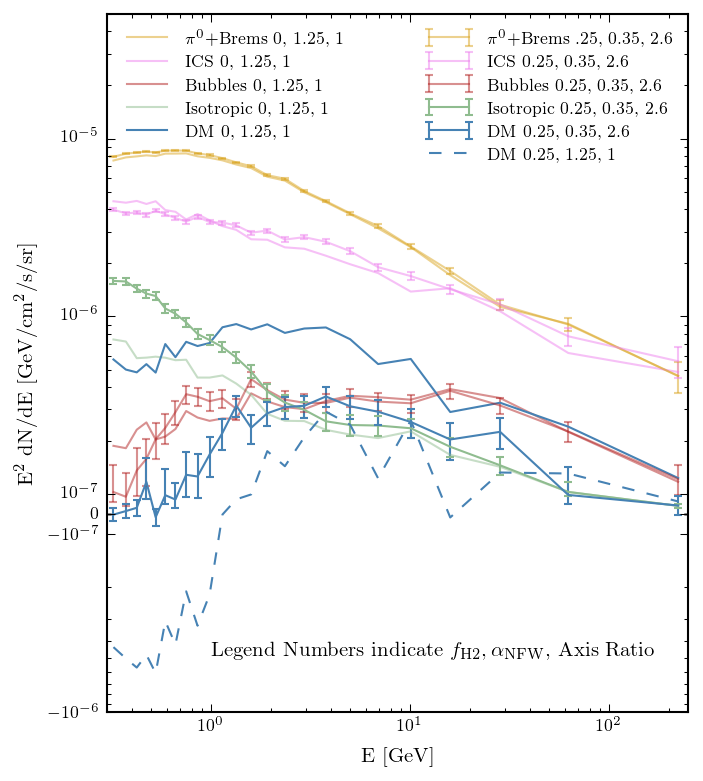

In [5]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


def PlotComponent(A, name, color, mult=1, ls='-', err=True, label=None,**kwargs):
    E, flux, stat = A.GetSpectrum(name)
    #if stat

  
    if name is 'Data':
        handle.append(plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k'))
    elif err==True:
        handle.append(plt.errorbar(E/1e3,E**2*flux*mult/1e3,E**2*stat.T/1e3*mult, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs))
    else: 
        handle.append(plt.errorbar(E/1e3,E**2*flux*mult/1e3, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs))
        
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')

    

plt.figure(figsize=(5,6))
#PlotComponent('Data')    
#PlotComponent('PSC')
#PlotComponent('Pi0_Brems')



faint_alpha = 0.5 

colors = {'ICS':'violet','Bubbles':'firebrick', 'Isotropic':'darkseagreen','DM':'steelblue','Pi0_Brems':'goldenrod'}
handle = []
PlotComponent(A, 'Pi0_Brems', colors, err=False, label=r'$\pi^0$+Brems 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'ICS', colors, err=False, label=r'ICS 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Bubbles', colors, err=False, label=r'Bubbles 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Isotropic', colors, err=False, label=r'Isotropic 0, 1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'DM', colors, err=False, label=r'DM 0, 1.25, 1',alpha=1)
linthresh=1e-7
first_legend = plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle,loc=2)
ax = plt.gca().add_artist(first_legend)

plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,1e-5)


#PlotComponent('AqRift',mult=10)


#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


#plt.figure(figsize=(5,6))

handle=[]

PlotComponent(A2, 'Pi0_Brems', colors, err=True, label=r'$\pi^0$+Brems .25, 0.35, 2.6',alpha=faint_alpha)
PlotComponent(A2, 'ICS', colors,ls='-', err=True, label=r'ICS 0.25, 0.35, 2.6',alpha=faint_alpha)
PlotComponent(A2, 'Bubbles', colors, ls='-', err=True, label=r'Bubbles 0.25, 0.35, 2.6',alpha=faint_alpha)
PlotComponent(A2, 'Isotropic', colors,ls='-', err=True, label=r'Isotropic 0.25, 0.35, 2.6',alpha=1)
PlotComponent(A2, 'DM', colors,ls='-', err=True, label=r'DM 0.25, 0.35, 2.6')

#PlotComponent(A3, 'Isotropic', colors,ls=':', err=False, label=r'Isotropic 0.25, 1.25, 1')
PlotComponent(A3, 'DM', colors,ls='--', err=False, label=r'DM 0.25, 1.25, 1')

first_legend = plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle)


plt.text(1,-5e-7, r'Legend Numbers indicate $f_{\rm H2},\alpha_{\rm NFW}$, Axis Ratio', fontsize=10)
#plt.text(3,-7e-7, 'With error bars NFW alpha=0.4, AR=2.4', fontsize=10)

#PlotComponent('AqRift',mult=10)
plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3, handles=handle)

linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,5e-5)
#plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,250)


plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/change_NFW_axis_mod_s_47.pdf', bbox_inches='tight')

#A.SaveSpectra('./mod_c/spec_mod_s_P8_PSF3.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_42_40x40_noDM.pickle') # 3FGL with ext XCO fitted 



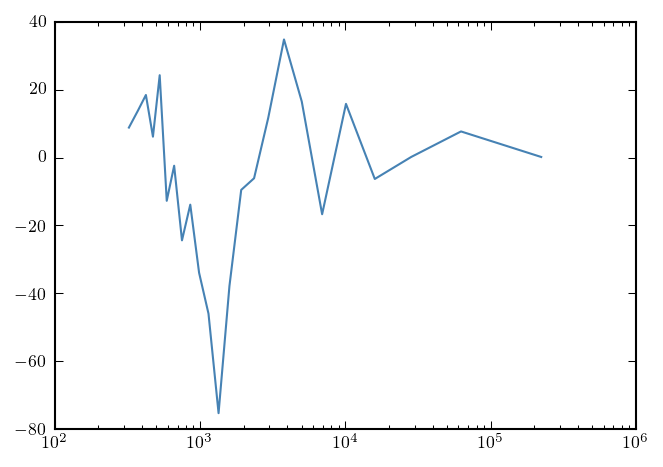

In [64]:
plt.plot(A.central_energies,2*(np.array(A.loglike)-np.array(A2.loglike)))
plt.xscale('log')







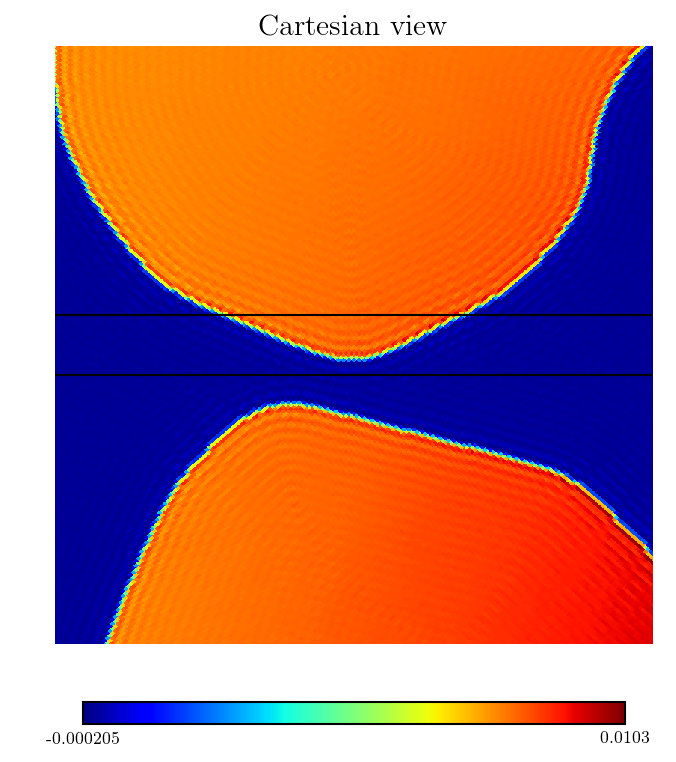

In [67]:
healpy.cartview(deepcopy(A.templateList['Bubbles'].healpixCube)[23], latra=[-20,20], lonra=[-20,20])
plt.hlines([-2,2],-40,40)



In [3]:
import h5py
import healpy
import sys
sys.path.append('../')
import Analysis
from scipy import ndimage




from matplotlib.colors import ListedColormap
import numpy as np
colombi1_cmap = ListedColormap(np.loadtxt("Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("gray") # color of missing pixels
#colombi1_cmap.set_under("white") # color of background, necessary if you want to use
# this colormap directly with hp.mollview(m, cmap=colombi1_cmap)
cmap = colombi1_cmap



A = Analysis.Analysis() 
mask = A.GenSquareMask(l_range=[-20,20], b_range=[-20,20], plane_mask=2)
psc_weights = A.CalculatePixelWeights(diffuse_model='../fermi_diffuse_'+A.tag+'.npy',psc_model='../PSC_3FGL_with_ext.npy',alpha_psc=5., f_psc=0.1)

def PlotResiduals(model, energy_range, text, grid):
    # Open the file and load the fit results of interest.
    h = h5py.File('../new/mod_s_%i_XCO_P8_stripped.hdf5'%model)
    residual = h['/fit_results/GC_no_dm/residual'][...]
    E = h['/fit_results/GC_no_dm'].attrs['energies']
    
    E_bin_1, E_bin_2 = np.argmin(np.abs(energy_range[0]-E)), np.argmin(np.abs(energy_range[1]-E))
    plt.figure(2)
    
    # TESTING 
#     print residual.shape
#     print residual[E_bin_1:E_bin_2].shape
#     print A.psc_weights[E_bin_1:E_bin_2].shape
    
    np.sum(residual[E_bin_1:E_bin_2]*A.psc_weights[E_bin_1:E_bin_2], axis=0)*mask
    #-----------------------------------
    
    m = healpy.cartview(np.sum(residual[E_bin_1:E_bin_2]*A.psc_weights[E_bin_1:E_bin_2], axis=0)*mask,latra=[-20,20], lonra=[-20,20],xsize=320, return_projected_map=True, hold=True, cbar=False)
    real_energies=(E[E_bin_1]/1e3,E[E_bin_2]/1e3) 
    plt.clf()
    plt.figure(1)
    multiplier = 1
    if energy_range[0] > 2e3: 
        multiplier = 2 
        grid.text(.08,.19, r'Counts $\times 2$', transform=grid.transAxes, fontsize=8,)
    im = grid.imshow(ndimage.gaussian_filter(m*multiplier,4), origin='lower', extent=[20,-20,-20,20], cmap=cmap, vmin=-10,vmax=10)
    #plt.imshow(ndimage.gaussian_filter(m,4), origin='lower', extent=[20,-20,-20,20], cmap='bwr', vmin=-3*np.std(m),vmax=3*np.std(m))
    
    grid.xaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.yaxis.set_ticks([-15,-10,-5,0,5,10,15])
    grid.xaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.yaxis.set_ticklabels(["",-10,"",0,"",10,""])
    grid.text(.08,.08,'%1.2f-%1.2f GeV'%(A.bin_edges[E_bin_1]/1e3,A.bin_edges[E_bin_2+1]/1e3), transform=grid.transAxes, fontsize=8)
    grid.text(.08,.82, text, transform=grid.transAxes, fontsize=8)
    #plt.colorbar(label='Residual Counts')
    return im 
    

from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(1, figsize=(9.5,4.7))

grid = AxesGrid(fig, 121, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode=None,)
grid2 = AxesGrid(fig, 122, # similar to subplot(142)
                        nrows_ncols = (3, 3),
                        axes_pad = 0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode='single',)


for i_E, E_range in enumerate([[.3e3, .5e3],[1e3,2.5e3], [2.8e3,10e3]]):
    for i, model in enumerate([14,17,20]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%((model-14)*0.05), grid=grid[i_E*3+ i])
        
    for i, model in enumerate([42,45,48]):
        im = PlotResiduals(model,energy_range=E_range, text=r'$f_{\rm H2}=%1.2f$'%((model-42)*0.05),grid=grid2[i_E*3+ i])
        cbar = grid2.cbar_axes[0].colorbar(im)
    #plt.show()
    
for cax in grid2.cbar_axes[1:]:
    cax.toggle_label(False)
    

for i in [6,7,8]:
    grid[i].set_xlabel('l [deg]')
    grid2[i].set_xlabel('l [deg]')
    
for i in [0,3,6]:
    grid[i].set_ylabel('b [deg]')
    grid2[i].yaxis.set_ticklabels([])
    

cbar.solids.set_edgecolor("face")
    
fig.subplots_adjust(left=0.00, wspace=-.15)
grid[1].text(.5, 1.05, r'PEB Gas Models', horizontalalignment='center', transform=grid[1].transAxes)
grid2[1].text(.5, 1.05, r'Galprop Gas Models', horizontalalignment='center', transform=grid2[1].transAxes)

grid2.cbar_axes[0].set_ylabel(r'Residual Counts') 

IOError: [Errno 2] No such file or directory: '../fermi_diffuse_P7REP_CLEAN_V15_calore.npy'

In [47]:
A = Analysis.Analysis(tag='P8R2_CLEAN_V6_calore', basepath='/data/GCE_sys/')
#############################################################
#  Need to calculate fermi bubbles area here.
# ##################################################################
A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False, fixNorm=False)


2 3.5


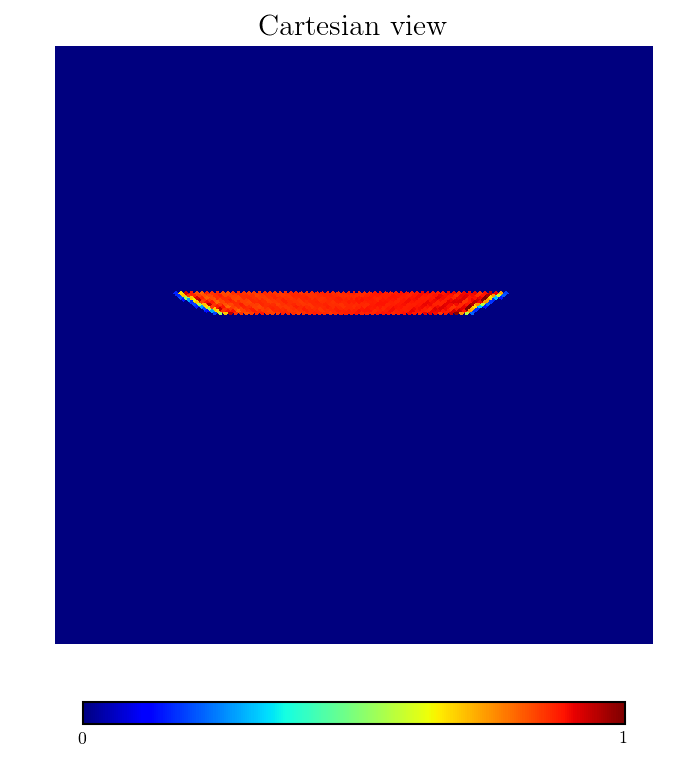

3.5 5


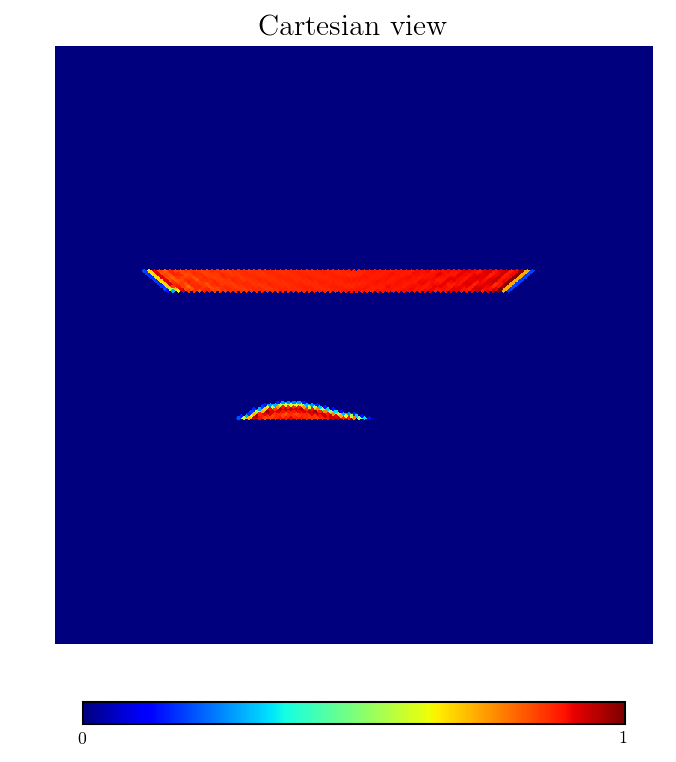

5 7


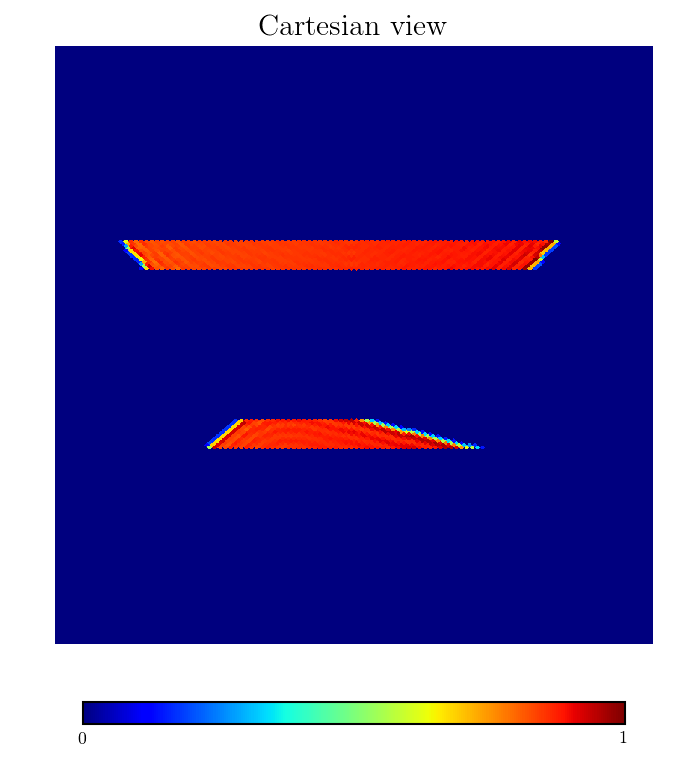

7 10


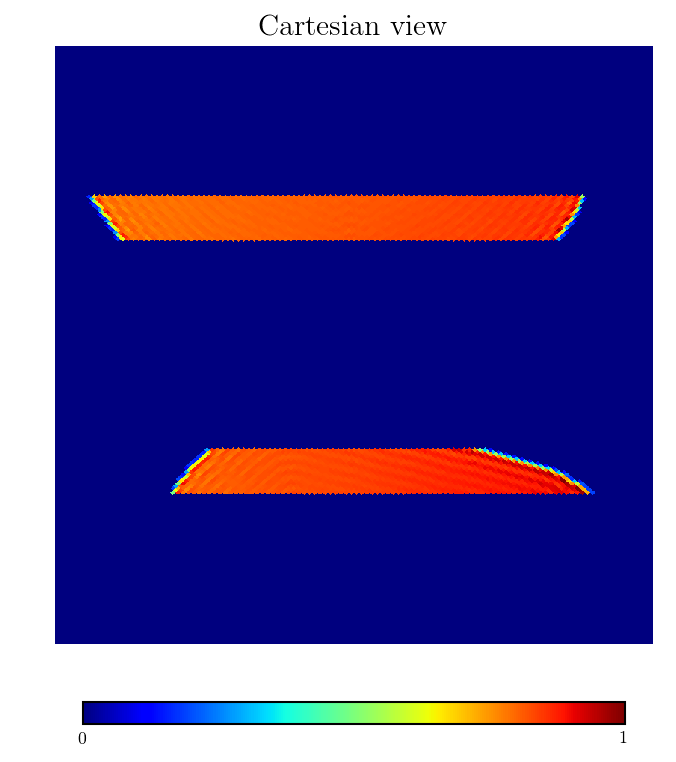

10 15


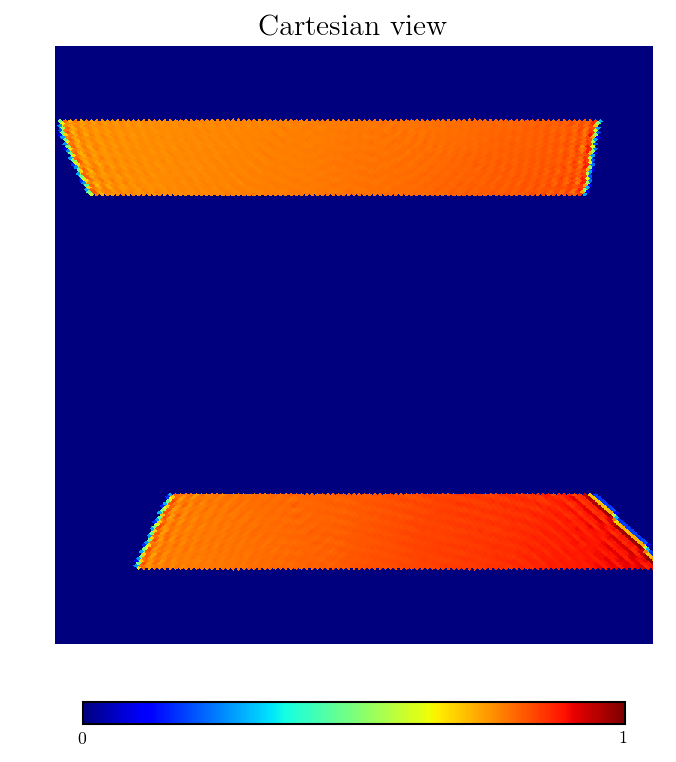

15 20


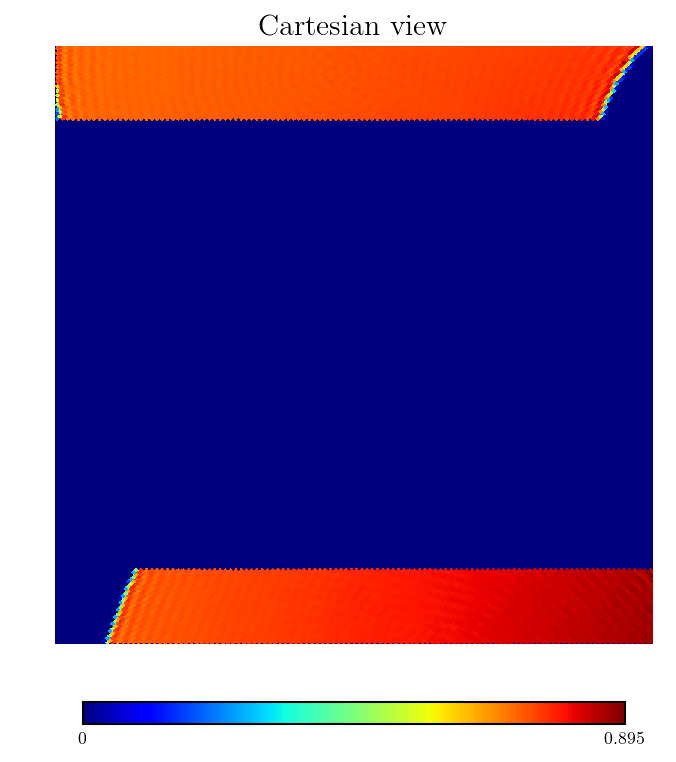

[46.584347826086955, 31.88809523809524, 17.061146496815287, 8.321217769493632, 4.222257250945775, 3.82384011420414]


In [53]:
boundaries = [2,3.5,5,7,10,15,20] 


mask_area_ratio = []

for i_b, bound in enumerate(boundaries[:-1]):
            
    print bound, boundaries[i_b+1]
    # Split ICS into rings
    #A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2)
    A.GenSquareMask(l_range=[-20,20],b_range=[bound,boundaries[i_b+1]])
    A.GenSquareMask(l_range=[-30,30],b_range=[-boundaries[i_b+1],-bound], merge=True)
    
    
    mask  = A.templateList['Bubbles'].healpixCube[20]*A.mask
    mask /= np.max(mask)
    mask[mask<.1]=0
    
    healpy.cartview(mask, latra=[-20,20], lonra=[-20,20])
    plt.show()
    mask_solid_angle = np.nonzero(mask)[0].shape[0]
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    mask_area_ratio.append(npix_roi/float(mask_solid_angle))
print mask_area_ratio

In [ ]:
boundaries = [2,3.5,5,7,10,15,20] 

mask_area_ratio = []

for i_b, bound in enumerate(boundaries[:-1]):
            
    print bound, boundaries[i_b+1]
    # Split ICS into rings
    A.GenSquareMask(l_range=[-30,30],b_range=[bound,boundaries[i_b+1]])
    A.GenSquareMask(l_range=[-30,30],b_range=[-boundaries[i_b+1],-bound], merge=True)
    #A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2, merge=True)
    
    mask  = A.templateList['Bubbles'].healpixCube[20]*A.mask
    #mask /= np.max(mask)
    #mask[mask<.1]=0
    
    healpy.cartview(mask, latra=[-20,20], lonra=[-20,20])
    plt.show()
    mask_solid_angle = np.nonzero(mask)[0].shape[0]
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    mask_area_ratio.append(npix_roi/float(mask_solid_angle))
print mask_area_ratio

In [52]:
# Restore back to normal mask
A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]


A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=.4, 
              r_s=20.0, axesratio=2.3, offset=(0., 0.), spec_file=None,size=25)
    
print 'DM generated'
A2.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A2.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



A3.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.25, 
              r_s=20.0, axesratio=1, offset=(0., 0.), spec_file=None,size=25)
print 'DM generated'
A3.GenSquareMask(l_range=[-7.5,7.5], b_range=[-7.5,7.5], plane_mask=0.)
A3.RunLikelihood(print_level=1, tol=2e2, precision=None, minos=False)[0]



DM generated
Masking completed in 9.2072e-01 s
Write likelihood tempfile to  /tmp/tmpNMhCAR
Code generation completed in 3.4449e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355500.313193 
 TOTAL NCALL = 156 
 NCALLS = 156 
 
 
 EDM = 4.01609561501e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -1.495243e+00 
 9.521022e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 7.962679e-01 
 8.053255e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 3.361514e-02 
 2.837366e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.816964e+00 
 4.053053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 -8.789726e-02 
 3.497158e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -1.495e+00 & 9.521e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 7.963e-01 & 8.053e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 3.362e-02 & 2.837e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.817e+00 & 4.053e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & -8.790e-02 & 3.497e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.64e-02 s
Masking completed in 9.0251e-01 s
Write likelihood tempfile to  /tmp/tmpvD6X6z
Code generation completed in 4.2269e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301097.132781 
 TOTAL NCALL = 147 
 NCALLS = 147 
 
 
 EDM = 0.00010195029732 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -1.958982e+00 
 1.237031e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 8.509501e-01 
 7.988484e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 -5.591859e-02 
 2.643278e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 1.806991e+00 
 4.058640e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 -4.284794e-01 
 3.282649e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -1.959e+00 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 8.510e-01 & 7.988e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & -5.592e-02 & 2.643e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 1.807e+00 & 4.059e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & -4.285e-01 & 3.283e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.40e-02 s
Masking completed in 8.9820e-01 s
Write likelihood tempfile to  /tmp/tmpsvJt3v
Code generation completed in 3.5229e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256084.586755 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.0012546123012 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.907052e+00 
 1.475213e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.233184e-01 
 8.458657e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.158688e-01 
 2.403983e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.761499e+00 
 4.312903e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 -3.991280e-01 
 3.128704e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.907e+00 & 1.475e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.233e-01 & 8.459e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.159e-01 & 2.404e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.761e+00 & 4.313e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & -3.991e-01 & 3.129e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.18e-02 s
Masking completed in 9.0670e-01 s
Write likelihood tempfile to  /tmp/tmpYcxY6b
Code generation completed in 3.4699e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213875.645402 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 1.64157857128e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -1.827508e+00 
 1.488264e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.651671e-01 
 8.874182e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 4.818982e-01 
 2.185798e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 1.711549e+00 
 4.477116e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.456840e-02 
 2.970867e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -1.828e+00 & 1.488e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.652e-01 & 8.874e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 4.819e-01 & 2.186e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 1.712e+00 & 4.477e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.457e-02 & 2.971e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.29e-02 s
Masking completed in 9.0468e-01 s
Write likelihood tempfile to  /tmp/tmpQsP60h
Code generation completed in 2.5191e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211447.005008 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 1.22384948286e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.014164e+00 
 1.686514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.941904e-01 
 8.863912e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 5.345275e-01 
 1.854036e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 1.700910e+00 
 4.455257e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 -2.879814e-01 
 2.818707e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.014e+00 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.942e-01 & 8.864e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 5.345e-01 & 1.854e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 1.701e+00 & 4.455e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & -2.880e-01 & 2.819e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.33e-02 s
Masking completed in 9.0717e-01 s
Write likelihood tempfile to  /tmp/tmpv5Ljln
Code generation completed in 3.5141e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216031.656541 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.00731381810839 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.148482e+00 
 1.165726e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.041131e+00 
 9.079839e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 6.736112e-01 
 1.537520e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.681615e+00 
 4.513877e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 -2.468634e-01 
 2.669556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.148e+00 & 1.166e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.041e+00 & 9.080e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 6.736e-01 & 1.538e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.682e+00 & 4.514e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & -2.469e-01 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.61e-02 s
Masking completed in 8.8666e-01 s
Write likelihood tempfile to  /tmp/tmpCXsCk9
Code generation completed in 5.0859e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215602.183144 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 2.75233882211e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.094512e+00 
 1.360988e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.077871e+00 
 8.949262e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 7.917534e-01 
 1.276298e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 1.457517e+00 
 4.355669e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 -2.860763e-02 
 2.485572e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.095e+00 & 1.361e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.078e+00 & 8.949e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 7.918e-01 & 1.276e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 1.458e+00 & 4.356e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & -2.861e-02 & 2.486e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   7.31e-02 s
Masking completed in 9.2126e-01 s
Write likelihood tempfile to  /tmp/tmpW9VsSM
Code generation completed in 3.5629e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207105.1298 
 TOTAL NCALL = 112 
 NCALLS = 112 
 
 
 EDM = 0.00267655538418 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -9.232534e-01 
 1.101269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.119553e+00 
 9.311132e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 8.291528e-01 
 1.196717e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.514806e+00 
 4.545580e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 -1.087129e-02 
 2.405803e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -9.233e-01 & 1.101e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.120e+00 & 9.311e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 8.292e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.515e+00 & 4.546e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & -1.087e-02 & 2.406e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.65e-02 s
Masking completed in 8.7257e-01 s
Write likelihood tempfile to  /tmp/tmpLr2d5Q
Code generation completed in 3.2599e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201584.40716 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 0.000463996026184 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -5.671320e-01 
 1.119442e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.123689e+00 
 9.319068e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.611812e-01 
 1.159147e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 1.340807e+00 
 4.413328e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.004483e-01 
 2.362501e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -5.671e-01 & 1.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.124e+00 & 9.319e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.612e-01 & 1.159e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 1.341e+00 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.004e-01 & 2.363e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.92e-02 s
Masking completed in 8.8378e-01 s
Write likelihood tempfile to  /tmp/tmp6ykVbq
Code generation completed in 2.7399e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188020.077095 
 TOTAL NCALL = 125 
 NCALLS = 125 
 
 
 EDM = 0.000200704683481 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -5.429839e-01 
 1.051596e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.178684e+00 
 9.834928e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.891233e-01 
 1.138092e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 1.308794e+00 
 4.573223e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 2.829840e-01 
 2.374409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -5.430e-01 & 1.052e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.179e+00 & 9.835e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.891e-01 & 1.138e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 1.309e+00 & 4.573e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 2.830e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.91e-02 s
Masking completed in 8.6821e-01 s
Write likelihood tempfile to  /tmp/tmpafolj3
Code generation completed in 4.5812e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -185948.275816 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000659800921704 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 4.064767e-03 
 7.902393e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.210177e+00 
 1.006157e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 8.964849e-01 
 1.164613e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.116230e+00 
 4.478340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 3.702198e-02 
 2.450650e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 4.065e-03 & 7.902e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.210e+00 & 1.006e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 8.965e-01 & 1.165e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.116e+00 & 4.478e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 3.702e-02 & 2.451e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.84e-02 s
Masking completed in 8.7119e-01 s
Write likelihood tempfile to  /tmp/tmpPrk0Dk
Code generation completed in 3.5381e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -161956.275652 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00119712820137 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.382278e-02 
 7.238666e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.234306e+00 
 1.079087e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.101079e-01 
 1.200638e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 1.080364e+00 
 4.652121e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 7.780515e-02 
 2.670472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.382e-02 & 7.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.234e+00 & 1.079e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.101e-01 & 1.201e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 1.080e+00 & 4.652e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 7.781e-02 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.84e-02 s
Masking completed in 8.8998e-01 s
Write likelihood tempfile to  /tmp/tmp0yMHKw
Code generation completed in 3.4540e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139060.478273 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00082372581753 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.228292e-01 
 7.348061e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.252358e+00 
 1.159488e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.247049e-01 
 1.271715e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 9.676348e-01 
 4.775017e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.300888e-02 
 2.595254e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.228e-01 & 7.348e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.252e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.247e-01 & 1.272e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 9.676e-01 & 4.775e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.301e-02 & 2.595e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.87e-02 s
Masking completed in 8.8327e-01 s
Write likelihood tempfile to  /tmp/tmp7Ghfrk
Code generation completed in 3.5679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118662.538707 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00181526555444 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.997015e-01 
 6.326910e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.288197e+00 
 1.246786e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.365833e-01 
 1.321213e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.649763e-01 
 4.753009e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 2.460615e-01 
 2.452274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.997e-01 & 6.327e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.288e+00 & 1.247e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.366e-01 & 1.321e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.650e-01 & 4.753e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 2.461e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.7678e-01 s
Write likelihood tempfile to  /tmp/tmpLB8p0s
Code generation completed in 3.2930e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98470.6835947 
 TOTAL NCALL = 228 
 NCALLS = 228 
 
 
 EDM = 0.000109975215769 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 3.652989e-01 
 6.367054e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.353300e+00 
 1.347504e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.674024e-01 
 1.167556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.938559e-01 
 4.785989e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 4.819692e-01 
 2.250405e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 3.653e-01 & 6.367e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.353e+00 & 1.348e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.674e-01 & 1.168e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.939e-01 & 4.786e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 4.820e-01 & 2.250e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.16e-02 s
Masking completed in 8.7789e-01 s
Write likelihood tempfile to  /tmp/tmpuH3UuY
Code generation completed in 2.7492e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74839.9193125 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 7.98224874636e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 3.579881e-01 
 5.360566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.390228e+00 
 1.588898e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.624692e-01 
 1.110579e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.512656e-01 
 4.913933e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.049597e-01 
 2.050672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 3.580e-01 & 5.361e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.390e+00 & 1.589e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.625e-01 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.513e-01 & 4.914e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.050e-01 & 2.051e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.4666e-01 s
Write likelihood tempfile to  /tmp/tmplwGKVQ
Code generation completed in 3.5911e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52852.7187145 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000120210070957 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.004278e-01 
 4.943698e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.461228e+00 
 1.891085e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.651349e-01 
 1.287090e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.704295e-01 
 5.345846e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 4.810424e-01 
 2.370660e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.004e-01 & 4.944e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.461e+00 & 1.891e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.651e-01 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.704e-01 & 5.346e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 4.810e-01 & 2.371e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.8631e-01 s
Write likelihood tempfile to  /tmp/tmpDJHrJP
Code generation completed in 3.4890e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31234.1746474 
 TOTAL NCALL = 111 
 NCALLS = 111 
 
 
 EDM = 4.0190836591e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 4.651215e-01 
 5.090426e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.478594e+00 
 2.259521e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.729760e-01 
 1.534202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.146064e-01 
 5.766886e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.185357e-01 
 2.330510e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 4.651e-01 & 5.090e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.479e+00 & 2.260e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.730e-01 & 1.534e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.146e-01 & 5.767e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.185e-01 & 2.331e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.62e-02 s
Masking completed in 8.8515e-01 s
Write likelihood tempfile to  /tmp/tmpSZ2xFA
Code generation completed in 4.1299e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16438.4527292 
 TOTAL NCALL = 126 
 NCALLS = 126 
 
 
 EDM = 1.80564392388e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 5.011677e-01 
 5.982436e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.608009e+00 
 2.766876e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.549614e-01 
 1.560532e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.514735e-01 
 5.946545e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 5.400078e-01 
 1.787202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 5.012e-01 & 5.982e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.608e+00 & 2.767e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.550e-01 & 1.561e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.515e-01 & 5.947e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 5.400e-01 & 1.787e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.94e-02 s
Masking completed in 8.6559e-01 s
Write likelihood tempfile to  /tmp/tmpw9yvWz
Code generation completed in 3.5429e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5697.38820509 
 TOTAL NCALL = 95 
 NCALLS = 95 
 
 
 EDM = 2.96641956076e-07 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.941994e-01 
 5.078181e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.526111e+00 
 3.495392e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.627624e-01 
 1.361449e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.325215e-01 
 6.677838e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.495363e-01 
 1.439045e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.942e-01 & 5.078e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.526e+00 & 3.495e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.628e-01 & 1.361e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.325e-01 & 6.678e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.495e-01 & 1.439e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.28e-02 s
Masking completed in 8.8928e-01 s
Write likelihood tempfile to  /tmp/tmpJujZ6u
Code generation completed in 3.5181e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 389.30671009 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000838113230302 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.389733e-01 
 8.380374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.629426e+00 
 4.770584e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.837161e-01 
 1.299573e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.202291e-01 
 7.637435e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.731732e-01 
 1.323551e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.390e-01 & 8.380e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.629e+00 & 4.771e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.837e-01 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.202e-01 & 7.637e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.732e-01 & 1.324e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.56e-02 s
Masking completed in 8.7636e-01 s
Write likelihood tempfile to  /tmp/tmp6urYgH
Code generation completed in 3.5300e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2679.51065668 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 0.000230016891084 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.163969e-01 
 6.595374e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.820591e+00 
 6.947211e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.947867e-01 
 1.220154e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.596960e-01 
 9.740685e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.222370e-01 
 1.208105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.164e-01 & 6.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.821e+00 & 6.947e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.948e-01 & 1.220e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.597e-01 & 9.741e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.222e-01 & 1.208e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.61e-02 s
Masking completed in 8.8398e-01 s
Write likelihood tempfile to  /tmp/tmpqBJPVu
Code generation completed in 4.1692e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2841.22846449 
 TOTAL NCALL = 118 
 NCALLS = 118 
 
 
 EDM = 4.87445217561e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.300107e-01 
 9.217627e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.422296e+00 
 1.343320e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.849773e-01 
 1.256032e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.033832e+00 
 1.726035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.241674e-01 
 1.054248e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.300e-01 & 9.218e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.422e+00 & 1.343e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.850e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.034e+00 & 1.726e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.242e-01 & 1.054e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.79e-02 s
Masking completed in 8.7233e-01 s
Write likelihood tempfile to  /tmp/tmpwU6CLK
Code generation completed in 3.4459e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -0.880541
             PSC = +1.000000
    Pi0_Brems_23 = +3.843379
    Isotropic_23 = +0.976019
          ICS_23 = +2.107667
      Bubbles_23 = +1.152189

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -nan
             PSC = +1.000000
    Pi0_Brems_23 = -nan
    Isotropic_23 = -nan
          ICS_23 = -nan
      Bubbles_23 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = +nan
             PSC = +1.000000
    Pi0_Brems_23 = +nan
    Isotropic_23 = +nan
          ICS_23 = +nan
      Bubbles_23 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
   

FCN = 1613.65966311 
 TOTAL NCALL = 169 
 NCALLS = 169 
 
 
 EDM = 0.00100539169698 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -2.216819e-01 
 1.892411e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 4.713668e+00 
 3.805895e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.951787e-01 
 2.221433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 8.465462e-01 
 4.508740e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.587668e-01 
 1.555255e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -2.217e-01 & 1.892e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 4.714e+00 & 3.806e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.952e-01 & 2.221e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 8.465e-01 & 4.509e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.588e-01 & 1.555e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.85e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 -1.495243e+00 
 9.521072e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 7.962679e-01 
 8.052756e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 3.361514e-02 
 2.837365e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.816964e+00 
 4.052871e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 -8.789726e-02 
 3.496248e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & -1.495e+00 & 9.521e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 7.963e-01 & 8.053e-03 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 3.362e-02 & 2.837e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.817e+00 & 4.053e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & -8.790e-02 & 3.496e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 -0.05
 
 
 
 -0.36
 
 
 
 -0.10
 
 
 
 
 
 Pi0_Brems_0 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 0.32
 
 
 
 -0.64
 
 
 
 0.28
 
 
 
 
 
 Isotropic_0 
 
 
 -0.05
 
 
 
 0.32
 
 
 
 1.00
 
 
 
 -0.59
 
 
 
 -0.10
 
 
 
 
 
 ICS_0 
 
 
 -0.36
 
 
 
 -0.64
 
 
 
 -0.59
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_0 
 
 
 -0.10
 
 
 
 0.28
 
 
 
 -0.10
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{172,240,179} -0.10\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{189,216,167} 0.28\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{193,210,164} 0.32 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{222,167,142} -0.64 & \cellcolor[RGB]{218,173,145} -0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{172,240,179} -0.10 & \cellcolor[RGB]{189,216,167} 0.28 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 -1.958982e+00 
 1.237034e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 8.509501e-01 
 7.987958e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 -5.591859e-02 
 2.643269e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 1.806991e+00 
 4.058409e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 -4.284794e-01 
 3.281697e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & -1.959e+00 & 1.237e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 8.510e-01 & 7.988e-03 & & & & & \\
\hline
4 & $Isotropic_{1}$ & -5.592e-02 & 2.643e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 1.807e+00 & 4.058e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & -4.285e-01 & 3.282e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 -0.04
 
 
 
 -0.47
 
 
 
 -0.08
 
 
 
 
 
 Pi0_Brems_1 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 0.28
 
 
 
 -0.56
 
 
 
 0.27
 
 
 
 
 
 Isotropic_1 
 
 
 -0.04
 
 
 
 0.28
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.09
 
 
 
 
 
 ICS_1 
 
 
 -0.47
 
 
 
 -0.56
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_1 
 
 
 -0.08
 
 
 
 0.27
 
 
 
 -0.09
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{171,242,180} -0.08\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{188,217,167} 0.27\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{213,180,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,216,167} -0.28\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{171,242,180} -0.08 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{189,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -1.907052e+00 
 1.475184e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.233184e-01 
 8.458173e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 2.158688e-01 
 2.403966e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.761499e+00 
 4.312591e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 -3.991280e-01 
 3.127906e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -1.907e+00 & 1.475e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.233e-01 & 8.458e-03 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 2.159e-01 & 2.404e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.761e+00 & 4.313e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & -3.991e-01 & 3.128e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.03
 
 
 
 -0.57
 
 
 
 -0.07
 
 
 
 
 
 Pi0_Brems_2 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 0.24
 
 
 
 -0.51
 
 
 
 0.25
 
 
 
 
 
 Isotropic_2 
 
 
 -0.03
 
 
 
 0.24
 
 
 
 1.00
 
 
 
 -0.47
 
 
 
 -0.08
 
 
 
 
 
 ICS_2 
 
 
 -0.57
 
 
 
 -0.51
 
 
 
 -0.47
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_2 
 
 
 -0.07
 
 
 
 0.25
 
 
 
 -0.08
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{215,177,147} -0.57 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{210,185,151} -0.51 & \cellcolor[RGB]{186,219,168} 0.25\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{170,243,181} -0.08\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{215,177,147} -0.57 & \cellcolor[RGB]{210,185,151} -0.51 & \cellcolor[RGB]{206,189,153} -0.47 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,167} -0.28\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{186,219,168} 0.25 & \cellcolor[RGB]{170,243,181} -0.08 & \cellcolor[RGB]{189,215,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -1.827508e+00 
 1.488251e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 9.651671e-01 
 8.873939e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 4.818982e-01 
 2.185794e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 1.711549e+00 
 4.476942e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 1.456840e-02 
 2.970456e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -1.828e+00 & 1.488e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 9.652e-01 & 8.874e-03 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 4.819e-01 & 2.186e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 1.712e+00 & 4.477e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 1.457e-02 & 2.970e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.02
 
 
 
 -0.62
 
 
 
 -0.05
 
 
 
 
 
 Pi0_Brems_3 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 0.20
 
 
 
 -0.47
 
 
 
 0.22
 
 
 
 
 
 Isotropic_3 
 
 
 -0.02
 
 
 
 0.20
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 -0.06
 
 
 
 
 
 ICS_3 
 
 
 -0.62
 
 
 
 -0.47
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_3 
 
 
 -0.05
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{182,226,172} 0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{206,190,154} -0.47 & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.27\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.014164e+00 
 1.686514e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 9.941904e-01 
 8.863672e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 5.345275e-01 
 1.854035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 1.700910e+00 
 4.455099e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 -2.879814e-01 
 2.818300e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.014e+00 & 1.687e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 9.942e-01 & 8.864e-03 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 5.345e-01 & 1.854e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 1.701e+00 & 4.455e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & -2.880e-01 & 2.818e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.02
 
 
 
 -0.66
 
 
 
 -0.04
 
 
 
 
 
 Pi0_Brems_4 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.45
 
 
 
 0.22
 
 
 
 
 
 Isotropic_4 
 
 
 -0.02
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 -0.05
 
 
 
 
 
 ICS_4 
 
 
 -0.66
 
 
 
 -0.45
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 -0.28
 
 
 
 
 
 Bubbles_4 
 
 
 -0.04
 
 
 
 0.22
 
 
 
 -0.05
 
 
 
 -0.28
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{224,164,141} -0.66 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{224,164,141} -0.66 & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,216,167} -0.28\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{188,216,167} -0.28 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.148482e+00 
 1.165696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.041131e+00 
 9.079393e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 6.736112e-01 
 1.537274e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.681615e+00 
 4.513342e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 -2.468634e-01 
 2.669147e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.148e+00 & 1.166e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.041e+00 & 9.079e-03 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 6.736e-01 & 1.537e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.682e+00 & 4.513e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & -2.469e-01 & 2.669e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 -0.68
 
 
 
 -0.03
 
 
 
 
 
 Pi0_Brems_5 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 -0.44
 
 
 
 0.21
 
 
 
 
 
 Isotropic_5 
 
 
 -0.01
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 -0.05
 
 
 
 
 
 ICS_5 
 
 
 -0.68
 
 
 
 -0.44
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 
 
 Bubbles_5 
 
 
 -0.03
 
 
 
 0.21
 
 
 
 -0.05
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{182,225,171} 0.21\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{226,161,139} -0.68 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.094512e+00 
 1.360975e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.077871e+00 
 8.948986e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 7.917534e-01 
 1.276193e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 1.457517e+00 
 4.355351e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 -2.860763e-02 
 2.485257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.095e+00 & 1.361e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.078e+00 & 8.949e-03 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 7.918e-01 & 1.276e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 1.458e+00 & 4.355e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & -2.861e-02 & 2.485e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.00
 
 
 
 -0.70
 
 
 
 -0.01
 
 
 
 
 
 Pi0_Brems_6 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.44
 
 
 
 0.20
 
 
 
 
 
 Isotropic_6 
 
 
 -0.00
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 -0.04
 
 
 
 
 
 ICS_6 
 
 
 -0.70
 
 
 
 -0.44
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 -0.29
 
 
 
 
 
 Bubbles_6 
 
 
 -0.01
 
 
 
 0.20
 
 
 
 -0.04
 
 
 
 -0.29
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{188,217,167} -0.27 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -9.232534e-01 
 1.101286e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.119553e+00 
 9.310958e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 8.291528e-01 
 1.196659e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.514806e+00 
 4.545352e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 -1.087129e-02 
 2.405488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -9.233e-01 & 1.101e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.120e+00 & 9.311e-03 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 8.292e-01 & 1.197e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.515e+00 & 4.545e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & -1.087e-02 & 2.405e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.00
 
 
 
 -0.71
 
 
 
 -0.01
 
 
 
 
 
 Pi0_Brems_7 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.44
 
 
 
 0.19
 
 
 
 
 
 Isotropic_7 
 
 
 -0.00
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 -0.04
 
 
 
 
 
 ICS_7 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_7 
 
 
 -0.01
 
 
 
 0.19
 
 
 
 -0.04
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{185,221,169} -0.24 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -5.671320e-01 
 1.119453e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.123689e+00 
 9.318871e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 8.611812e-01 
 1.159108e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 1.340807e+00 
 4.413120e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 1.004483e-01 
 2.362196e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -5.671e-01 & 1.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.124e+00 & 9.319e-03 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 8.612e-01 & 1.159e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 1.341e+00 & 4.413e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 1.004e-01 & 2.362e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 -0.71
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_8 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 0.19
 
 
 
 
 
 Isotropic_8 
 
 
 0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.04
 
 
 
 
 
 ICS_8 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_8 
 
 
 0.00
 
 
 
 0.19
 
 
 
 -0.04
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{180,229,173} 0.19\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{172,241,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,170} -0.23 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{184,223,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} -0.31\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{180,229,173} 0.19 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -5.429839e-01 
 1.051608e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.178684e+00 
 9.834771e-03 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 8.891233e-01 
 1.138067e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 1.308794e+00 
 4.573063e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 2.829840e-01 
 2.374151e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -5.430e-01 & 1.052e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.179e+00 & 9.835e-03 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 8.891e-01 & 1.138e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 1.309e+00 & 4.573e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 2.830e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.00
 
 
 
 -0.71
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_9 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.44
 
 
 
 0.18
 
 
 
 
 
 Isotropic_9 
 
 
 0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.21
 
 
 
 -0.03
 
 
 
 
 
 ICS_9 
 
 
 -0.71
 
 
 
 -0.44
 
 
 
 -0.21
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_9 
 
 
 0.01
 
 
 
 0.18
 
 
 
 -0.03
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{179,230,174} 0.18\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{229,156,137} -0.71 & \cellcolor[RGB]{204,193,155} -0.44 & \cellcolor[RGB]{182,225,171} -0.21 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 4.064767e-03 
 7.902622e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.210177e+00 
 1.006136e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 8.964849e-01 
 1.164594e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.116230e+00 
 4.478125e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 3.702198e-02 
 2.450218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 4.065e-03 & 7.903e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.210e+00 & 1.006e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 8.965e-01 & 1.165e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.116e+00 & 4.478e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 3.702e-02 & 2.450e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.00
 
 
 
 -0.69
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_10 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.46
 
 
 
 0.19
 
 
 
 
 
 Isotropic_10 
 
 
 0.00
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.03
 
 
 
 
 
 ICS_10 
 
 
 -0.69
 
 
 
 -0.46
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_10 
 
 
 0.02
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{165,252,185} 0.02\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{180,228,173} 0.19\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{170,243,181} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{181,227,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.382278e-02 
 7.238934e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.234306e+00 
 1.079055e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 9.101079e-01 
 1.200625e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 1.080364e+00 
 4.651765e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 7.780515e-02 
 2.669819e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.382e-02 & 7.239e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.234e+00 & 1.079e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 9.101e-01 & 1.201e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 1.080e+00 & 4.652e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 7.781e-02 & 2.670e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.01
 
 
 
 -0.68
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_11 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.47
 
 
 
 0.20
 
 
 
 
 
 Isotropic_11 
 
 
 0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.03
 
 
 
 
 
 ICS_11 
 
 
 -0.68
 
 
 
 -0.47
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 
 
 Bubbles_11 
 
 
 0.03
 
 
 
 0.20
 
 
 
 -0.03
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{225,161,139} -0.68 & \cellcolor[RGB]{207,189,153} -0.47 & \cellcolor[RGB]{180,229,173} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,201,159} -0.39\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 2.228292e-01 
 7.348296e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.252358e+00 
 1.159444e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.247049e-01 
 1.271704e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 9.676348e-01 
 4.774467e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.300888e-02 
 2.594472e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 2.228e-01 & 7.348e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.252e+00 & 1.159e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.247e-01 & 1.272e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 9.676e-01 & 4.774e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.301e-02 & 2.594e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 0.01
 
 
 
 -0.66
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_12 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.49
 
 
 
 0.21
 
 
 
 
 
 Isotropic_12 
 
 
 0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.04
 
 
 
 
 
 ICS_12 
 
 
 -0.66
 
 
 
 -0.49
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_12 
 
 
 0.03
 
 
 
 0.21
 
 
 
 -0.04
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{182,226,172} 0.21\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{208,187,152} -0.49 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{182,226,172} 0.21 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 2.997015e-01 
 6.327007e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.288197e+00 
 1.246745e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.365833e-01 
 1.321203e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 8.649763e-01 
 4.752449e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 2.460615e-01 
 2.451665e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 2.997e-01 & 6.327e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.288e+00 & 1.247e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.366e-01 & 1.321e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 8.650e-01 & 4.752e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 2.461e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 0.01
 
 
 
 -0.64
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_13 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.50
 
 
 
 0.19
 
 
 
 
 
 Isotropic_13 
 
 
 0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.03
 
 
 
 
 
 ICS_13 
 
 
 -0.64
 
 
 
 -0.50
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_13 
 
 
 0.04
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{181,227,173} 0.19\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{222,166,142} -0.64 & \cellcolor[RGB]{209,186,152} -0.50 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{181,227,173} 0.19 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 3.652989e-01 
 6.317752e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.353300e+00 
 1.381406e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.674024e-01 
 1.166468e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 7.938559e-01 
 4.745036e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 4.819692e-01 
 2.212349e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 3.653e-01 & 6.318e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.353e+00 & 1.381e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.674e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 7.939e-01 & 4.745e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 4.820e-01 & 2.212e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.61
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_14 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.51
 
 
 
 0.19
 
 
 
 
 
 Isotropic_14 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.03
 
 
 
 
 
 ICS_14 
 
 
 -0.61
 
 
 
 -0.51
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 
 
 Bubbles_14 
 
 
 0.04
 
 
 
 0.19
 
 
 
 -0.03
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{181,228,173} 0.19\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{165,250,184} -0.03\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{219,171,144} -0.61 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{181,228,173} 0.19 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 3.579881e-01 
 5.360573e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.390228e+00 
 1.588867e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 9.624692e-01 
 1.110577e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 8.512656e-01 
 4.913516e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 5.049597e-01 
 2.050376e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 3.580e-01 & 5.361e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.390e+00 & 1.589e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 9.625e-01 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 8.513e-01 & 4.914e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 5.050e-01 & 2.050e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 0.01
 
 
 
 -0.58
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_15 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.54
 
 
 
 0.17
 
 
 
 
 
 Isotropic_15 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.02
 
 
 
 
 
 ICS_15 
 
 
 -0.58
 
 
 
 -0.54
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.41
 
 
 
 
 
 Bubbles_15 
 
 
 0.04
 
 
 
 0.17
 
 
 
 -0.02
 
 
 
 -0.41
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,198,158} -0.41\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{201,198,158} -0.41 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 5.004278e-01 
 4.943713e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.461228e+00 
 1.891045e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.651349e-01 
 1.287088e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 7.704295e-01 
 5.345339e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 4.810424e-01 
 2.370265e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 5.004e-01 & 4.944e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.461e+00 & 1.891e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.651e-01 & 1.287e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 7.704e-01 & 5.345e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 4.810e-01 & 2.370e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.55
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_16 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.56
 
 
 
 0.18
 
 
 
 
 
 Isotropic_16 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.02
 
 
 
 
 
 ICS_16 
 
 
 -0.55
 
 
 
 -0.56
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 
 
 Bubbles_16 
 
 
 0.04
 
 
 
 0.18
 
 
 
 -0.02
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{180,229,173} 0.18\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{213,179,148} -0.55 & \cellcolor[RGB]{215,177,147} -0.56 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{180,229,173} 0.18 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 4.651215e-01 
 5.085817e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.478594e+00 
 2.256396e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.729760e-01 
 1.534065e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 8.146064e-01 
 5.733158e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.185357e-01 
 2.326688e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 4.651e-01 & 5.086e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.479e+00 & 2.256e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.730e-01 & 1.534e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 8.146e-01 & 5.733e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.185e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.52
 
 
 
 0.05
 
 
 
 
 
 Pi0_Brems_17 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.59
 
 
 
 0.18
 
 
 
 
 
 Isotropic_17 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.03
 
 
 
 
 
 ICS_17 
 
 
 -0.52
 
 
 
 -0.59
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.43
 
 
 
 
 
 Bubbles_17 
 
 
 0.05
 
 
 
 0.18
 
 
 
 -0.03
 
 
 
 -0.43
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{167,247,183} 0.05\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{180,229,174} 0.18\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,232,175} -0.16 & \cellcolor[RGB]{165,251,184} -0.03\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{210,183,150} -0.52 & \cellcolor[RGB]{217,173,145} -0.59 & \cellcolor[RGB]{177,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} -0.43\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{203,195,156} -0.43 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 5.011677e-01 
 5.982450e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.608009e+00 
 2.766861e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.549614e-01 
 1.560530e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 6.514735e-01 
 5.946357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 5.400078e-01 
 1.787105e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 5.012e-01 & 5.982e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.608e+00 & 2.767e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.550e-01 & 1.561e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 6.515e-01 & 5.946e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 5.400e-01 & 1.787e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 0.01
 
 
 
 -0.48
 
 
 
 0.04
 
 
 
 
 
 Pi0_Brems_18 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.61
 
 
 
 0.14
 
 
 
 
 
 Isotropic_18 
 
 
 0.01
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.16
 
 
 
 -0.02
 
 
 
 
 
 ICS_18 
 
 
 -0.48
 
 
 
 -0.61
 
 
 
 -0.16
 
 
 
 1.00
 
 
 
 -0.38
 
 
 
 
 
 Bubbles_18 
 
 
 0.04
 
 
 
 0.14
 
 
 
 -0.02
 
 
 
 -0.38
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{176,234,176} 0.14\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{165,251,185} -0.02\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{207,188,153} -0.48 & \cellcolor[RGB]{219,170,144} -0.61 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 3.941994e-01 
 5.068029e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.526111e+00 
 3.488881e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.627624e-01 
 1.361476e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 8.325215e-01 
 6.660859e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 7.495363e-01 
 1.438824e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 3.942e-01 & 5.068e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.526e+00 & 3.489e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.628e-01 & 1.361e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 8.325e-01 & 6.661e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 7.495e-01 & 1.439e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 0.01
 
 
 
 -0.46
 
 
 
 0.03
 
 
 
 
 
 Pi0_Brems_19 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.63
 
 
 
 0.13
 
 
 
 
 
 Isotropic_19 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.02
 
 
 
 
 
 ICS_19 
 
 
 -0.46
 
 
 
 -0.63
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_19 
 
 
 0.03
 
 
 
 0.13
 
 
 
 -0.02
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{166,249,184} 0.03\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{165,252,185} -0.02\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{205,191,154} -0.46 & \cellcolor[RGB]{221,167,142} -0.63 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,208,163} -0.33\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{166,249,184} 0.03 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.389733e-01 
 8.380363e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.629426e+00 
 4.770579e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 9.837161e-01 
 1.299573e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 8.202291e-01 
 7.637412e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 8.731732e-01 
 1.323548e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.390e-01 & 8.380e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.629e+00 & 4.771e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 9.837e-01 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 8.202e-01 & 7.637e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 8.732e-01 & 1.324e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 0.01
 
 
 
 -0.38
 
 
 
 0.02
 
 
 
 
 
 Pi0_Brems_20 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.66
 
 
 
 0.11
 
 
 
 
 
 Isotropic_20 
 
 
 0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 
 
 ICS_20 
 
 
 -0.38
 
 
 
 -0.66
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_20 
 
 
 0.02
 
 
 
 0.11
 
 
 
 -0.01
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{165,251,185} 0.02\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{174,238,178} 0.11\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,249,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{224,164,140} -0.66 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,212,165} -0.30\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{174,238,178} 0.11 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{191,212,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 1.163969e-01 
 6.595334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 1.820591e+00 
 6.947200e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.947867e-01 
 1.220154e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 9.596960e-01 
 9.740639e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.222370e-01 
 1.208101e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 1.164e-01 & 6.595e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 1.821e+00 & 6.947e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.948e-01 & 1.220e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 9.597e-01 & 9.741e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.222e-01 & 1.208e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 0.01
 
 
 
 -0.36
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_21 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 0.03
 
 
 
 -0.67
 
 
 
 0.09
 
 
 
 
 
 Isotropic_21 
 
 
 0.01
 
 
 
 0.03
 
 
 
 1.00
 
 
 
 -0.10
 
 
 
 -0.01
 
 
 
 
 
 ICS_21 
 
 
 -0.36
 
 
 
 -0.67
 
 
 
 -0.10
 
 
 
 1.00
 
 
 
 -0.24
 
 
 
 
 
 Bubbles_21 
 
 
 0.01
 
 
 
 0.09
 
 
 
 -0.01
 
 
 
 -0.24
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{225,162,140} -0.67 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{185,221,170} -0.24\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{185,221,170} -0.24 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.300107e-01 
 9.217593e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.422296e+00 
 1.343330e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.849773e-01 
 1.256032e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 1.033832e+00 
 1.726048e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.241674e-01 
 1.054247e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.300e-01 & 9.218e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.422e+00 & 1.343e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.850e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 1.034e+00 & 1.726e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.242e-01 & 1.054e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 0.01
 
 
 
 -0.39
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.70
 
 
 
 0.06
 
 
 
 
 
 Isotropic_22 
 
 
 0.01
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 -0.00
 
 
 
 
 
 ICS_22 
 
 
 -0.39
 
 
 
 -0.70
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_22 
 
 
 0.01
 
 
 
 0.06
 
 
 
 -0.00
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{165,251,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{199,201,159} -0.39 & \cellcolor[RGB]{228,158,138} -0.70 & \cellcolor[RGB]{169,244,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,175} -0.17\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{178,231,175} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -2.216819e-01 
 1.892482e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 4.713668e+00 
 3.805718e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 9.951787e-01 
 2.221433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 8.465462e-01 
 4.508534e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.587668e-01 
 1.555254e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -2.217e-01 & 1.892e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 4.714e+00 & 3.806e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 9.952e-01 & 2.221e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 8.465e-01 & 4.509e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.588e-01 & 1.555e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.22
 
 
 
 0.00
 
 
 
 -0.30
 
 
 
 0.01
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.22
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.71
 
 
 
 0.04
 
 
 
 
 
 Isotropic_23 
 
 
 0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 -0.00
 
 
 
 
 
 ICS_23 
 
 
 -0.30
 
 
 
 -0.71
 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 
 
 Bubbles_23 
 
 
 0.01
 
 
 
 0.04
 
 
 
 -0.00
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{164,253,185} 0.01\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{190,213,165} -0.30 & \cellcolor[RGB]{228,157,137} -0.71 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.12\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 8.8277e-01 s
Write likelihood tempfile to  /tmp/tmpdJ01YV
Code generation completed in 4.9760e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355467.440135 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 7.34664229101e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.508006e+00 
 2.396830e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.010358e+00 
 1.376932e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.510158e+00 
 2.919954e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.502968e-01 
 4.762366e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 3.863659e-01 
 3.622333e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.508e+00 & 2.397e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.010e+00 & 1.377e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.510e+00 & 2.920e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.503e-01 & 4.762e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 3.864e-01 & 3.622e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   7.81e-02 s
Masking completed in 9.3630e-01 s
Write likelihood tempfile to  /tmp/tmptB7q5p
Code generation completed in 3.5679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301110.102896 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 0.000109564032594 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.904402e+00 
 2.746604e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.025697e+00 
 1.406465e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.383917e+00 
 2.682795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 2.819925e-01 
 4.997933e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.261088e-01 
 3.396833e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.904e+00 & 2.747e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.026e+00 & 1.406e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.384e+00 & 2.683e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 2.820e-01 & 4.998e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.261e-01 & 3.397e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.07e-02 s
Masking completed in 8.9304e-01 s
Write likelihood tempfile to  /tmp/tmpIAfjg4
Code generation completed in 2.7850e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256143.649807 
 TOTAL NCALL = 140 
 NCALLS = 140 
 
 
 EDM = 7.51980600144e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.863277e+00 
 2.971669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.094724e+00 
 1.499980e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.240868e+00 
 2.429743e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 2.863710e-01 
 5.432057e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.328265e-01 
 3.236541e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.863e+00 & 2.972e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.095e+00 & 1.500e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.241e+00 & 2.430e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 2.864e-01 & 5.432e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.328e-01 & 3.237e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.23e-02 s
Masking completed in 8.9294e-01 s
Write likelihood tempfile to  /tmp/tmpB7rn4E
Code generation completed in 3.5021e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213943.777488 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 3.73173122614e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.950797e+00 
 2.854101e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.148470e+00 
 1.578503e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.179300e+00 
 2.203874e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 2.029978e-01 
 5.779797e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.623843e-01 
 3.054431e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.951e+00 & 2.854e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.148e+00 & 1.579e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.179e+00 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 2.030e-01 & 5.780e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.624e-01 & 3.054e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.15e-02 s
Masking completed in 8.9733e-01 s
Write likelihood tempfile to  /tmp/tmp1tO4dV
Code generation completed in 3.3510e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211549.802378 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 6.89643527113e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.631112e+00 
 3.128897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.161244e+00 
 1.558652e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.118027e+00 
 1.865133e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 2.811017e-01 
 5.750315e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 3.995021e-01 
 2.904067e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.631e+00 & 3.129e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.161e+00 & 1.559e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.118e+00 & 1.865e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 2.811e-01 & 5.750e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 3.995e-01 & 2.904e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 9.0501e-01 s
Write likelihood tempfile to  /tmp/tmpDor0BW
Code generation completed in 3.3879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216187.317852 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000114826211231 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.137751e+00 
 2.118568e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.210476e+00 
 1.561406e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.073357e+00 
 1.544257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 2.955713e-01 
 5.769666e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 4.209324e-01 
 2.757868e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.138e+00 & 2.119e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.210e+00 & 1.561e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.073e+00 & 1.544e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 2.956e-01 & 5.770e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 4.209e-01 & 2.758e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.8185e-01 s
Write likelihood tempfile to  /tmp/tmpbeqXlw
Code generation completed in 3.4580e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215796.174542 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 2.60995580774e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.185064e+00 
 2.434962e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.242628e+00 
 1.508030e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.043587e+00 
 1.280398e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 2.236010e-01 
 5.533413e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 5.543939e-01 
 2.566493e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.185e+00 & 2.435e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.243e+00 & 1.508e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.044e+00 & 1.280e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 2.236e-01 & 5.533e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 5.544e-01 & 2.566e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.08e-02 s
Masking completed in 8.9799e-01 s
Write likelihood tempfile to  /tmp/tmpCjB9yn
Code generation completed in 2.6200e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207233.314384 
 TOTAL NCALL = 144 
 NCALLS = 144 
 
 
 EDM = 1.90694763641e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.265338e+00 
 1.964187e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.309181e+00 
 1.544487e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.032712e+00 
 1.199849e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.299432e-01 
 5.717606e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 4.648260e-01 
 2.487909e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.265e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.309e+00 & 1.544e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.033e+00 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.299e-01 & 5.718e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 4.648e-01 & 2.488e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.30e-02 s
Masking completed in 8.8314e-01 s
Write likelihood tempfile to  /tmp/tmprviMiE
Code generation completed in 4.0519e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201740.51177 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 3.60910730954e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 9.517517e-01 
 2.007971e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.284649e+00 
 1.509943e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.025978e+00 
 1.161776e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 2.147254e-01 
 5.498281e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 5.897797e-01 
 2.447735e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 9.518e-01 & 2.008e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.285e+00 & 1.510e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.026e+00 & 1.162e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 2.147e-01 & 5.498e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 5.898e-01 & 2.448e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.19e-02 s
Masking completed in 8.8702e-01 s
Write likelihood tempfile to  /tmp/tmpm2KFpu
Code generation completed in 3.6430e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188138.385025 
 TOTAL NCALL = 141 
 NCALLS = 141 
 
 
 EDM = 1.9611990483e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.086877e+00 
 1.878174e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.361925e+00 
 1.571132e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.023311e+00 
 1.140316e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 9.937840e-02 
 5.672569e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.822641e-01 
 2.452216e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.087e+00 & 1.878e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.362e+00 & 1.571e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.023e+00 & 1.140e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 9.938e-02 & 5.673e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.823e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.23e-02 s
Masking completed in 9.0437e-01 s
Write likelihood tempfile to  /tmp/tmpi6lwav
Code generation completed in 3.5758e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -186097.558078 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000294667996173 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.414977e-01 
 1.472490e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.369514e+00 
 1.547320e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.996900e-01 
 1.166488e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.919704e-01 
 5.399132e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 4.454349e-01 
 2.555058e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.415e-01 & 1.472e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.370e+00 & 1.547e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.997e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.920e-01 & 5.399e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 4.454e-01 & 2.555e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.21e-02 s
Masking completed in 8.9610e-01 s
Write likelihood tempfile to  /tmp/tmpyEMD_Z
Code generation completed in 4.3561e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -162028.496188 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.000490542100593 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.408097e-01 
 1.399642e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.388987e+00 
 1.619485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.003384e+00 
 1.202268e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 2.022066e-01 
 5.500663e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.489991e-01 
 2.805201e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.408e-01 & 1.400e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.389e+00 & 1.619e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.003e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 2.022e-01 & 5.501e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.490e-01 & 2.805e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.18e-02 s
Masking completed in 9.0011e-01 s
Write likelihood tempfile to  /tmp/tmpNtE4Y0
Code generation completed in 1.2867e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139181.851934 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000309031186797 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.576076e-01 
 1.455843e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.422887e+00 
 1.700496e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.975066e-01 
 1.273278e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 1.353048e-01 
 5.513719e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.668968e-01 
 2.741420e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.576e-01 & 1.456e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.423e+00 & 1.700e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.975e-01 & 1.273e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 1.353e-01 & 5.514e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.669e-01 & 2.741e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.20e-02 s
Masking completed in 8.8491e-01 s
Write likelihood tempfile to  /tmp/tmpDG9O2L
Code generation completed in 2.7330e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118746.313714 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 0.000180383946942 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.981366e-01 
 1.299954e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.449053e+00 
 1.791822e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.930297e-01 
 1.322669e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 1.601033e-01 
 5.450373e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 4.842318e-01 
 2.579379e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.981e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.449e+00 & 1.792e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.930e-01 & 1.323e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 1.601e-01 & 5.450e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 4.842e-01 & 2.579e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.19e-02 s
Masking completed in 8.8316e-01 s
Write likelihood tempfile to  /tmp/tmp570Ewj
Code generation completed in 3.6578e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98495.9052738 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00378933325178 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 4.490863e-01 
 1.376575e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.507743e+00 
 1.942357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.984311e-01 
 1.167417e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 1.792889e-01 
 5.412269e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.565256e-01 
 2.327246e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 4.491e-01 & 1.377e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.508e+00 & 1.942e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.984e-01 & 1.167e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 1.793e-01 & 5.412e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.565e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.88e-02 s
Masking completed in 9.0554e-01 s
Write likelihood tempfile to  /tmp/tmpeW1LqV
Code generation completed in 1.6470e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74852.2470859 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.000634611235893 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.499656e-01 
 1.233948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.536555e+00 
 2.181475e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.003061e+00 
 1.111351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.060648e-01 
 5.528941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.550613e-01 
 2.137064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.500e-01 & 1.234e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.537e+00 & 2.181e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.003e+00 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.061e-01 & 5.529e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.551e-01 & 2.137e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.87e-02 s
Masking completed in 8.9936e-01 s
Write likelihood tempfile to  /tmp/tmphpcCpE
Code generation completed in 2.4240e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52862.5466309 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 7.57678377817e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.199447e-01 
 1.197526e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.608848e+00 
 2.506729e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.905517e-01 
 1.288037e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 3.676861e-01 
 5.665139e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.481232e-01 
 2.483998e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.199e-01 & 1.198e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.609e+00 & 2.507e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.906e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 3.677e-01 & 5.665e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.481e-01 & 2.484e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.88e-02 s
Masking completed in 8.9588e-01 s
Write likelihood tempfile to  /tmp/tmpH4e_Vh
Code generation completed in 3.5381e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31245.5337532 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000153593001316 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.850814e-01 
 1.341432e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.645255e+00 
 2.884351e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.938719e-01 
 1.535497e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 3.399681e-01 
 5.708617e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.986960e-01 
 2.433516e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.851e-01 & 1.341e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.645e+00 & 2.884e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.939e-01 & 1.535e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 3.400e-01 & 5.709e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.987e-01 & 2.434e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.86e-02 s
Masking completed in 9.0101e-01 s
Write likelihood tempfile to  /tmp/tmp4x5EVj
Code generation completed in 2.4981e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16438.891507 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00100485164911 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 -4.090520e-02 
 1.663989e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.743190e+00 
 3.438514e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.853297e-01 
 1.562068e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 3.917316e-01 
 5.782500e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.599595e-01 
 1.849094e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & -4.091e-02 & 1.664e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.743e+00 & 3.439e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.853e-01 & 1.562e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 3.917e-01 & 5.782e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.600e-01 & 1.849e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.89e-02 s
Masking completed in 9.0247e-01 s
Write likelihood tempfile to  /tmp/tmpipBHQL
Code generation completed in 3.5939e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5710.68389191 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 0.000237389911559 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.858926e-01 
 1.492182e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.686090e+00 
 4.256706e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.951413e-01 
 1.362719e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 4.625476e-01 
 6.227340e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.368368e-01 
 1.475185e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.859e-01 & 1.492e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.686e+00 & 4.257e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.951e-01 & 1.363e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 4.625e-01 & 6.227e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.368e-01 & 1.475e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.79e-02 s
Masking completed in 8.8751e-01 s
Write likelihood tempfile to  /tmp/tmpT3tUPx
Code generation completed in 3.4862e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 388.434810975 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 0.00475692814298 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.393013e-01 
 2.706897e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.855602e+00 
 5.733069e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.006141e+00 
 1.300466e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 3.449685e-01 
 6.991334e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.317286e-01 
 1.350023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.393e-01 & 2.707e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.856e+00 & 5.733e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 3.450e-01 & 6.991e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.317e-01 & 1.350e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.60e-02 s
Masking completed in 8.5416e-01 s
Write likelihood tempfile to  /tmp/tmptHcU4z
Code generation completed in 3.5839e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2678.39018938 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 9.40514123953e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 8.981237e-01 
 2.203362e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.253498e+00 
 8.052316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.956276e-01 
 1.220746e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.747033e-02 
 8.174221e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.134019e-01 
 1.224439e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 8.981e-01 & 2.203e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.253e+00 & 8.052e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.956e-01 & 1.221e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.747e-02 & 8.174e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.134e-01 & 1.224e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.82e-02 s
Masking completed in 8.8795e-01 s
Write likelihood tempfile to  /tmp/tmpLOmpwQ
Code generation completed in 3.4301e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 2838.31194248 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.000615409465921 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.645485e-01 
 2.946626e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.853499e+00 
 1.553975e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.944819e-01 
 1.256415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 3.306949e-01 
 1.414467e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.456448e-01 
 1.060840e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.645e-01 & 2.947e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.853e+00 & 1.554e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.945e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 3.307e-01 & 1.414e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.456e-01 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.60e-02 s
Masking completed in 9.0607e-01 s
Write likelihood tempfile to  /tmp/tmpe8LAPp
Code generation completed in 2.4991e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1614.01544558 
 TOTAL NCALL = 130 
 NCALLS = 130 
 
 
 EDM = 0.00140685773508 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -3.562114e-01 
 5.554998e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.665759e+00 
 4.399603e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.000085e+00 
 2.221766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 -4.058023e-01 
 3.793714e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.723170e-01 
 1.560203e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -3.562e-01 & 5.555e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.666e+00 & 4.400e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.000e+00 & 2.222e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & -4.058e-01 & 3.794e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.723e-01 & 1.560e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.06e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.508006e+00 
 2.382680e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 1.010358e+00 
 1.377770e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 1.510158e+00 
 2.895297e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 1.502968e-01 
 4.764049e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 3.863659e-01 
 3.613886e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.508e+00 & 2.383e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 1.010e+00 & 1.378e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 1.510e+00 & 2.895e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 1.503e-01 & 4.764e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 3.864e-01 & 3.614e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.59
 
 
 
 -0.44
 
 
 
 -0.76
 
 
 
 -0.31
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.59
 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 -0.92
 
 
 
 0.03
 
 
 
 
 
 Isotropic_0 
 
 
 -0.44
 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_0 
 
 
 -0.76
 
 
 
 -0.92
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_0 
 
 
 -0.31
 
 
 
 0.03
 
 
 
 -0.01
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{191,212,165} -0.31\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{247,128,123} -0.92 & \cellcolor[RGB]{166,250,184} 0.03\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{165,252,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{247,128,123} -0.92 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} 0.04\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{191,212,165} -0.31 & \cellcolor[RGB]{166,250,184} 0.03 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.904402e+00 
 2.746656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 1.025697e+00 
 1.406455e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 1.383917e+00 
 2.682817e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 2.819925e-01 
 4.997931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 3.261088e-01 
 3.396850e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.904e+00 & 2.747e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 1.026e+00 & 1.406e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 1.384e+00 & 2.683e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 2.820e-01 & 4.998e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 3.261e-01 & 3.397e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.62
 
 
 
 -0.38
 
 
 
 -0.80
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.62
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.91
 
 
 
 0.01
 
 
 
 
 
 Isotropic_1 
 
 
 -0.38
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.02
 
 
 
 
 
 ICS_1 
 
 
 -0.80
 
 
 
 -0.91
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_1 
 
 
 -0.32
 
 
 
 0.01
 
 
 
 -0.02
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{198,201,160} -0.38 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{192,211,164} -0.32\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{247,129,123} -0.91 & \cellcolor[RGB]{164,252,185} 0.01\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{198,201,160} -0.38 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{164,252,185} -0.02\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{247,129,123} -0.91 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,252,185} -0.02 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.863277e+00 
 2.970693e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.094724e+00 
 1.499677e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.240868e+00 
 2.429635e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 2.863710e-01 
 5.430476e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.328265e-01 
 3.236426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.863e+00 & 2.971e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.095e+00 & 1.500e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.241e+00 & 2.430e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 2.864e-01 & 5.430e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.328e-01 & 3.236e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.64
 
 
 
 -0.33
 
 
 
 -0.83
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.64
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.90
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_2 
 
 
 -0.33
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_2 
 
 
 -0.83
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_2 
 
 
 -0.32
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{222,166,142} 0.64 & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{192,211,164} -0.32\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{222,166,142} 0.64 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{246,130,124} -0.90 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{239,141,129} -0.83 & \cellcolor[RGB]{246,130,124} -0.90 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{192,211,164} -0.32 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 1.950797e+00 
 2.853265e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.148470e+00 
 1.578295e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.179300e+00 
 2.203823e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 2.029978e-01 
 5.778612e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 5.623843e-01 
 3.053611e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 1.951e+00 & 2.853e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.148e+00 & 1.578e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.179e+00 & 2.204e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 2.030e-01 & 5.779e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 5.624e-01 & 3.054e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.65
 
 
 
 -0.29
 
 
 
 -0.85
 
 
 
 -0.29
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.65
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_3 
 
 
 -0.29
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_3 
 
 
 -0.85
 
 
 
 -0.90
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 
 
 Bubbles_3 
 
 
 -0.29
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{190,214,166} -0.29\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{190,214,166} -0.29 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 1.631112e+00 
 3.128023e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.161244e+00 
 1.558484e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.118027e+00 
 1.865104e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 2.811017e-01 
 5.749276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 3.995021e-01 
 2.903202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 1.631e+00 & 3.128e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.161e+00 & 1.558e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.118e+00 & 1.865e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 2.811e-01 & 5.749e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 3.995e-01 & 2.903e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.65
 
 
 
 -0.25
 
 
 
 -0.86
 
 
 
 -0.30
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.65
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.89
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_4 
 
 
 -0.25
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_4 
 
 
 -0.86
 
 
 
 -0.89
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_4 
 
 
 -0.30
 
 
 
 -0.01
 
 
 
 -0.01
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{191,212,165} -0.30\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{223,165,141} 0.65 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{245,132,124} -0.89 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{186,220,169} -0.25 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{245,132,124} -0.89 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{191,212,165} -0.30 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 1.137751e+00 
 2.118039e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.210476e+00 
 1.561310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.073357e+00 
 1.543912e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 2.955713e-01 
 5.769002e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 4.209324e-01 
 2.757018e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 1.138e+00 & 2.118e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.210e+00 & 1.561e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.073e+00 & 1.544e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 2.956e-01 & 5.769e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 4.209e-01 & 2.757e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.64
 
 
 
 -0.22
 
 
 
 -0.86
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.64
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.89
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_5 
 
 
 -0.22
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_5 
 
 
 -0.86
 
 
 
 -0.89
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 
 
 Bubbles_5 
 
 
 -0.32
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{222,167,142} 0.64 & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{222,167,142} 0.64 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{244,133,125} -0.89 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{183,224,171} -0.22 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{244,133,125} -0.89 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,243,180} 0.08\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{171,243,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 1.185064e+00 
 2.434570e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.242628e+00 
 1.507990e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.043587e+00 
 1.280250e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 2.236010e-01 
 5.533083e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 5.543939e-01 
 2.565821e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & 1.185e+00 & 2.435e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.243e+00 & 1.508e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.044e+00 & 1.280e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 2.236e-01 & 5.533e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 5.544e-01 & 2.566e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.63
 
 
 
 -0.19
 
 
 
 -0.87
 
 
 
 -0.32
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.63
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.88
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_6 
 
 
 -0.19
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_6 
 
 
 -0.87
 
 
 
 -0.88
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_6 
 
 
 -0.32
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{221,168,143} 0.63 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{192,210,164} -0.32\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{221,168,143} 0.63 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{244,134,125} -0.88 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{244,134,125} -0.88 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{192,210,164} -0.32 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 1.265338e+00 
 1.963992e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.309181e+00 
 1.544485e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.032712e+00 
 1.199770e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 1.299432e-01 
 5.717543e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 4.648260e-01 
 2.487256e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & 1.265e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.309e+00 & 1.544e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.033e+00 & 1.200e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 1.299e-01 & 5.718e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 4.648e-01 & 2.487e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.62
 
 
 
 -0.17
 
 
 
 -0.87
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.62
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.87
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_7 
 
 
 -0.17
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_7 
 
 
 -0.87
 
 
 
 -0.87
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_7 
 
 
 -0.33
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{220,169,143} 0.62 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 9.517517e-01 
 2.007787e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.284649e+00 
 1.509951e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.025978e+00 
 1.161723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 2.147254e-01 
 5.498276e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 5.897797e-01 
 2.447077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & 9.518e-01 & 2.008e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.285e+00 & 1.510e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.026e+00 & 1.162e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 2.147e-01 & 5.498e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 5.898e-01 & 2.447e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.60
 
 
 
 -0.16
 
 
 
 -0.86
 
 
 
 -0.34
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.60
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.87
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_8 
 
 
 -0.16
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_8 
 
 
 -0.86
 
 
 
 -0.87
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_8 
 
 
 -0.34
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{218,172,145} 0.60 & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{194,207,163} -0.34\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{218,172,145} 0.60 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{178,231,175} -0.16 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{194,207,163} -0.34 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 1.086877e+00 
 1.877969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.361925e+00 
 1.571103e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.023311e+00 
 1.140280e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 9.937840e-02 
 5.672366e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 6.822641e-01 
 2.451662e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & 1.087e+00 & 1.878e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.362e+00 & 1.571e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.023e+00 & 1.140e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 9.938e-02 & 5.672e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 6.823e-01 & 2.452e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.59
 
 
 
 -0.15
 
 
 
 -0.86
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.59
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.86
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_9 
 
 
 -0.15
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_9 
 
 
 -0.86
 
 
 
 -0.86
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 
 
 Bubbles_9 
 
 
 -0.33
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{217,173,145} 0.59 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{166,249,183} -0.04\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,240,179} 0.10\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{166,249,183} -0.04 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{172,240,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 6.414977e-01 
 1.472314e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.369514e+00 
 1.547367e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 9.996900e-01 
 1.166462e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 1.919704e-01 
 5.399271e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 4.454349e-01 
 2.554090e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & 6.415e-01 & 1.472e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.370e+00 & 1.547e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 9.997e-01 & 1.166e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 1.920e-01 & 5.399e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 4.454e-01 & 2.554e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.56
 
 
 
 -0.15
 
 
 
 -0.85
 
 
 
 -0.38
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.56
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.85
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_10 
 
 
 -0.15
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_10 
 
 
 -0.85
 
 
 
 -0.85
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_10 
 
 
 -0.38
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{214,178,148} 0.56 & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{198,202,160} -0.38\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{214,178,148} 0.56 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{241,138,127} -0.85 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{177,234,176} -0.15 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{241,138,128} -0.85 & \cellcolor[RGB]{241,138,127} -0.85 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{198,202,160} -0.38 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 5.408097e-01 
 1.399723e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.388987e+00 
 1.619566e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.003384e+00 
 1.202251e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 2.022066e-01 
 5.501053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 5.489991e-01 
 2.805218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & 5.408e-01 & 1.400e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.389e+00 & 1.620e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.003e+00 & 1.202e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 2.022e-01 & 5.501e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 5.490e-01 & 2.805e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.53
 
 
 
 -0.14
 
 
 
 -0.84
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.53
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_11 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_11 
 
 
 -0.84
 
 
 
 -0.84
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_11 
 
 
 -0.41
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,181,149} 0.53 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{201,197,157} -0.41\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{212,181,149} 0.53 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{241,138,128} -0.84 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} 0.13\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{201,197,157} -0.41 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{175,237,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 6.576076e-01 
 1.455878e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.422887e+00 
 1.700538e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 9.975066e-01 
 1.273263e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 1.353048e-01 
 5.513905e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 3.668968e-01 
 2.741426e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 6.576e-01 & 1.456e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.423e+00 & 1.701e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 9.975e-01 & 1.273e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 1.353e-01 & 5.514e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 3.669e-01 & 2.741e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.50
 
 
 
 -0.14
 
 
 
 -0.82
 
 
 
 -0.44
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.50
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.84
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_12 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_12 
 
 
 -0.82
 
 
 
 -0.84
 
 
 
 0.00
 
 
 
 1.00
 
 
 
 0.14
 
 
 
 
 
 Bubbles_12 
 
 
 -0.44
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.14
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} 0.50 & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{204,194,156} -0.44\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{209,185,151} 0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{175,235,177} -0.14 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{163,253,186} 0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,177} 0.14\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{204,194,156} -0.44 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{176,235,177} 0.14 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 4.981366e-01 
 1.299973e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.449053e+00 
 1.791851e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 9.930297e-01 
 1.322658e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 1.601033e-01 
 5.450490e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 4.842318e-01 
 2.579381e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 4.981e-01 & 1.300e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.449e+00 & 1.792e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 9.930e-01 & 1.323e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 1.601e-01 & 5.450e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 4.842e-01 & 2.579e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.48
 
 
 
 -0.13
 
 
 
 -0.81
 
 
 
 -0.43
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.48
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.83
 
 
 
 -0.05
 
 
 
 
 
 Isotropic_13 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_13 
 
 
 -0.81
 
 
 
 -0.83
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_13 
 
 
 -0.43
 
 
 
 -0.05
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,189,153} 0.48 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{203,194,156} -0.43\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{207,189,153} 0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{167,247,183} -0.05\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{238,142,130} -0.81 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{164,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{203,194,156} -0.43 & \cellcolor[RGB]{167,247,183} -0.05 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 4.490863e-01 
 1.376126e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.507743e+00 
 1.941996e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 9.984311e-01 
 1.167409e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 1.792889e-01 
 5.410478e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 6.565256e-01 
 2.327104e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 4.491e-01 & 1.376e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.508e+00 & 1.942e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 9.984e-01 & 1.167e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 1.793e-01 & 5.410e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 6.565e-01 & 2.327e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.44
 
 
 
 -0.12
 
 
 
 -0.80
 
 
 
 -0.44
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.44
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.82
 
 
 
 -0.04
 
 
 
 
 
 Isotropic_14 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_14 
 
 
 -0.80
 
 
 
 -0.82
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 
 
 Bubbles_14 
 
 
 -0.44
 
 
 
 -0.04
 
 
 
 -0.01
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{203,194,156} -0.44\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{167,249,183} -0.04\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{239,141,129} -0.82 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{203,194,156} -0.44 & \cellcolor[RGB]{167,249,183} -0.04 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 2.499656e-01 
 1.233672e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.536555e+00 
 2.181411e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.003061e+00 
 1.111348e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.060648e-01 
 5.528509e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 7.550613e-01 
 2.136384e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 2.500e-01 & 1.234e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.537e+00 & 2.181e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.003e+00 & 1.111e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.061e-01 & 5.529e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 7.551e-01 & 2.136e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.40
 
 
 
 -0.11
 
 
 
 -0.78
 
 
 
 -0.42
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.40
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.81
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_15 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_15 
 
 
 -0.78
 
 
 
 -0.81
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_15 
 
 
 -0.42
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{202,196,157} -0.42\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{200,199,158} 0.40 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{238,143,130} -0.81 & \cellcolor[RGB]{166,249,184} -0.03\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,253,186} -0.01\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{238,143,130} -0.81 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{202,196,157} -0.42 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 2.199447e-01 
 1.197519e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.608848e+00 
 2.506756e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 9.905517e-01 
 1.288035e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 3.676861e-01 
 5.665173e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 6.481232e-01 
 2.483990e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 2.199e-01 & 1.198e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.609e+00 & 2.507e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 9.906e-01 & 1.288e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 3.677e-01 & 5.665e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 6.481e-01 & 2.484e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.35
 
 
 
 -0.12
 
 
 
 -0.75
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.35
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.80
 
 
 
 -0.03
 
 
 
 
 
 Isotropic_16 
 
 
 -0.12
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.01
 
 
 
 
 
 ICS_16 
 
 
 -0.75
 
 
 
 -0.80
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_16 
 
 
 -0.45
 
 
 
 -0.03
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{204,192,155} -0.45\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{166,250,184} -0.03\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{174,238,178} -0.12 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{236,145,131} -0.80 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{166,250,184} -0.03 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.850814e-01 
 1.341218e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.645255e+00 
 2.884336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 9.938719e-01 
 1.535494e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 3.399681e-01 
 5.708484e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 8.986960e-01 
 2.432882e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.851e-01 & 1.341e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.645e+00 & 2.884e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 9.939e-01 & 1.535e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 3.400e-01 & 5.708e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 8.987e-01 & 2.433e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.28
 
 
 
 -0.13
 
 
 
 -0.72
 
 
 
 -0.45
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.28
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.78
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_17 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.01
 
 
 
 
 
 ICS_17 
 
 
 -0.72
 
 
 
 -0.78
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 
 
 Bubbles_17 
 
 
 -0.45
 
 
 
 -0.02
 
 
 
 -0.01
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{205,192,155} -0.45\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{189,215,166} 0.28 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{164,253,186} -0.01\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{235,147,132} -0.78 & \cellcolor[RGB]{164,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{205,192,155} -0.45 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 -4.090520e-02 
 1.663700e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.743190e+00 
 3.438336e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 9.853297e-01 
 1.562063e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 3.917316e-01 
 5.781855e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 6.599595e-01 
 1.848831e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & -4.091e-02 & 1.664e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.743e+00 & 3.438e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 9.853e-01 & 1.562e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 3.917e-01 & 5.782e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 6.600e-01 & 1.849e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.23
 
 
 
 -0.14
 
 
 
 -0.69
 
 
 
 -0.41
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.23
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.76
 
 
 
 -0.02
 
 
 
 
 
 Isotropic_18 
 
 
 -0.14
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 
 
 ICS_18 
 
 
 -0.69
 
 
 
 -0.76
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 
 
 Bubbles_18 
 
 
 -0.41
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{201,197,158} -0.41\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{165,251,184} -0.02\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{227,159,138} -0.69 & \cellcolor[RGB]{233,149,133} -0.76 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,240,179} 0.11\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{201,197,158} -0.41 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{173,240,179} 0.11 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 1.858926e-01 
 1.492178e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.686090e+00 
 4.256761e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 9.951413e-01 
 1.362719e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 4.625476e-01 
 6.227480e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 8.368368e-01 
 1.475137e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 1.859e-01 & 1.492e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.686e+00 & 4.257e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 9.951e-01 & 1.363e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 4.625e-01 & 6.227e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 8.368e-01 & 1.475e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.18
 
 
 
 -0.13
 
 
 
 -0.67
 
 
 
 -0.37
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.18
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.75
 
 
 
 -0.01
 
 
 
 
 
 Isotropic_19 
 
 
 -0.13
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.00
 
 
 
 
 
 ICS_19 
 
 
 -0.67
 
 
 
 -0.75
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 
 
 Bubbles_19 
 
 
 -0.37
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{179,230,174} 0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{164,252,185} -0.01\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{175,236,177} -0.13 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{224,163,140} -0.67 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{164,252,185} -0.01 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 4.393013e-01 
 2.706859e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.855602e+00 
 5.733039e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.006141e+00 
 1.300466e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 3.449685e-01 
 6.991258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 9.317286e-01 
 1.350012e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 4.393e-01 & 2.707e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.856e+00 & 5.733e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.006e+00 & 1.300e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 3.450e-01 & 6.991e-02 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 9.317e-01 & 1.350e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.11
 
 
 
 -0.62
 
 
 
 -0.33
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.74
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_20 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_20 
 
 
 -0.62
 
 
 
 -0.74
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 
 
 Bubbles_20 
 
 
 -0.33
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{194,208,163} -0.33\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{163,253,186} -0.00\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{173,238,178} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{220,169,143} -0.62 & \cellcolor[RGB]{231,152,135} -0.74 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{194,208,163} -0.33 & \cellcolor[RGB]{163,253,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 8.981237e-01 
 2.203358e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.253498e+00 
 8.052357e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 9.956276e-01 
 1.220746e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.747033e-02 
 8.174280e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 9.134019e-01 
 1.224433e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 8.981e-01 & 2.203e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.253e+00 & 8.052e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 9.956e-01 & 1.221e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.747e-02 & 8.174e-02 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 9.134e-01 & 1.224e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.09
 
 
 
 -0.57
 
 
 
 -0.27
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.72
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_21 
 
 
 -0.09
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_21 
 
 
 -0.57
 
 
 
 -0.72
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 
 
 Bubbles_21 
 
 
 -0.27
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{188,217,168} -0.27\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{165,252,185} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{229,155,136} -0.72 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,182} 0.05\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{188,217,168} -0.27 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{168,247,182} 0.05 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 1.645485e-01 
 2.946640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.853499e+00 
 1.554064e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 9.944819e-01 
 1.256415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 3.306949e-01 
 1.414550e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 9.456448e-01 
 1.060838e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & 1.645e-01 & 2.947e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.853e+00 & 1.554e-01 & & & & & \\
\hline
4 & $Isotropic_{22}$ & 9.945e-01 & 1.256e-01 & & & & & \\
\hline
5 & $ICS_{22}$ & 3.307e-01 & 1.415e-01 & & & & & \\
\hline
6 & $Bubbles_{22}$ & 9.456e-01 & 1.061e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_22
 
 
 
 
 
 
 
 Pi0_Brems_22
 
 
 
 
 
 
 
 Isotropic_22
 
 
 
 
 
 
 
 ICS_22
 
 
 
 
 
 
 
 Bubbles_22
 
 
 
 
 
 
 
 DM_22 
 
 
 1.00
 
 
 
 -0.04
 
 
 
 -0.07
 
 
 
 -0.51
 
 
 
 -0.20
 
 
 
 
 
 Pi0_Brems_22 
 
 
 -0.04
 
 
 
 1.00
 
 
 
 -0.01
 
 
 
 -0.73
 
 
 
 0.00
 
 
 
 
 
 Isotropic_22 
 
 
 -0.07
 
 
 
 -0.01
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_22 
 
 
 -0.51
 
 
 
 -0.73
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 
 
 Bubbles_22 
 
 
 -0.20
 
 
 
 0.00
 
 
 
 -0.00
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{22}$} & \rotatebox{90}{Pi0 $Brems_{22}$} & \rotatebox{90}{$Isotropic_{22}$} & \rotatebox{90}{$ICS_{22}$} & \rotatebox{90}{$Bubbles_{22}$}\\
\hline
$DM_{22}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{182,226,172} -0.20\\
\hline
Pi0 $Brems_{22}$ & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
$Isotropic_{22}$ & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{164,253,186} -0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{22}$ & \cellcolor[RGB]{210,184,151} -0.51 & \cellcolor[RGB]{230,154,135} -0.73 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04\\
\hline
$Bubbles_{22}$ & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 -3.562114e-01 
 5.554968e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.665759e+00 
 4.399633e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.000085e+00 
 2.221766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 -4.058023e-01 
 3.793683e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.723170e-01 
 1.560202e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & -3.562e-01 & 5.555e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.666e+00 & 4.400e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.000e+00 & 2.222e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & -4.058e-01 & 3.794e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.723e-01 & 1.560e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 -0.39
 
 
 
 -0.15
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.77
 
 
 
 -0.00
 
 
 
 
 
 Isotropic_23 
 
 
 -0.05
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 0.01
 
 
 
 -0.00
 
 
 
 
 
 ICS_23 
 
 
 -0.39
 
 
 
 -0.77
 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 
 
 Bubbles_23 
 
 
 -0.15
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{177,233,175} -0.15\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{163,253,186} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{177,233,175} -0.15 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

DM generated
Masking completed in 8.3549e-01 s
Write likelihood tempfile to  /tmp/tmpN3iRjL
Code generation completed in 5.4679e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.140120
            PSC = +1.000000
    Pi0_Brems_0 = +0.749384
    Isotropic_0 = -2.848167
          ICS_0 = +0.349902
      Bubbles_0 = -4.149610

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.297126
            PSC = +1.000000
    Pi0_Brems_0 = +0.740440
    Isotropic_0 = -3.098734
          ICS_0 = +0.326866
      Bubbles_0 = -4.400858

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -2.304976
            PSC = +1.000000
    Pi0_Brems_0 = +0.739992
    Isotropic_0 = -3.111262
          ICS_0 = +0.325715
      Bubbles_0 = -4.413420

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -354440.129515 
 TOTAL NCALL = 78 
 NCALLS = 65 
 
 
 EDM = 1291.31230953 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 1.000000e+00 
 1.964133e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.282666e-01 
 1.351750e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_0 
 2.163161e+00 
 2.697403e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_0 
 8.106087e-01 
 5.569552e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_0 
 8.753446e-01 
 3.513612e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 1.000e+00 & 1.964e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.283e-01 & 1.352e-02 & & & & & \\
\hline
4 & $Isotropic_{0}$ & 2.163e+00 & 2.697e-01 & & & & & \\
\hline
5 & $ICS_{0}$ & 8.106e-01 & 5.570e-02 & & & & & \\
\hline
6 & $Bubbles_{0}$ & 8.753e-01 & 3.514e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   5.50e-02 s
Masking completed in 8.9925e-01 s
Write likelihood tempfile to  /tmp/tmp5MXRyS
Code generation completed in 1.3093e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.183653
            PSC = +1.000000
    Pi0_Brems_1 = +0.799111
    Isotropic_1 = -2.422511
          ICS_1 = +0.402821
      Bubbles_1 = -4.091598

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.342836
            PSC = +1.000000
    Pi0_Brems_1 = +0.791645
    Isotropic_1 = -2.651113
          ICS_1 = +0.382488
      Bubbles_1 = -4.339513

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -2.350795
            PSC = +1.000000
    Pi0_Brems_1 = +0.791272
    Isotropic_1 = -2.662543
          ICS_1 = +0.381471
      Bubbles_1 = -4.351908

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -300374.462914 
 TOTAL NCALL = 78 
 NCALLS = 65 
 
 
 EDM = 972.241205322 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 1.000000e+00 
 2.482847e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.484276e-01 
 1.345714e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_1 
 2.149523e+00 
 2.543365e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_1 
 8.094868e-01 
 5.821243e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_1 
 8.666916e-01 
 3.303656e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 1.000e+00 & 2.483e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.484e-01 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{1}$ & 2.150e+00 & 2.543e-01 & & & & & \\
\hline
5 & $ICS_{1}$ & 8.095e-01 & 5.821e-02 & & & & & \\
\hline
6 & $Bubbles_{1}$ & 8.667e-01 & 3.304e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.04e-02 s
Masking completed in 8.5447e-01 s
Write likelihood tempfile to  /tmp/tmpiaMY0C
Code generation completed in 3.2961e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.662642
            PSC = +1.000000
    Pi0_Brems_2 = +0.964347
    Isotropic_2 = +1.412114
          ICS_2 = +1.114332
      Bubbles_2 = +0.584769

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.678607
            PSC = +1.000000
    Pi0_Brems_2 = +0.963626
    Isotropic_2 = +1.409496
          ICS_2 = +1.117410
      Bubbles_2 = +0.598049

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -2.679405
            PSC = +1.000000
    Pi0_Brems_2 = +0.963590
    Isotropic_2 = +1.409365
          ICS_2 = +1.117564
      Bubbles_2 = +0.598713

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is call

FCN = -256196.573898 
 TOTAL NCALL = 138 
 NCALLS = 125 
 
 
 EDM = 4.722509543 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 -2.343344e+00 
 2.015739e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 9.787716e-01 
 1.252896e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_2 
 1.464474e+00 
 2.305494e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_2 
 1.052762e+00 
 5.044673e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_2 
 3.191608e-01 
 3.072529e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & -2.343e+00 & 2.016e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 9.788e-01 & 1.253e-02 & & & & & \\
\hline
4 & $Isotropic_{2}$ & 1.464e+00 & 2.305e-01 & & & & & \\
\hline
5 & $ICS_{2}$ & 1.053e+00 & 5.045e-02 & & & & & \\
\hline
6 & $Bubbles_{2}$ & 3.192e-01 & 3.073e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.32e-02 s
Masking completed in 8.5508e-01 s
Write likelihood tempfile to  /tmp/tmprVuwgL
Code generation completed in 3.5090e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -2.586269
            PSC = +1.000000
    Pi0_Brems_3 = +1.008103
    Isotropic_3 = +1.372489
          ICS_3 = +1.097802
      Bubbles_3 = +0.771596

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -nan
            PSC = +1.000000
    Pi0_Brems_3 = -nan
    Isotropic_3 = -nan
          ICS_3 = -nan
      Bubbles_3 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = +nan
            PSC = +1.000000
    Pi0_Brems_3 = +nan
    Isotropic_3 = +nan
          ICS_3 = +nan
      Bubbles_3 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -2.

FCN = -213980.654401 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 3.69542040402 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 -2.150099e+00 
 2.016582e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.024872e+00 
 1.297363e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_3 
 1.798877e+00 
 2.117351e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_3 
 9.723217e-01 
 5.264288e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_3 
 9.116899e-01 
 2.922729e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & -2.150e+00 & 2.017e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.025e+00 & 1.297e-02 & & & & & \\
\hline
4 & $Isotropic_{3}$ & 1.799e+00 & 2.117e-01 & & & & & \\
\hline
5 & $ICS_{3}$ & 9.723e-01 & 5.264e-02 & & & & & \\
\hline
6 & $Bubbles_{3}$ & 9.117e-01 & 2.923e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.66e-02 s
Masking completed in 8.5125e-01 s
Write likelihood tempfile to  /tmp/tmpDVug5Y
Code generation completed in 2.7201e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -2.992224
            PSC = +1.000000
    Pi0_Brems_4 = +1.043565
    Isotropic_4 = +1.292693
          ICS_4 = +1.102123
      Bubbles_4 = +0.394170

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -nan
            PSC = +1.000000
    Pi0_Brems_4 = -nan
    Isotropic_4 = -nan
          ICS_4 = -nan
      Bubbles_4 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = +nan
            PSC = +1.000000
    Pi0_Brems_4 = +nan
    Isotropic_4 = +nan
          ICS_4 = +nan
      Bubbles_4 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -3.

FCN = -211597.863297 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 4.88099765411 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 -2.355740e+00 
 2.393724e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.059981e+00 
 1.297065e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_4 
 1.517668e+00 
 1.810417e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_4 
 9.577638e-01 
 5.422940e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_4 
 7.142012e-01 
 2.766341e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & -2.356e+00 & 2.394e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.060e+00 & 1.297e-02 & & & & & \\
\hline
4 & $Isotropic_{4}$ & 1.518e+00 & 1.810e-01 & & & & & \\
\hline
5 & $ICS_{4}$ & 9.578e-01 & 5.423e-02 & & & & & \\
\hline
6 & $Bubbles_{4}$ & 7.142e-01 & 2.766e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.69e-02 s
Masking completed in 8.0749e-01 s
Write likelihood tempfile to  /tmp/tmpLT_Wmk
Code generation completed in 3.3240e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -1.929640
            PSC = +1.000000
    Pi0_Brems_5 = +1.089380
    Isotropic_5 = +1.190923
          ICS_5 = +1.115455
      Bubbles_5 = +0.548736

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -nan
            PSC = +1.000000
    Pi0_Brems_5 = -nan
    Isotropic_5 = -nan
          ICS_5 = -nan
      Bubbles_5 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = +nan
            PSC = +1.000000
    Pi0_Brems_5 = +nan
    Isotropic_5 = +nan
          ICS_5 = +nan
      Bubbles_5 = +nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -1.

FCN = -216224.85113 
 TOTAL NCALL = 161 
 NCALLS = 148 
 
 
 EDM = 2.81176319884 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 -1.581956e+00 
 1.717165e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.099132e+00 
 1.326388e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_5 
 1.357834e+00 
 1.510680e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_5 
 1.005064e+00 
 5.678570e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_5 
 7.478121e-01 
 2.613397e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & -1.582e+00 & 1.717e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.099e+00 & 1.326e-02 & & & & & \\
\hline
4 & $Isotropic_{5}$ & 1.358e+00 & 1.511e-01 & & & & & \\
\hline
5 & $ICS_{5}$ & 1.005e+00 & 5.679e-02 & & & & & \\
\hline
6 & $Bubbles_{5}$ & 7.478e-01 & 2.613e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.67e-02 s
Masking completed in 8.2454e-01 s
Write likelihood tempfile to  /tmp/tmpX2VvTE
Code generation completed in 3.5260e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -215821.876789 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000500593584251 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.874193e+00 
 2.028915e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.139152e+00 
 1.295637e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.065403e+00 
 1.259504e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 9.121379e-01 
 5.550375e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.701495e-01 
 2.434795e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.874e+00 & 2.029e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.139e+00 & 1.296e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.065e+00 & 1.260e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 9.121e-01 & 5.550e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.701e-01 & 2.435e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.3527e-01 s
Write likelihood tempfile to  /tmp/tmpUtn2Iw
Code generation completed in 3.3970e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -207248.307264 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 0.00021312772246 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -1.475886e+00 
 1.671969e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.189107e+00 
 1.346087e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.084613e+00 
 1.183828e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 9.152865e-01 
 5.867306e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.126791e-01 
 2.351447e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -1.476e+00 & 1.672e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.189e+00 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.085e+00 & 1.184e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 9.153e-01 & 5.867e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.127e-01 & 2.351e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.13e-02 s
Masking completed in 8.4148e-01 s
Write likelihood tempfile to  /tmp/tmp0gEvfO
Code generation completed in 3.5090e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -201753.673793 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 4.25697880517e-06 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.247231e+00 
 1.801002e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.194940e+00 
 1.375256e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.054187e+00 
 1.149771e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.141270e-01 
 6.066189e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.246445e-01 
 2.312766e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.247e+00 & 1.801e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.195e+00 & 1.375e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.054e+00 & 1.150e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.141e-01 & 6.066e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.246e-01 & 2.313e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.4341e-01 s
Write likelihood tempfile to  /tmp/tmp6tdgJL
Code generation completed in 3.5431e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -188138.74582 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 5.82052211789e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -9.673966e-01 
 1.632756e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.266679e+00 
 1.405053e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.076083e+00 
 1.128487e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.071760e-01 
 6.017936e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.009017e+00 
 2.318578e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -9.674e-01 & 1.633e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.267e+00 & 1.405e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.076e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.072e-01 & 6.018e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.009e+00 & 2.319e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 8.0018e-01 s
Write likelihood tempfile to  /tmp/tmpg4wZK6
Code generation completed in 3.3832e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -186092.588738 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00047731780603 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -3.517096e-01 
 1.231111e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.311745e+00 
 1.418670e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.048433e+00 
 1.155666e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 5.451292e-01 
 5.855310e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.676772e-01 
 2.374553e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -3.517e-01 & 1.231e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.312e+00 & 1.419e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.048e+00 & 1.156e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 5.451e-01 & 5.855e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.677e-01 & 2.375e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.10e-02 s
Masking completed in 8.4436e-01 s
Write likelihood tempfile to  /tmp/tmpnw_Tt7
Code generation completed in 3.3071e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -162024.282527 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.000382262253874 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 -2.764505e-01 
 1.145955e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.337058e+00 
 1.519928e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.045258e+00 
 1.192627e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 5.161609e-01 
 6.128894e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.888190e-01 
 2.571749e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & -2.765e-01 & 1.146e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.337e+00 & 1.520e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.045e+00 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 5.162e-01 & 6.129e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.888e-01 & 2.572e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.09e-02 s
Masking completed in 8.4265e-01 s
Write likelihood tempfile to  /tmp/tmplk9fO4
Code generation completed in 3.2830e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -139172.470742 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 0.000201476663064 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.244096e-02 
 1.174742e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.384787e+00 
 1.625739e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.074347e+00 
 1.263566e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 3.262890e-01 
 6.298191e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.126079e-01 
 2.479418e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.244e-02 & 1.175e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.385e+00 & 1.626e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.074e+00 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 3.263e-01 & 6.298e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.126e-01 & 2.479e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.11e-02 s
Masking completed in 8.3963e-01 s
Write likelihood tempfile to  /tmp/tmpmrdYya
Code generation completed in 4.5440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -118740.273891 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 3.30555894595e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.361096e-01 
 1.018020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.424807e+00 
 1.736564e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.070536e+00 
 1.313139e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 2.607704e-01 
 6.289533e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.611747e-01 
 2.345240e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.361e-01 & 1.018e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.425e+00 & 1.737e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.071e+00 & 1.313e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 2.608e-01 & 6.290e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.612e-01 & 2.345e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.14e-02 s
Masking completed in 8.5022e-01 s
Write likelihood tempfile to  /tmp/tmpOdi6fy
Code generation completed in 1.0879e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -98491.5316976 
 TOTAL NCALL = 139 
 NCALLS = 139 
 
 
 EDM = 4.88743078809e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.431464e-01 
 1.026983e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.489511e+00 
 1.914844e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.053671e+00 
 1.160977e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 2.477874e-01 
 6.329674e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.040363e+00 
 2.115820e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.431e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.490e+00 & 1.915e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.054e+00 & 1.161e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 2.478e-01 & 6.330e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.040e+00 & 2.116e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.28e-02 s
Masking completed in 8.5564e-01 s
Write likelihood tempfile to  /tmp/tmpqFmHxt
Code generation completed in 1.5800e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -74850.7276422 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 5.20282301016e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.589674e-02 
 8.830185e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.527618e+00 
 2.206957e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.036037e+00 
 1.106060e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.389978e-01 
 6.609284e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.784667e-01 
 1.965740e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.590e-02 & 8.830e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.528e+00 & 2.207e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.036e+00 & 1.106e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.390e-01 & 6.609e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.785e-01 & 1.966e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.12e-02 s
Masking completed in 8.3688e-01 s
Write likelihood tempfile to  /tmp/tmplcOPqH
Code generation completed in 4.0131e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -52873.4559338 
 TOTAL NCALL = 136 
 NCALLS = 136 
 
 
 EDM = 9.78179188892e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 4.260755e-01 
 8.386252e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.656995e+00 
 2.649824e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.060297e+00 
 1.281452e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 1.241049e-01 
 7.250299e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.103346e+00 
 2.253591e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 4.261e-01 & 8.386e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.657e+00 & 2.650e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.060e+00 & 1.281e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 1.241e-01 & 7.250e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.103e+00 & 2.254e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.15e-02 s
Masking completed in 8.6007e-01 s
Write likelihood tempfile to  /tmp/tmp31saP7
Code generation completed in 3.4158e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -31249.230156 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00516561438334 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.552369e-01 
 8.844660e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.683531e+00 
 3.176027e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.106879e+00 
 1.525419e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 1.878428e-01 
 7.750683e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.425859e+00 
 2.204085e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.552e-01 & 8.845e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.684e+00 & 3.176e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.107e+00 & 1.525e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 1.878e-01 & 7.751e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.426e+00 & 2.204e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.90e-02 s
Masking completed in 8.2804e-01 s
Write likelihood tempfile to  /tmp/tmpX38VwL
Code generation completed in 3.5560e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -16449.4864764 
 TOTAL NCALL = 124 
 NCALLS = 124 
 
 
 EDM = 0.00491446365237 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 4.794581e-01 
 1.037749e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.840509e+00 
 3.908996e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.034560e+00 
 1.550901e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 5.256880e-02 
 8.062801e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.072495e-01 
 1.709134e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 4.795e-01 & 1.038e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.841e+00 & 3.909e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.035e+00 & 1.551e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 5.257e-02 & 8.063e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.072e-01 & 1.709e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.90e-02 s
Masking completed in 8.5000e-01 s
Write likelihood tempfile to  /tmp/tmp_S6AKF
Code generation completed in 3.3369e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -5713.6110256 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000598359891242 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.379406e-01 
 8.834980e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.747933e+00 
 4.964258e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.048057e+00 
 1.353703e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 3.042686e-01 
 9.010886e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.657370e-01 
 1.385575e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.379e-01 & 8.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.748e+00 & 4.964e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.048e+00 & 1.354e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 3.043e-01 & 9.011e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.657e-01 & 1.386e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.85e-02 s
Masking completed in 8.5562e-01 s
Write likelihood tempfile to  /tmp/tmp_g4OAg
Code generation completed in 4.3631e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 385.840121519 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.000473585877071 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.834162e-01 
 1.430484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.943629e+00 
 6.736712e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.050434e+00 
 1.293853e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 1.810752e-01 
 1.012827e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.053726e+00 
 1.277020e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.834e-01 & 1.430e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.944e+00 & 6.737e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.050e+00 & 1.294e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 1.811e-01 & 1.013e-01 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.054e+00 & 1.277e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.83e-02 s
Masking completed in 8.4736e-01 s
Write likelihood tempfile to  /tmp/tmpXRJl7d
Code generation completed in 2.6481e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = -0.482057
             PSC = +1.000000
    Pi0_Brems_21 = +1.657118
    Isotropic_21 = +1.058966
          ICS_21 = +0.832861
      Bubbles_21 = +0.977152

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = -nan
             PSC = +1.000000
    Pi0_Brems_21 = -nan
    Isotropic_21 = -nan
          ICS_21 = -nan
      Bubbles_21 = -nan

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_21 = +nan
             PSC = +1.000000
    Pi0_Brems_21 = +nan
    Isotropic_21 = +nan
          ICS_21 = +nan
      Bubbles_21 = +nan

  m.migrad(ncall=2500)#, precision=precision)


FCN = 2685.12341157 
 TOTAL NCALL = 146 
 NCALLS = 146 
 
 
 EDM = 0.000770021472756 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 2.149567e-01 
 1.177681e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.331703e+00 
 9.800434e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.052091e+00 
 1.216198e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.822246e-02 
 1.308382e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.077567e+00 
 1.172607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 2.150e-01 & 1.178e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.332e+00 & 9.800e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.052e+00 & 1.216e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.822e-02 & 1.308e-01 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 1.173e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   3.31e-02 s
Masking completed in 8.4026e-01 s
Write likelihood tempfile to  /tmp/tmplina6N
Code generation completed in 3.4850e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.361300
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = +nan
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +2.274112
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Na

FCN = 2848.65896614 
 TOTAL NCALL = 55 
 NCALLS = 55 
 
 
 EDM = nan 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 -3.584953e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.276391e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 1.064334e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.174884e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 1.106754e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & -3.585e-01 & nan & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.276e+00 & nan & & & & & \\
\hline
4 & $Isotropic_{22}$ & 1.064e+00 & nan & & & & & \\
\hline
5 & $ICS_{22}$ & 9.175e-01 & nan & & & & & \\
\hline
6 & $Bubbles_{22}$ & 1.107e+00 & nan & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   1.38e-02 s
Masking completed in 8.3328e-01 s
Write likelihood tempfile to  /tmp/tmpSVN7f_
Code generation completed in 3.4611e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -0.911814
             PSC = +1.000000
    Pi0_Brems_23 = +3.527019
    Isotropic_23 = +1.108461
          ICS_23 = +2.154077
      Bubbles_23 = +1.273383

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -1.884253
             PSC = +1.000000
    Pi0_Brems_23 = +3.769887
    Isotropic_23 = +1.007780
          ICS_23 = +1.778361
      Bubbles_23 = +1.049480

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_23 = -1.989738
             PSC = +1.000000
    Pi0_Brems_23 = +3.832748
    Isotropic_23 = +1.007764
          ICS_23 = +1.767334
      Bubbles_23 = +1.054184

  m.migrad(ncall=2500)#, precision=precision)
GammaLikelihood.py:590: RuntimeWarning: fcn retur

FCN = 1641.95067132 
 TOTAL NCALL = 102 
 NCALLS = 89 
 
 
 EDM = 26.9396825851 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 2.254468e-01 
 4.191925e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 2.512668e+00 
 4.961870e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_23 
 1.008093e+00 
 2.219684e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_23 
 1.998898e+00 
 7.356744e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_23 
 9.553952e-01 
 1.549131e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 2.254e-01 & 4.192e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 2.513e+00 & 4.962e-01 & & & & & \\
\hline
4 & $Isotropic_{23}$ & 1.008e+00 & 2.220e-01 & & & & & \\
\hline
5 & $ICS_{23}$ & 1.999e+00 & 7.357e-01 & & & & & \\
\hline
6 & $Bubbles_{23}$ & 9.554e-01 & 1.549e-01 & & & & & \\
\hline
\end{tabular}

Migrad completed fitting   2.45e-02 s
Masking completed in 8.5781e-01 s
Write likelihood tempfile to  /tmp/tmpWHpg9V
Code generation completed in 1.4164e-02 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -355418.141734 
 TOTAL NCALL = 203 
 NCALLS = 203 
 
 
 EDM = 4.91802525193e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 2.650479e-08 
 5.233853e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.185566e-01 
 1.122658e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_0 
 2.787192e+00 
 2.635801e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_0 
 5.523602e-01 
 3.150887e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_0 
 1.516999e+00 
 3.466846e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 2.650e-08 & 5.234e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.186e-01 & 1.123e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{0}$ & 2.787e+00 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{0}$ & 5.524e-01 & 3.151e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{0}$ & 1.517e+00 & 3.467e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.57e-02 s
Masking completed in 8.5712e-01 s
Write likelihood tempfile to  /tmp/tmpy8wesS
Code generation completed in 3.3672e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -301088.909998 
 TOTAL NCALL = 193 
 NCALLS = 193 
 
 
 EDM = 0.00344789461839 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 4.328692e-05 
 6.861331e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.611329e-01 
 1.111530e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_1 
 2.056467e+00 
 2.511752e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_1 
 5.707469e-01 
 3.070578e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_1 
 1.040708e+00 
 3.259120e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 4.329e-05 & 6.861e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.611e-01 & 1.112e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{1}$ & 2.056e+00 & 2.512e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{1}$ & 5.707e-01 & 3.071e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{1}$ & 1.041e+00 & 3.259e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.32e-02 s
Masking completed in 8.4372e-01 s
Write likelihood tempfile to  /tmp/tmpF73_ps
Code generation completed in 3.2539e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -256126.292588 
 TOTAL NCALL = 206 
 NCALLS = 206 
 
 
 EDM = 0.000251379242008 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 1.115505e-07 
 9.892594e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.031128e+00 
 1.161886e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_2 
 1.715518e+00 
 2.321298e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_2 
 5.782322e-01 
 3.120888e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_2 
 9.468126e-01 
 3.108238e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 1.116e-07 & 9.893e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.031e+00 & 1.162e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{2}$ & 1.716e+00 & 2.321e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{2}$ & 5.782e-01 & 3.121e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{2}$ & 9.468e-01 & 3.108e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.70e-02 s
Masking completed in 8.3972e-01 s
Write likelihood tempfile to  /tmp/tmpPMJAEL
Code generation completed in 2.7440e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -213923.033122 
 TOTAL NCALL = 196 
 NCALLS = 196 
 
 
 EDM = 0.00304588382875 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 5.233142e-05 
 1.097702e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.074577e+00 
 1.203787e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_3 
 1.589697e+00 
 2.126170e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_3 
 5.490352e-01 
 3.116578e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_3 
 1.148802e+00 
 2.934901e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 5.233e-05 & 1.098e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.075e+00 & 1.204e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{3}$ & 1.590e+00 & 2.126e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{3}$ & 5.490e-01 & 3.117e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{3}$ & 1.149e+00 & 2.935e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.39e-02 s
Masking completed in 8.4334e-01 s
Write likelihood tempfile to  /tmp/tmpOZ_RTv
Code generation completed in 3.4509e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -211537.761449 
 TOTAL NCALL = 227 
 NCALLS = 227 
 
 
 EDM = 0.000230460110831 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 4.691128e-07 
 1.212612e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.106055e+00 
 1.191921e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_4 
 1.348737e+00 
 1.817489e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_4 
 5.456097e-01 
 3.005599e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_4 
 8.370881e-01 
 2.791951e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 4.691e-07 & 1.213e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.106e+00 & 1.192e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{4}$ & 1.349e+00 & 1.817e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{4}$ & 5.456e-01 & 3.006e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{4}$ & 8.371e-01 & 2.792e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   5.06e-02 s
Masking completed in 8.3453e-01 s
Write likelihood tempfile to  /tmp/tmpx8iWe_
Code generation completed in 3.4940e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = -216174.481701 
 TOTAL NCALL = 193 
 NCALLS = 193 
 
 
 EDM = 4.84421621932e-05 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 5.558823e-09 
 9.280428e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.154520e+00 
 1.204819e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_5 
 1.244279e+00 
 1.520952e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_5 
 5.695806e-01 
 2.929310e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_5 
 8.791251e-01 
 2.639434e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 5.559e-09 & 9.280e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.155e+00 & 1.205e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{5}$ & 1.244e+00 & 1.521e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{5}$ & 5.696e-01 & 2.929e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{5}$ & 8.791e-01 & 2.639e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.36e-02 s
Masking completed in 8.3831e-01 s
Write likelihood tempfile to  /tmp/tmpNNKKQU
Code generation completed in 3.2411e-03 s
Fallback to CPU mode.  (Failed to import cudamat libraries.)


FCN = 1615.20661393 
 TOTAL NCALL = 174 
 NCALLS = 174 
 
 
 EDM = 0.000159028526931 
 GOAL EDM = 0.01 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.316984e-06 
 1.176452e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.095688e+00 
 2.107053e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_23 
 9.882712e-01 
 2.214413e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_23 
 1.388315e-06 
 1.258795e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_23 
 9.485111e-01 
 1.531039e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.317e-06 & 1.176e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.096e+00 & 2.107e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{23}$ & 9.883e-01 & 2.214e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{23}$ & 1.388e-06 & 1.259e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{23}$ & 9.485e-01 & 1.531e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

Migrad completed fitting   4.01e-02 s


+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_0 
 9.536740e-06 
 5.236620e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_0 
 9.185566e-01 
 1.123192e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_0 
 2.787192e+00 
 2.636224e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_0 
 5.523602e-01 
 3.152951e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_0 
 1.516999e+00 
 3.474092e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{0}$ & 9.537e-06 & 5.237e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{0}$ & 9.186e-01 & 1.123e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{0}$ & 2.787e+00 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{0}$ & 5.524e-01 & 3.153e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{0}$ & 1.517e+00 & 3.474e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_0
 
 
 
 
 
 
 
 Pi0_Brems_0
 
 
 
 
 
 
 
 Isotropic_0
 
 
 
 
 
 
 
 ICS_0
 
 
 
 
 
 
 
 Bubbles_0
 
 
 
 
 
 
 
 DM_0 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_0 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.35
 
 
 
 -0.90
 
 
 
 0.30
 
 
 
 
 
 Isotropic_0 
 
 
 0.00
 
 
 
 0.35
 
 
 
 1.00
 
 
 
 -0.58
 
 
 
 -0.17
 
 
 
 
 
 ICS_0 
 
 
 -0.02
 
 
 
 -0.90
 
 
 
 -0.58
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_0 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.17
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{0}$} & \rotatebox{90}{Pi0 $Brems_{0}$} & \rotatebox{90}{$Isotropic_{0}$} & \rotatebox{90}{$ICS_{0}$} & \rotatebox{90}{$Bubbles_{0}$}\\
\hline
$DM_{0}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{0}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{190,213,165} 0.30\\
\hline
$Isotropic_{0}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{195,206,162} 0.35 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{179,230,174} -0.17\\
\hline
$ICS_{0}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{246,131,124} -0.90 & \cellcolor[RGB]{216,175,146} -0.58 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{194,209,163} -0.33\\
\hline
$Bubbles_{0}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{194,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_1 
 4.328692e-05 
 6.879094e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_1 
 9.611329e-01 
 1.112432e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_1 
 2.056467e+00 
 2.512202e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_1 
 5.707469e-01 
 3.074813e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_1 
 1.040708e+00 
 3.270345e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{1}$ & 4.329e-05 & 6.879e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{1}$ & 9.611e-01 & 1.112e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{1}$ & 2.056e+00 & 2.512e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{1}$ & 5.707e-01 & 3.075e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{1}$ & 1.041e+00 & 3.270e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_1
 
 
 
 
 
 
 
 Pi0_Brems_1
 
 
 
 
 
 
 
 Isotropic_1
 
 
 
 
 
 
 
 ICS_1
 
 
 
 
 
 
 
 Bubbles_1
 
 
 
 
 
 
 
 DM_1 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.02
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_1 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.33
 
 
 
 -0.88
 
 
 
 0.30
 
 
 
 
 
 Isotropic_1 
 
 
 0.00
 
 
 
 0.33
 
 
 
 1.00
 
 
 
 -0.57
 
 
 
 -0.16
 
 
 
 
 
 ICS_1 
 
 
 -0.02
 
 
 
 -0.88
 
 
 
 -0.57
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_1 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.16
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{1}$} & \rotatebox{90}{Pi0 $Brems_{1}$} & \rotatebox{90}{$Isotropic_{1}$} & \rotatebox{90}{$ICS_{1}$} & \rotatebox{90}{$Bubbles_{1}$}\\
\hline
$DM_{1}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{1}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{191,213,165} 0.30\\
\hline
$Isotropic_{1}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{193,209,163} 0.33 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{178,232,175} -0.16\\
\hline
$ICS_{1}$ & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{215,176,147} -0.57 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$Bubbles_{1}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{191,213,165} 0.30 & \cellcolor[RGB]{178,232,175} -0.16 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_2 
 9.536740e-06 
 9.899312e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_2 
 1.031128e+00 
 1.162739e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_2 
 1.715518e+00 
 2.321523e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_2 
 5.782322e-01 
 3.124998e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_2 
 9.468126e-01 
 3.118331e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{2}$ & 9.537e-06 & 9.899e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{2}$ & 1.031e+00 & 1.163e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{2}$ & 1.716e+00 & 2.322e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{2}$ & 5.782e-01 & 3.125e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{2}$ & 9.468e-01 & 3.118e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_2
 
 
 
 
 
 
 
 Pi0_Brems_2
 
 
 
 
 
 
 
 Isotropic_2
 
 
 
 
 
 
 
 ICS_2
 
 
 
 
 
 
 
 Bubbles_2
 
 
 
 
 
 
 
 DM_2 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_2 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.29
 
 
 
 -0.87
 
 
 
 0.30
 
 
 
 
 
 Isotropic_2 
 
 
 0.00
 
 
 
 0.29
 
 
 
 1.00
 
 
 
 -0.54
 
 
 
 -0.14
 
 
 
 
 
 ICS_2 
 
 
 -0.03
 
 
 
 -0.87
 
 
 
 -0.54
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 
 
 Bubbles_2 
 
 
 0.00
 
 
 
 0.30
 
 
 
 -0.14
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{2}$} & \rotatebox{90}{Pi0 $Brems_{2}$} & \rotatebox{90}{$Isotropic_{2}$} & \rotatebox{90}{$ICS_{2}$} & \rotatebox{90}{$Bubbles_{2}$}\\
\hline
$DM_{2}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{2}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{190,213,165} 0.30\\
\hline
$Isotropic_{2}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,214,166} 0.29 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{176,235,177} -0.14\\
\hline
$ICS_{2}$ & \cellcolor[RGB]{165,250,184} -0.03 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{212,181,149} -0.54 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{198,201,159} -0.39\\
\hline
$Bubbles_{2}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{190,213,165} 0.30 & \cellcolor[RGB]{176,235,177} -0.14 & \cellcolor[RGB]{198,201,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_3 
 5.233142e-05 
 1.102254e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_3 
 1.074577e+00 
 1.204209e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_3 
 1.589697e+00 
 2.126115e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_3 
 5.490352e-01 
 3.119918e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_3 
 1.148802e+00 
 2.939048e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{3}$ & 5.233e-05 & 1.102e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{3}$ & 1.075e+00 & 1.204e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{3}$ & 1.590e+00 & 2.126e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{3}$ & 5.490e-01 & 3.120e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{3}$ & 1.149e+00 & 2.939e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_3
 
 
 
 
 
 
 
 Pi0_Brems_3
 
 
 
 
 
 
 
 Isotropic_3
 
 
 
 
 
 
 
 ICS_3
 
 
 
 
 
 
 
 Bubbles_3
 
 
 
 
 
 
 
 DM_3 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_3 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.26
 
 
 
 -0.86
 
 
 
 0.27
 
 
 
 
 
 Isotropic_3 
 
 
 0.00
 
 
 
 0.26
 
 
 
 1.00
 
 
 
 -0.50
 
 
 
 -0.10
 
 
 
 
 
 ICS_3 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.50
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 
 
 Bubbles_3 
 
 
 0.00
 
 
 
 0.27
 
 
 
 -0.10
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{3}$} & \rotatebox{90}{Pi0 $Brems_{3}$} & \rotatebox{90}{$Isotropic_{3}$} & \rotatebox{90}{$ICS_{3}$} & \rotatebox{90}{$Bubbles_{3}$}\\
\hline
$DM_{3}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{3}$ & \cellcolor[RGB]{164,252,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{242,136,126} -0.86 & \cellcolor[RGB]{187,218,168} 0.27\\
\hline
$Isotropic_{3}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{173,240,179} -0.10\\
\hline
$ICS_{3}$ & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{242,136,126} -0.86 & \cellcolor[RGB]{209,185,151} -0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,203,160} -0.37\\
\hline
$Bubbles_{3}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.27 & \cellcolor[RGB]{173,240,179} -0.10 & \cellcolor[RGB]{197,203,160} -0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_4 
 4.691128e-07 
 1.213052e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_4 
 1.106055e+00 
 1.192431e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_4 
 1.348737e+00 
 1.817549e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_4 
 5.456097e-01 
 3.008599e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_4 
 8.370881e-01 
 2.797311e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{4}$ & 4.691e-07 & 1.213e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{4}$ & 1.106e+00 & 1.192e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{4}$ & 1.349e+00 & 1.818e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{4}$ & 5.456e-01 & 3.009e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{4}$ & 8.371e-01 & 2.797e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_4
 
 
 
 
 
 
 
 Pi0_Brems_4
 
 
 
 
 
 
 
 Isotropic_4
 
 
 
 
 
 
 
 ICS_4
 
 
 
 
 
 
 
 Bubbles_4
 
 
 
 
 
 
 
 DM_4 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_4 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.22
 
 
 
 -0.86
 
 
 
 0.27
 
 
 
 
 
 Isotropic_4 
 
 
 0.00
 
 
 
 0.22
 
 
 
 1.00
 
 
 
 -0.45
 
 
 
 -0.10
 
 
 
 
 
 ICS_4 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.45
 
 
 
 1.00
 
 
 
 -0.40
 
 
 
 
 
 Bubbles_4 
 
 
 0.00
 
 
 
 0.27
 
 
 
 -0.10
 
 
 
 -0.40
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{4}$} & \rotatebox{90}{Pi0 $Brems_{4}$} & \rotatebox{90}{$Isotropic_{4}$} & \rotatebox{90}{$ICS_{4}$} & \rotatebox{90}{$Bubbles_{4}$}\\
\hline
$DM_{4}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{4}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{188,217,167} 0.27\\
\hline
$Isotropic_{4}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{172,241,179} -0.10\\
\hline
$ICS_{4}$ & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{204,192,155} -0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{200,199,158} -0.40\\
\hline
$Bubbles_{4}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{188,217,167} 0.27 & \cellcolor[RGB]{172,241,179} -0.10 & \cellcolor[RGB]{200,199,158} -0.40 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_5 
 9.536740e-06 
 9.300077e-03 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_5 
 1.154520e+00 
 1.209872e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_5 
 1.244279e+00 
 1.515999e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_5 
 5.695806e-01 
 2.986914e-02 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_5 
 8.791251e-01 
 2.636448e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{5}$ & 9.537e-06 & 9.300e-03 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{5}$ & 1.155e+00 & 1.210e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{5}$ & 1.244e+00 & 1.516e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{5}$ & 5.696e-01 & 2.987e-02 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{5}$ & 8.791e-01 & 2.636e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_5
 
 
 
 
 
 
 
 Pi0_Brems_5
 
 
 
 
 
 
 
 Isotropic_5
 
 
 
 
 
 
 
 ICS_5
 
 
 
 
 
 
 
 Bubbles_5
 
 
 
 
 
 
 
 DM_5 
 
 
 1.00
 
 
 
 0.01
 
 
 
 0.00
 
 
 
 -0.03
 
 
 
 0.00
 
 
 
 
 
 Pi0_Brems_5 
 
 
 0.01
 
 
 
 1.00
 
 
 
 0.19
 
 
 
 -0.86
 
 
 
 0.26
 
 
 
 
 
 Isotropic_5 
 
 
 0.00
 
 
 
 0.19
 
 
 
 1.00
 
 
 
 -0.39
 
 
 
 -0.09
 
 
 
 
 
 ICS_5 
 
 
 -0.03
 
 
 
 -0.86
 
 
 
 -0.39
 
 
 
 1.00
 
 
 
 -0.42
 
 
 
 
 
 Bubbles_5 
 
 
 0.00
 
 
 
 0.26
 
 
 
 -0.09
 
 
 
 -0.42
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{5}$} & \rotatebox{90}{Pi0 $Brems_{5}$} & \rotatebox{90}{$Isotropic_{5}$} & \rotatebox{90}{$ICS_{5}$} & \rotatebox{90}{$Bubbles_{5}$}\\
\hline
$DM_{5}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{163,254,186} 0.00\\
\hline
Pi0 $Brems_{5}$ & \cellcolor[RGB]{164,253,185} 0.01 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{187,218,168} 0.26\\
\hline
$Isotropic_{5}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{171,242,180} -0.09\\
\hline
$ICS_{5}$ & \cellcolor[RGB]{166,249,184} -0.03 & \cellcolor[RGB]{242,136,127} -0.86 & \cellcolor[RGB]{199,200,159} -0.39 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{201,197,157} -0.42\\
\hline
$Bubbles_{5}$ & \cellcolor[RGB]{163,254,186} 0.00 & \cellcolor[RGB]{187,218,168} 0.26 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{201,197,157} -0.42 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_6 
 -1.874193e+00 
 2.028978e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_6 
 1.139152e+00 
 1.295598e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_6 
 1.065403e+00 
 1.259390e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_6 
 9.121379e-01 
 5.550281e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_6 
 7.701495e-01 
 2.434462e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{6}$ & -1.874e+00 & 2.029e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{6}$ & 1.139e+00 & 1.296e-02 & & & & & \\
\hline
4 & $Isotropic_{6}$ & 1.065e+00 & 1.259e-01 & & & & & \\
\hline
5 & $ICS_{6}$ & 9.121e-01 & 5.550e-02 & & & & & \\
\hline
6 & $Bubbles_{6}$ & 7.701e-01 & 2.434e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_6
 
 
 
 
 
 
 
 Pi0_Brems_6
 
 
 
 
 
 
 
 Isotropic_6
 
 
 
 
 
 
 
 ICS_6
 
 
 
 
 
 
 
 Bubbles_6
 
 
 
 
 
 
 
 DM_6 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.07
 
 
 
 -0.87
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_6 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.17
 
 
 
 -0.76
 
 
 
 0.24
 
 
 
 
 
 Isotropic_6 
 
 
 0.07
 
 
 
 0.17
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 -0.07
 
 
 
 
 
 ICS_6 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 -0.25
 
 
 
 
 
 Bubbles_6 
 
 
 0.07
 
 
 
 0.24
 
 
 
 -0.07
 
 
 
 -0.25
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{6}$} & \rotatebox{90}{Pi0 $Brems_{6}$} & \rotatebox{90}{$Isotropic_{6}$} & \rotatebox{90}{$ICS_{6}$} & \rotatebox{90}{$Bubbles_{6}$}\\
\hline
$DM_{6}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{169,245,181} 0.07\\
\hline
Pi0 $Brems_{6}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{185,222,170} 0.24\\
\hline
$Isotropic_{6}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{178,231,174} 0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{170,244,181} -0.07\\
\hline
$ICS_{6}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{186,219,169} -0.25\\
\hline
$Bubbles_{6}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{170,244,181} -0.07 & \cellcolor[RGB]{186,219,169} -0.25 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_7 
 -1.475886e+00 
 1.671938e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_7 
 1.189107e+00 
 1.346022e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_7 
 1.084613e+00 
 1.183761e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_7 
 9.152865e-01 
 5.866941e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_7 
 8.126791e-01 
 2.351113e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{7}$ & -1.476e+00 & 1.672e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{7}$ & 1.189e+00 & 1.346e-02 & & & & & \\
\hline
4 & $Isotropic_{7}$ & 1.085e+00 & 1.184e-01 & & & & & \\
\hline
5 & $ICS_{7}$ & 9.153e-01 & 5.867e-02 & & & & & \\
\hline
6 & $Bubbles_{7}$ & 8.127e-01 & 2.351e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_7
 
 
 
 
 
 
 
 Pi0_Brems_7
 
 
 
 
 
 
 
 Isotropic_7
 
 
 
 
 
 
 
 ICS_7
 
 
 
 
 
 
 
 Bubbles_7
 
 
 
 
 
 
 
 DM_7 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.88
 
 
 
 0.07
 
 
 
 
 
 Pi0_Brems_7 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.15
 
 
 
 -0.76
 
 
 
 0.23
 
 
 
 
 
 Isotropic_7 
 
 
 0.06
 
 
 
 0.15
 
 
 
 1.00
 
 
 
 -0.20
 
 
 
 -0.07
 
 
 
 
 
 ICS_7 
 
 
 -0.88
 
 
 
 -0.76
 
 
 
 -0.20
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_7 
 
 
 0.07
 
 
 
 0.23
 
 
 
 -0.07
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{7}$} & \rotatebox{90}{Pi0 $Brems_{7}$} & \rotatebox{90}{$Isotropic_{7}$} & \rotatebox{90}{$ICS_{7}$} & \rotatebox{90}{$Bubbles_{7}$}\\
\hline
$DM_{7}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{244,134,126} -0.88 & \cellcolor[RGB]{169,244,181} 0.07\\
\hline
Pi0 $Brems_{7}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{185,222,170} 0.23\\
\hline
$Isotropic_{7}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{7}$ & \cellcolor[RGB]{244,134,126} -0.88 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{182,226,172} -0.20 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,219,168} -0.26\\
\hline
$Bubbles_{7}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{185,222,170} 0.23 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{187,219,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_8 
 -1.247231e+00 
 1.710945e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_8 
 1.194940e+00 
 1.335459e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_8 
 1.054187e+00 
 1.147982e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_8 
 8.141270e-01 
 5.729866e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_8 
 8.246445e-01 
 2.305810e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{8}$ & -1.247e+00 & 1.711e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{8}$ & 1.195e+00 & 1.335e-02 & & & & & \\
\hline
4 & $Isotropic_{8}$ & 1.054e+00 & 1.148e-01 & & & & & \\
\hline
5 & $ICS_{8}$ & 8.141e-01 & 5.730e-02 & & & & & \\
\hline
6 & $Bubbles_{8}$ & 8.246e-01 & 2.306e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_8
 
 
 
 
 
 
 
 Pi0_Brems_8
 
 
 
 
 
 
 
 Isotropic_8
 
 
 
 
 
 
 
 ICS_8
 
 
 
 
 
 
 
 Bubbles_8
 
 
 
 
 
 
 
 DM_8 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.08
 
 
 
 
 
 Pi0_Brems_8 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.13
 
 
 
 -0.75
 
 
 
 0.23
 
 
 
 
 
 Isotropic_8 
 
 
 0.06
 
 
 
 0.13
 
 
 
 1.00
 
 
 
 -0.19
 
 
 
 -0.06
 
 
 
 
 
 ICS_8 
 
 
 -0.87
 
 
 
 -0.75
 
 
 
 -0.19
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_8 
 
 
 0.08
 
 
 
 0.23
 
 
 
 -0.06
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{8}$} & \rotatebox{90}{Pi0 $Brems_{8}$} & \rotatebox{90}{$Isotropic_{8}$} & \rotatebox{90}{$ICS_{8}$} & \rotatebox{90}{$Bubbles_{8}$}\\
\hline
$DM_{8}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{243,134,126} -0.87 & \cellcolor[RGB]{170,243,180} 0.08\\
\hline
Pi0 $Brems_{8}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{184,222,170} 0.23\\
\hline
$Isotropic_{8}$ & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{8}$ & \cellcolor[RGB]{243,134,126} -0.87 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{181,228,173} -0.19 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{8}$ & \cellcolor[RGB]{170,243,180} 0.08 & \cellcolor[RGB]{184,222,170} 0.23 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_9 
 -9.673966e-01 
 1.632736e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_9 
 1.266679e+00 
 1.405009e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_9 
 1.076083e+00 
 1.128457e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_9 
 7.071760e-01 
 6.017671e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_9 
 1.009017e+00 
 2.318305e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{9}$ & -9.674e-01 & 1.633e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{9}$ & 1.267e+00 & 1.405e-02 & & & & & \\
\hline
4 & $Isotropic_{9}$ & 1.076e+00 & 1.128e-01 & & & & & \\
\hline
5 & $ICS_{9}$ & 7.072e-01 & 6.018e-02 & & & & & \\
\hline
6 & $Bubbles_{9}$ & 1.009e+00 & 2.318e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_9
 
 
 
 
 
 
 
 Pi0_Brems_9
 
 
 
 
 
 
 
 Isotropic_9
 
 
 
 
 
 
 
 ICS_9
 
 
 
 
 
 
 
 Bubbles_9
 
 
 
 
 
 
 
 DM_9 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.88
 
 
 
 0.08
 
 
 
 
 
 Pi0_Brems_9 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.12
 
 
 
 -0.76
 
 
 
 0.22
 
 
 
 
 
 Isotropic_9 
 
 
 0.06
 
 
 
 0.12
 
 
 
 1.00
 
 
 
 -0.18
 
 
 
 -0.06
 
 
 
 
 
 ICS_9 
 
 
 -0.88
 
 
 
 -0.76
 
 
 
 -0.18
 
 
 
 1.00
 
 
 
 -0.26
 
 
 
 
 
 Bubbles_9 
 
 
 0.08
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.26
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{9}$} & \rotatebox{90}{Pi0 $Brems_{9}$} & \rotatebox{90}{$Isotropic_{9}$} & \rotatebox{90}{$ICS_{9}$} & \rotatebox{90}{$Bubbles_{9}$}\\
\hline
$DM_{9}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{171,242,180} 0.08\\
\hline
Pi0 $Brems_{9}$ & \cellcolor[RGB]{204,193,155} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{184,223,171} 0.22\\
\hline
$Isotropic_{9}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{174,237,178} 0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{9}$ & \cellcolor[RGB]{244,133,125} -0.88 & \cellcolor[RGB]{232,151,134} -0.76 & \cellcolor[RGB]{179,230,174} -0.18 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.26\\
\hline
$Bubbles_{9}$ & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{184,223,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{187,218,168} -0.26 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_10 
 -3.517096e-01 
 1.231047e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_10 
 1.311745e+00 
 1.418581e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_10 
 1.048433e+00 
 1.155640e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_10 
 5.451292e-01 
 5.854693e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_10 
 7.676772e-01 
 2.374115e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{10}$ & -3.517e-01 & 1.231e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{10}$ & 1.312e+00 & 1.419e-02 & & & & & \\
\hline
4 & $Isotropic_{10}$ & 1.048e+00 & 1.156e-01 & & & & & \\
\hline
5 & $ICS_{10}$ & 5.451e-01 & 5.855e-02 & & & & & \\
\hline
6 & $Bubbles_{10}$ & 7.677e-01 & 2.374e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_10
 
 
 
 
 
 
 
 Pi0_Brems_10
 
 
 
 
 
 
 
 Isotropic_10
 
 
 
 
 
 
 
 ICS_10
 
 
 
 
 
 
 
 Bubbles_10
 
 
 
 
 
 
 
 DM_10 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.11
 
 
 
 
 
 Pi0_Brems_10 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.11
 
 
 
 -0.75
 
 
 
 0.24
 
 
 
 
 
 Isotropic_10 
 
 
 0.06
 
 
 
 0.11
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 -0.06
 
 
 
 
 
 ICS_10 
 
 
 -0.87
 
 
 
 -0.75
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 -0.30
 
 
 
 
 
 Bubbles_10 
 
 
 0.11
 
 
 
 0.24
 
 
 
 -0.06
 
 
 
 -0.30
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{10}$} & \rotatebox{90}{Pi0 $Brems_{10}$} & \rotatebox{90}{$Isotropic_{10}$} & \rotatebox{90}{$ICS_{10}$} & \rotatebox{90}{$Bubbles_{10}$}\\
\hline
$DM_{10}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{173,239,178} 0.11\\
\hline
Pi0 $Brems_{10}$ & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{185,221,169} 0.24\\
\hline
$Isotropic_{10}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{10}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{232,151,134} -0.75 & \cellcolor[RGB]{178,231,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{191,213,165} -0.30\\
\hline
$Bubbles_{10}$ & \cellcolor[RGB]{173,239,178} 0.11 & \cellcolor[RGB]{185,221,169} 0.24 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{191,213,165} -0.30 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_11 
 -2.764505e-01 
 1.145885e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_11 
 1.337058e+00 
 1.519806e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_11 
 1.045258e+00 
 1.192607e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_11 
 5.161609e-01 
 6.128070e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_11 
 8.888190e-01 
 2.571119e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{11}$ & -2.765e-01 & 1.146e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{11}$ & 1.337e+00 & 1.520e-02 & & & & & \\
\hline
4 & $Isotropic_{11}$ & 1.045e+00 & 1.193e-01 & & & & & \\
\hline
5 & $ICS_{11}$ & 5.162e-01 & 6.128e-02 & & & & & \\
\hline
6 & $Bubbles_{11}$ & 8.888e-01 & 2.571e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_11
 
 
 
 
 
 
 
 Pi0_Brems_11
 
 
 
 
 
 
 
 Isotropic_11
 
 
 
 
 
 
 
 ICS_11
 
 
 
 
 
 
 
 Bubbles_11
 
 
 
 
 
 
 
 DM_11 
 
 
 1.00
 
 
 
 0.44
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.13
 
 
 
 
 
 Pi0_Brems_11 
 
 
 0.44
 
 
 
 1.00
 
 
 
 0.10
 
 
 
 -0.76
 
 
 
 0.26
 
 
 
 
 
 Isotropic_11 
 
 
 0.06
 
 
 
 0.10
 
 
 
 1.00
 
 
 
 -0.15
 
 
 
 -0.06
 
 
 
 
 
 ICS_11 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.15
 
 
 
 1.00
 
 
 
 -0.33
 
 
 
 
 
 Bubbles_11 
 
 
 0.13
 
 
 
 0.26
 
 
 
 -0.06
 
 
 
 -0.33
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{11}$} & \rotatebox{90}{Pi0 $Brems_{11}$} & \rotatebox{90}{$Isotropic_{11}$} & \rotatebox{90}{$ICS_{11}$} & \rotatebox{90}{$Bubbles_{11}$}\\
\hline
$DM_{11}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{175,236,177} 0.13\\
\hline
Pi0 $Brems_{11}$ & \cellcolor[RGB]{203,194,156} 0.44 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{187,219,168} 0.26\\
\hline
$Isotropic_{11}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{172,241,179} 0.10 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{11}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,134} -0.76 & \cellcolor[RGB]{177,233,176} -0.15 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{193,209,163} -0.33\\
\hline
$Bubbles_{11}$ & \cellcolor[RGB]{175,236,177} 0.13 & \cellcolor[RGB]{187,219,168} 0.26 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{193,209,163} -0.33 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_12 
 4.244096e-02 
 1.174685e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_12 
 1.384787e+00 
 1.625602e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_12 
 1.074347e+00 
 1.263547e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_12 
 3.262890e-01 
 6.297316e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_12 
 9.126079e-01 
 2.478696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{12}$ & 4.244e-02 & 1.175e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{12}$ & 1.385e+00 & 1.626e-02 & & & & & \\
\hline
4 & $Isotropic_{12}$ & 1.074e+00 & 1.264e-01 & & & & & \\
\hline
5 & $ICS_{12}$ & 3.263e-01 & 6.297e-02 & & & & & \\
\hline
6 & $Bubbles_{12}$ & 9.126e-01 & 2.479e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_12
 
 
 
 
 
 
 
 Pi0_Brems_12
 
 
 
 
 
 
 
 Isotropic_12
 
 
 
 
 
 
 
 ICS_12
 
 
 
 
 
 
 
 Bubbles_12
 
 
 
 
 
 
 
 DM_12 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.87
 
 
 
 0.15
 
 
 
 
 
 Pi0_Brems_12 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.09
 
 
 
 -0.76
 
 
 
 0.27
 
 
 
 
 
 Isotropic_12 
 
 
 0.06
 
 
 
 0.09
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.07
 
 
 
 
 
 ICS_12 
 
 
 -0.87
 
 
 
 -0.76
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_12 
 
 
 0.15
 
 
 
 0.27
 
 
 
 -0.07
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{12}$} & \rotatebox{90}{Pi0 $Brems_{12}$} & \rotatebox{90}{$Isotropic_{12}$} & \rotatebox{90}{$ICS_{12}$} & \rotatebox{90}{$Bubbles_{12}$}\\
\hline
$DM_{12}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,194,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{177,234,176} 0.15\\
\hline
Pi0 $Brems_{12}$ & \cellcolor[RGB]{203,194,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{188,217,168} 0.27\\
\hline
$Isotropic_{12}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{171,242,180} 0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{169,245,181} -0.07\\
\hline
$ICS_{12}$ & \cellcolor[RGB]{243,135,126} -0.87 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{176,234,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{12}$ & \cellcolor[RGB]{177,234,176} 0.15 & \cellcolor[RGB]{188,217,168} 0.27 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_13 
 1.361096e-01 
 1.017981e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_13 
 1.424807e+00 
 1.736446e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_13 
 1.070536e+00 
 1.313125e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_13 
 2.607704e-01 
 6.288809e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_13 
 9.611747e-01 
 2.344696e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{13}$ & 1.361e-01 & 1.018e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{13}$ & 1.425e+00 & 1.736e-02 & & & & & \\
\hline
4 & $Isotropic_{13}$ & 1.071e+00 & 1.313e-01 & & & & & \\
\hline
5 & $ICS_{13}$ & 2.608e-01 & 6.289e-02 & & & & & \\
\hline
6 & $Bubbles_{13}$ & 9.612e-01 & 2.345e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_13
 
 
 
 
 
 
 
 Pi0_Brems_13
 
 
 
 
 
 
 
 Isotropic_13
 
 
 
 
 
 
 
 ICS_13
 
 
 
 
 
 
 
 Bubbles_13
 
 
 
 
 
 
 
 DM_13 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.86
 
 
 
 0.16
 
 
 
 
 
 Pi0_Brems_13 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.08
 
 
 
 -0.76
 
 
 
 0.25
 
 
 
 
 
 Isotropic_13 
 
 
 0.06
 
 
 
 0.08
 
 
 
 1.00
 
 
 
 -0.14
 
 
 
 -0.06
 
 
 
 
 
 ICS_13 
 
 
 -0.86
 
 
 
 -0.76
 
 
 
 -0.14
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_13 
 
 
 0.16
 
 
 
 0.25
 
 
 
 -0.06
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{13}$} & \rotatebox{90}{Pi0 $Brems_{13}$} & \rotatebox{90}{$Isotropic_{13}$} & \rotatebox{90}{$ICS_{13}$} & \rotatebox{90}{$Bubbles_{13}$}\\
\hline
$DM_{13}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{243,136,126} -0.86 & \cellcolor[RGB]{178,232,175} 0.16\\
\hline
Pi0 $Brems_{13}$ & \cellcolor[RGB]{202,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{186,219,168} 0.25\\
\hline
$Isotropic_{13}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{171,242,180} 0.08 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{169,245,182} -0.06\\
\hline
$ICS_{13}$ & \cellcolor[RGB]{243,136,126} -0.86 & \cellcolor[RGB]{233,150,133} -0.76 & \cellcolor[RGB]{176,235,176} -0.14 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{13}$ & \cellcolor[RGB]{178,232,175} 0.16 & \cellcolor[RGB]{186,219,168} 0.25 & \cellcolor[RGB]{169,245,182} -0.06 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_14 
 1.431464e-01 
 1.026948e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_14 
 1.489511e+00 
 1.914725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_14 
 1.053671e+00 
 1.160971e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_14 
 2.477874e-01 
 6.328993e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_14 
 1.040363e+00 
 2.115389e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{14}$ & 1.431e-01 & 1.027e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{14}$ & 1.490e+00 & 1.915e-02 & & & & & \\
\hline
4 & $Isotropic_{14}$ & 1.054e+00 & 1.161e-01 & & & & & \\
\hline
5 & $ICS_{14}$ & 2.478e-01 & 6.329e-02 & & & & & \\
\hline
6 & $Bubbles_{14}$ & 1.040e+00 & 2.115e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_14
 
 
 
 
 
 
 
 Pi0_Brems_14
 
 
 
 
 
 
 
 Isotropic_14
 
 
 
 
 
 
 
 ICS_14
 
 
 
 
 
 
 
 Bubbles_14
 
 
 
 
 
 
 
 DM_14 
 
 
 1.00
 
 
 
 0.42
 
 
 
 0.06
 
 
 
 -0.86
 
 
 
 0.17
 
 
 
 
 
 Pi0_Brems_14 
 
 
 0.42
 
 
 
 1.00
 
 
 
 0.07
 
 
 
 -0.77
 
 
 
 0.25
 
 
 
 
 
 Isotropic_14 
 
 
 0.06
 
 
 
 0.07
 
 
 
 1.00
 
 
 
 -0.13
 
 
 
 -0.05
 
 
 
 
 
 ICS_14 
 
 
 -0.86
 
 
 
 -0.77
 
 
 
 -0.13
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_14 
 
 
 0.17
 
 
 
 0.25
 
 
 
 -0.05
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{14}$} & \rotatebox{90}{Pi0 $Brems_{14}$} & \rotatebox{90}{$Isotropic_{14}$} & \rotatebox{90}{$ICS_{14}$} & \rotatebox{90}{$Bubbles_{14}$}\\
\hline
$DM_{14}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
Pi0 $Brems_{14}$ & \cellcolor[RGB]{202,196,157} 0.42 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{186,219,169} 0.25\\
\hline
$Isotropic_{14}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{175,237,177} -0.13 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{14}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{234,149,133} -0.77 & \cellcolor[RGB]{175,237,177} -0.13 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,204,161} -0.36\\
\hline
$Bubbles_{14}$ & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{186,219,169} 0.25 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{196,204,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_15 
 8.589674e-02 
 8.829931e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_15 
 1.527618e+00 
 2.206862e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_15 
 1.036037e+00 
 1.106057e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_15 
 3.389978e-01 
 6.608774e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_15 
 9.784667e-01 
 1.965489e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{15}$ & 8.590e-02 & 8.830e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{15}$ & 1.528e+00 & 2.207e-02 & & & & & \\
\hline
4 & $Isotropic_{15}$ & 1.036e+00 & 1.106e-01 & & & & & \\
\hline
5 & $ICS_{15}$ & 3.390e-01 & 6.609e-02 & & & & & \\
\hline
6 & $Bubbles_{15}$ & 9.785e-01 & 1.965e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_15
 
 
 
 
 
 
 
 Pi0_Brems_15
 
 
 
 
 
 
 
 Isotropic_15
 
 
 
 
 
 
 
 ICS_15
 
 
 
 
 
 
 
 Bubbles_15
 
 
 
 
 
 
 
 DM_15 
 
 
 1.00
 
 
 
 0.43
 
 
 
 0.06
 
 
 
 -0.85
 
 
 
 0.18
 
 
 
 
 
 Pi0_Brems_15 
 
 
 0.43
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.78
 
 
 
 0.23
 
 
 
 
 
 Isotropic_15 
 
 
 0.06
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 
 
 ICS_15 
 
 
 -0.85
 
 
 
 -0.78
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.35
 
 
 
 
 
 Bubbles_15 
 
 
 0.18
 
 
 
 0.23
 
 
 
 -0.05
 
 
 
 -0.35
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{15}$} & \rotatebox{90}{Pi0 $Brems_{15}$} & \rotatebox{90}{$Isotropic_{15}$} & \rotatebox{90}{$ICS_{15}$} & \rotatebox{90}{$Bubbles_{15}$}\\
\hline
$DM_{15}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{203,195,156} 0.43 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{180,229,174} 0.18\\
\hline
Pi0 $Brems_{15}$ & \cellcolor[RGB]{203,195,156} 0.43 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{184,223,170} 0.23\\
\hline
$Isotropic_{15}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{167,248,183} -0.05\\
\hline
$ICS_{15}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{234,148,132} -0.78 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{195,206,162} -0.35\\
\hline
$Bubbles_{15}$ & \cellcolor[RGB]{180,229,174} 0.18 & \cellcolor[RGB]{184,223,170} 0.23 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{195,206,162} -0.35 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_16 
 4.260755e-01 
 8.385923e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_16 
 1.656995e+00 
 2.649686e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_16 
 1.060297e+00 
 1.281448e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_16 
 1.241049e-01 
 7.249604e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_16 
 1.103346e+00 
 2.253257e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{16}$ & 4.261e-01 & 8.386e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{16}$ & 1.657e+00 & 2.650e-02 & & & & & \\
\hline
4 & $Isotropic_{16}$ & 1.060e+00 & 1.281e-01 & & & & & \\
\hline
5 & $ICS_{16}$ & 1.241e-01 & 7.250e-02 & & & & & \\
\hline
6 & $Bubbles_{16}$ & 1.103e+00 & 2.253e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_16
 
 
 
 
 
 
 
 Pi0_Brems_16
 
 
 
 
 
 
 
 Isotropic_16
 
 
 
 
 
 
 
 ICS_16
 
 
 
 
 
 
 
 Bubbles_16
 
 
 
 
 
 
 
 DM_16 
 
 
 1.00
 
 
 
 0.45
 
 
 
 0.06
 
 
 
 -0.85
 
 
 
 0.20
 
 
 
 
 
 Pi0_Brems_16 
 
 
 0.45
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.79
 
 
 
 0.24
 
 
 
 
 
 Isotropic_16 
 
 
 0.06
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.05
 
 
 
 
 
 ICS_16 
 
 
 -0.85
 
 
 
 -0.79
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.37
 
 
 
 
 
 Bubbles_16 
 
 
 0.20
 
 
 
 0.24
 
 
 
 -0.05
 
 
 
 -0.37
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{16}$} & \rotatebox{90}{Pi0 $Brems_{16}$} & \rotatebox{90}{$Isotropic_{16}$} & \rotatebox{90}{$ICS_{16}$} & \rotatebox{90}{$Bubbles_{16}$}\\
\hline
$DM_{16}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{205,192,155} 0.45 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{242,137,127} -0.85 & \cellcolor[RGB]{181,227,172} 0.20\\
\hline
Pi0 $Brems_{16}$ & \cellcolor[RGB]{205,192,155} 0.45 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{185,222,170} 0.24\\
\hline
$Isotropic_{16}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{169,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{16}$ & \cellcolor[RGB]{242,137,127} -0.85 & \cellcolor[RGB]{236,146,131} -0.79 & \cellcolor[RGB]{174,238,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{197,204,161} -0.37\\
\hline
$Bubbles_{16}$ & \cellcolor[RGB]{181,227,172} 0.20 & \cellcolor[RGB]{185,222,170} 0.24 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{197,204,161} -0.37 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_17 
 3.552369e-01 
 8.844697e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_17 
 1.683531e+00 
 3.175960e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_17 
 1.106879e+00 
 1.525415e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_17 
 1.878428e-01 
 7.750425e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_17 
 1.425859e+00 
 2.203867e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{17}$ & 3.552e-01 & 8.845e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{17}$ & 1.684e+00 & 3.176e-02 & & & & & \\
\hline
4 & $Isotropic_{17}$ & 1.107e+00 & 1.525e-01 & & & & & \\
\hline
5 & $ICS_{17}$ & 1.878e-01 & 7.750e-02 & & & & & \\
\hline
6 & $Bubbles_{17}$ & 1.426e+00 & 2.204e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_17
 
 
 
 
 
 
 
 Pi0_Brems_17
 
 
 
 
 
 
 
 Isotropic_17
 
 
 
 
 
 
 
 ICS_17
 
 
 
 
 
 
 
 Bubbles_17
 
 
 
 
 
 
 
 DM_17 
 
 
 1.00
 
 
 
 0.48
 
 
 
 0.07
 
 
 
 -0.86
 
 
 
 0.21
 
 
 
 
 
 Pi0_Brems_17 
 
 
 0.48
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.80
 
 
 
 0.22
 
 
 
 
 
 Isotropic_17 
 
 
 0.07
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.06
 
 
 
 
 
 ICS_17 
 
 
 -0.86
 
 
 
 -0.80
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.36
 
 
 
 
 
 Bubbles_17 
 
 
 0.21
 
 
 
 0.22
 
 
 
 -0.06
 
 
 
 -0.36
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{17}$} & \rotatebox{90}{Pi0 $Brems_{17}$} & \rotatebox{90}{$Isotropic_{17}$} & \rotatebox{90}{$ICS_{17}$} & \rotatebox{90}{$Bubbles_{17}$}\\
\hline
$DM_{17}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{207,188,153} 0.48 & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{182,225,171} 0.21\\
\hline
Pi0 $Brems_{17}$ & \cellcolor[RGB]{207,188,153} 0.48 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{183,224,171} 0.22\\
\hline
$Isotropic_{17}$ & \cellcolor[RGB]{169,244,181} 0.07 & \cellcolor[RGB]{169,245,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{168,246,182} -0.06\\
\hline
$ICS_{17}$ & \cellcolor[RGB]{242,137,127} -0.86 & \cellcolor[RGB]{237,144,131} -0.80 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{196,205,161} -0.36\\
\hline
$Bubbles_{17}$ & \cellcolor[RGB]{182,225,171} 0.21 & \cellcolor[RGB]{183,224,171} 0.22 & \cellcolor[RGB]{168,246,182} -0.06 & \cellcolor[RGB]{196,205,161} -0.36 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_18 
 4.794581e-01 
 1.037832e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_18 
 1.840509e+00 
 3.909209e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_18 
 1.034560e+00 
 1.550901e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_18 
 5.256880e-02 
 8.063449e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_18 
 8.072495e-01 
 1.709077e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{18}$ & 4.795e-01 & 1.038e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{18}$ & 1.841e+00 & 3.909e-02 & & & & & \\
\hline
4 & $Isotropic_{18}$ & 1.035e+00 & 1.551e-01 & & & & & \\
\hline
5 & $ICS_{18}$ & 5.257e-02 & 8.063e-02 & & & & & \\
\hline
6 & $Bubbles_{18}$ & 8.072e-01 & 1.709e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_18
 
 
 
 
 
 
 
 Pi0_Brems_18
 
 
 
 
 
 
 
 Isotropic_18
 
 
 
 
 
 
 
 ICS_18
 
 
 
 
 
 
 
 Bubbles_18
 
 
 
 
 
 
 
 DM_18 
 
 
 1.00
 
 
 
 0.50
 
 
 
 0.07
 
 
 
 -0.85
 
 
 
 0.19
 
 
 
 
 
 Pi0_Brems_18 
 
 
 0.50
 
 
 
 1.00
 
 
 
 0.06
 
 
 
 -0.82
 
 
 
 0.17
 
 
 
 
 
 Isotropic_18 
 
 
 0.07
 
 
 
 0.06
 
 
 
 1.00
 
 
 
 -0.12
 
 
 
 -0.05
 
 
 
 
 
 ICS_18 
 
 
 -0.85
 
 
 
 -0.82
 
 
 
 -0.12
 
 
 
 1.00
 
 
 
 -0.31
 
 
 
 
 
 Bubbles_18 
 
 
 0.19
 
 
 
 0.17
 
 
 
 -0.05
 
 
 
 -0.31
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{18}$} & \rotatebox{90}{Pi0 $Brems_{18}$} & \rotatebox{90}{$Isotropic_{18}$} & \rotatebox{90}{$ICS_{18}$} & \rotatebox{90}{$Bubbles_{18}$}\\
\hline
$DM_{18}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{209,186,152} 0.50 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{180,228,173} 0.19\\
\hline
Pi0 $Brems_{18}$ & \cellcolor[RGB]{209,186,152} 0.50 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{238,142,130} -0.82 & \cellcolor[RGB]{179,230,174} 0.17\\
\hline
$Isotropic_{18}$ & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{168,247,182} -0.05\\
\hline
$ICS_{18}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{238,142,130} -0.82 & \cellcolor[RGB]{174,237,177} -0.12 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{192,211,165} -0.31\\
\hline
$Bubbles_{18}$ & \cellcolor[RGB]{180,228,173} 0.19 & \cellcolor[RGB]{179,230,174} 0.17 & \cellcolor[RGB]{168,247,182} -0.05 & \cellcolor[RGB]{192,211,165} -0.31 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_19 
 2.379406e-01 
 8.834909e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_19 
 1.747933e+00 
 4.964236e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_19 
 1.048057e+00 
 1.353702e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_19 
 3.042686e-01 
 9.010784e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_19 
 9.657370e-01 
 1.385556e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{19}$ & 2.379e-01 & 8.835e-02 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{19}$ & 1.748e+00 & 4.964e-02 & & & & & \\
\hline
4 & $Isotropic_{19}$ & 1.048e+00 & 1.354e-01 & & & & & \\
\hline
5 & $ICS_{19}$ & 3.043e-01 & 9.011e-02 & & & & & \\
\hline
6 & $Bubbles_{19}$ & 9.657e-01 & 1.386e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_19
 
 
 
 
 
 
 
 Pi0_Brems_19
 
 
 
 
 
 
 
 Isotropic_19
 
 
 
 
 
 
 
 ICS_19
 
 
 
 
 
 
 
 Bubbles_19
 
 
 
 
 
 
 
 DM_19 
 
 
 1.00
 
 
 
 0.52
 
 
 
 0.07
 
 
 
 -0.85
 
 
 
 0.16
 
 
 
 
 
 Pi0_Brems_19 
 
 
 0.52
 
 
 
 1.00
 
 
 
 0.05
 
 
 
 -0.83
 
 
 
 0.15
 
 
 
 
 
 Isotropic_19 
 
 
 0.07
 
 
 
 0.05
 
 
 
 1.00
 
 
 
 -0.11
 
 
 
 -0.04
 
 
 
 
 
 ICS_19 
 
 
 -0.85
 
 
 
 -0.83
 
 
 
 -0.11
 
 
 
 1.00
 
 
 
 -0.27
 
 
 
 
 
 Bubbles_19 
 
 
 0.16
 
 
 
 0.15
 
 
 
 -0.04
 
 
 
 -0.27
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{19}$} & \rotatebox{90}{Pi0 $Brems_{19}$} & \rotatebox{90}{$Isotropic_{19}$} & \rotatebox{90}{$ICS_{19}$} & \rotatebox{90}{$Bubbles_{19}$}\\
\hline
$DM_{19}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{211,183,150} 0.52 & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{178,231,175} 0.16\\
\hline
Pi0 $Brems_{19}$ & \cellcolor[RGB]{211,183,150} 0.52 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{176,234,176} 0.15\\
\hline
$Isotropic_{19}$ & \cellcolor[RGB]{169,245,181} 0.07 & \cellcolor[RGB]{168,247,183} 0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{167,248,183} -0.04\\
\hline
$ICS_{19}$ & \cellcolor[RGB]{241,137,127} -0.85 & \cellcolor[RGB]{239,140,129} -0.83 & \cellcolor[RGB]{173,239,178} -0.11 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{187,218,168} -0.27\\
\hline
$Bubbles_{19}$ & \cellcolor[RGB]{178,231,175} 0.16 & \cellcolor[RGB]{176,234,176} 0.15 & \cellcolor[RGB]{167,248,183} -0.04 & \cellcolor[RGB]{187,218,168} -0.27 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_20 
 3.834162e-01 
 1.430484e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_20 
 1.943629e+00 
 6.736725e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_20 
 1.050434e+00 
 1.293853e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_20 
 1.810752e-01 
 1.012828e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_20 
 1.053726e+00 
 1.277017e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{20}$ & 3.834e-01 & 1.430e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{20}$ & 1.944e+00 & 6.737e-02 & & & & & \\
\hline
4 & $Isotropic_{20}$ & 1.050e+00 & 1.294e-01 & & & & & \\
\hline
5 & $ICS_{20}$ & 1.811e-01 & 1.013e-01 & & & & & \\
\hline
6 & $Bubbles_{20}$ & 1.054e+00 & 1.277e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_20
 
 
 
 
 
 
 
 Pi0_Brems_20
 
 
 
 
 
 
 
 Isotropic_20
 
 
 
 
 
 
 
 ICS_20
 
 
 
 
 
 
 
 Bubbles_20
 
 
 
 
 
 
 
 DM_20 
 
 
 1.00
 
 
 
 0.51
 
 
 
 0.06
 
 
 
 -0.83
 
 
 
 0.14
 
 
 
 
 
 Pi0_Brems_20 
 
 
 0.51
 
 
 
 1.00
 
 
 
 0.04
 
 
 
 -0.84
 
 
 
 0.12
 
 
 
 
 
 Isotropic_20 
 
 
 0.06
 
 
 
 0.04
 
 
 
 1.00
 
 
 
 -0.09
 
 
 
 -0.04
 
 
 
 
 
 ICS_20 
 
 
 -0.83
 
 
 
 -0.84
 
 
 
 -0.09
 
 
 
 1.00
 
 
 
 -0.23
 
 
 
 
 
 Bubbles_20 
 
 
 0.14
 
 
 
 0.12
 
 
 
 -0.04
 
 
 
 -0.23
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{20}$} & \rotatebox{90}{Pi0 $Brems_{20}$} & \rotatebox{90}{$Isotropic_{20}$} & \rotatebox{90}{$ICS_{20}$} & \rotatebox{90}{$Bubbles_{20}$}\\
\hline
$DM_{20}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,185,151} 0.51 & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{240,140,129} -0.83 & \cellcolor[RGB]{176,234,176} 0.14\\
\hline
Pi0 $Brems_{20}$ & \cellcolor[RGB]{210,185,151} 0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{174,238,178} 0.12\\
\hline
$Isotropic_{20}$ & \cellcolor[RGB]{168,246,182} 0.06 & \cellcolor[RGB]{166,249,184} 0.04 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{166,249,184} -0.04\\
\hline
$ICS_{20}$ & \cellcolor[RGB]{240,140,129} -0.83 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{171,242,180} -0.09 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{184,222,170} -0.23\\
\hline
$Bubbles_{20}$ & \cellcolor[RGB]{176,234,176} 0.14 & \cellcolor[RGB]{174,238,178} 0.12 & \cellcolor[RGB]{166,249,184} -0.04 & \cellcolor[RGB]{184,222,170} -0.23 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_21 
 2.149567e-01 
 1.177652e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_21 
 2.331703e+00 
 9.800348e-02 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_21 
 1.052091e+00 
 1.216198e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_21 
 5.822246e-02 
 1.308353e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_21 
 1.077567e+00 
 1.172603e-01 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{21}$ & 2.150e-01 & 1.178e-01 & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{21}$ & 2.332e+00 & 9.800e-02 & & & & & \\
\hline
4 & $Isotropic_{21}$ & 1.052e+00 & 1.216e-01 & & & & & \\
\hline
5 & $ICS_{21}$ & 5.822e-02 & 1.308e-01 & & & & & \\
\hline
6 & $Bubbles_{21}$ & 1.078e+00 & 1.173e-01 & & & & & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_21
 
 
 
 
 
 
 
 Pi0_Brems_21
 
 
 
 
 
 
 
 Isotropic_21
 
 
 
 
 
 
 
 ICS_21
 
 
 
 
 
 
 
 Bubbles_21
 
 
 
 
 
 
 
 DM_21 
 
 
 1.00
 
 
 
 0.51
 
 
 
 0.04
 
 
 
 -0.84
 
 
 
 0.10
 
 
 
 
 
 Pi0_Brems_21 
 
 
 0.51
 
 
 
 1.00
 
 
 
 0.02
 
 
 
 -0.84
 
 
 
 0.07
 
 
 
 
 
 Isotropic_21 
 
 
 0.04
 
 
 
 0.02
 
 
 
 1.00
 
 
 
 -0.07
 
 
 
 -0.03
 
 
 
 
 
 ICS_21 
 
 
 -0.84
 
 
 
 -0.84
 
 
 
 -0.07
 
 
 
 1.00
 
 
 
 -0.17
 
 
 
 
 
 Bubbles_21 
 
 
 0.10
 
 
 
 0.07
 
 
 
 -0.03
 
 
 
 -0.17
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{21}$} & \rotatebox{90}{Pi0 $Brems_{21}$} & \rotatebox{90}{$Isotropic_{21}$} & \rotatebox{90}{$ICS_{21}$} & \rotatebox{90}{$Bubbles_{21}$}\\
\hline
$DM_{21}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{210,183,150} 0.51 & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{173,240,179} 0.10\\
\hline
Pi0 $Brems_{21}$ & \cellcolor[RGB]{210,183,150} 0.51 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{170,244,181} 0.07\\
\hline
$Isotropic_{21}$ & \cellcolor[RGB]{167,248,183} 0.04 & \cellcolor[RGB]{165,251,184} 0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{165,251,184} -0.03\\
\hline
$ICS_{21}$ & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{240,139,128} -0.84 & \cellcolor[RGB]{169,245,181} -0.07 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{179,230,174} -0.17\\
\hline
$Bubbles_{21}$ & \cellcolor[RGB]{173,240,179} 0.10 & \cellcolor[RGB]{170,244,181} 0.07 & \cellcolor[RGB]{165,251,184} -0.03 & \cellcolor[RGB]{179,230,174} -0.17 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = +nan
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +nan
    Isotropic_22 = +1.064334
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
             PSC = +1.000000
    Pi0_Brems_22 = +2.276391
    Isotropic_22 = +nan
          ICS_22 = +0.917488
      Bubbles_22 = +1.106754

  hesseList.append(m.hesse())
Analysis.py:1040: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_22 = -0.358495
           

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_22 
 -3.584953e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 FIXED 
 
 
 
 3 
 Pi0_Brems_22 
 2.276391e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 4 
 Isotropic_22 
 1.064334e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 5 
 ICS_22 
 9.174884e-01 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 6 
 Bubbles_22 
 1.106754e+00 
 nan 
 0.000000e+00 
 0.000000e+00 
 
 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{22}$ & -3.585e-01 & nan & & & & & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & & & FIXED\\
\hline
3 & Pi0 $Brems_{22}$ & 2.276e+00 & nan & & & & & \\
\hline
4 & $Isotropic_{22}$ & 1.064e+00 & nan & & & & & \\
\hline
5 & $ICS_{22}$ & 9.175e-01 & nan & & & & & \\
\hline
6 & $Bubbles_{22}$ & 1.107e+00 & nan & & & & & \\
\hline
\end{tabular}

+ 
 Name 
 Value 
 Parab Error 
 Minos Error- 
 Minos Error+ 
 Limit- 
 Limit+ 
 FIXED 
 
 
 
 1 
 DM_23 
 1.316984e-06 
 1.232751e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 2 
 PSC 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 FIXED 
 
 
 
 3 
 Pi0_Brems_23 
 5.095688e+00 
 2.043677e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 4 
 Isotropic_23 
 9.882712e-01 
 2.216874e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 5 
 ICS_23 
 1.388315e-06 
 1.302451e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 6 
 Bubbles_23 
 9.485111e-01 
 1.544065e-01 
 0.000000e+00 
 0.000000e+00 
 0.0 
 10.0 
 
 
 
 
 
 
 \begin{tabular}{|c|r|r|r|r|r|r|r|c|}
\hline
 & Name & Value & Para Error & Error+ & Error- & Limit+ & Limit- & FIXED\\
\hline
1 & $DM_{23}$ & 1.317e-06 & 1.233e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
2 & PSC & 1.000e+00 & 0.000e+00 & & & 0.000e+00 & 1.000e+01 & FIXED\\
\hline
3 & Pi0 $Brems_{23}$ & 5.096e+00 & 2.044e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
4 & $Isotropic_{23}$ & 9.883e-01 & 2.217e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
5 & $ICS_{23}$ & 1.388e-06 & 1.302e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
6 & $Bubbles_{23}$ & 9.485e-01 & 1.544e-01 & & & 0.000e+00 & 1.000e+01 & \\
\hline
\end{tabular}

+ 
 
 
 
 
 DM_23
 
 
 
 
 
 
 
 Pi0_Brems_23
 
 
 
 
 
 
 
 Isotropic_23
 
 
 
 
 
 
 
 ICS_23
 
 
 
 
 
 
 
 Bubbles_23
 
 
 
 
 
 
 
 DM_23 
 
 
 1.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 -0.00
 
 
 
 
 
 Pi0_Brems_23 
 
 
 -0.02
 
 
 
 1.00
 
 
 
 -0.05
 
 
 
 -0.02
 
 
 
 -0.11
 
 
 
 
 
 Isotropic_23 
 
 
 -0.00
 
 
 
 -0.05
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 -0.01
 
 
 
 
 
 ICS_23 
 
 
 -0.00
 
 
 
 -0.02
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 -0.00
 
 
 
 
 
 Bubbles_23 
 
 
 -0.00
 
 
 
 -0.11
 
 
 
 -0.01
 
 
 
 -0.00
 
 
 
 1.00
 
 
 
 

 
 %\usepackage[table]{xcolor} % include this for color
%\usepackage{rotating} % include this for rotate header
%\documentclass[xcolor=table]{beamer} % for beamer
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\rotatebox{90}{} & \rotatebox{90}{$DM_{23}$} & \rotatebox{90}{Pi0 $Brems_{23}$} & \rotatebox{90}{$Isotropic_{23}$} & \rotatebox{90}{$ICS_{23}$} & \rotatebox{90}{$Bubbles_{23}$}\\
\hline
$DM_{23}$ & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
Pi0 $Brems_{23}$ & \cellcolor[RGB]{165,251,185} -0.02 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{173,239,179} -0.11\\
\hline
$Isotropic_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{167,248,183} -0.05 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{164,253,185} -0.01\\
\hline
$ICS_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{165,251,184} -0.02 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00 & \cellcolor[RGB]{163,254,186} -0.00\\
\hline
$Bubbles_{23}$ & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{173,239,179} -0.11 & \cellcolor[RGB]{164,253,185} -0.01 & \cellcolor[RGB]{163,254,186} -0.00 & \cellcolor[RGB]{255,117,117} 1.00\\
\hline
\end{tabular}

(0.3, 250)

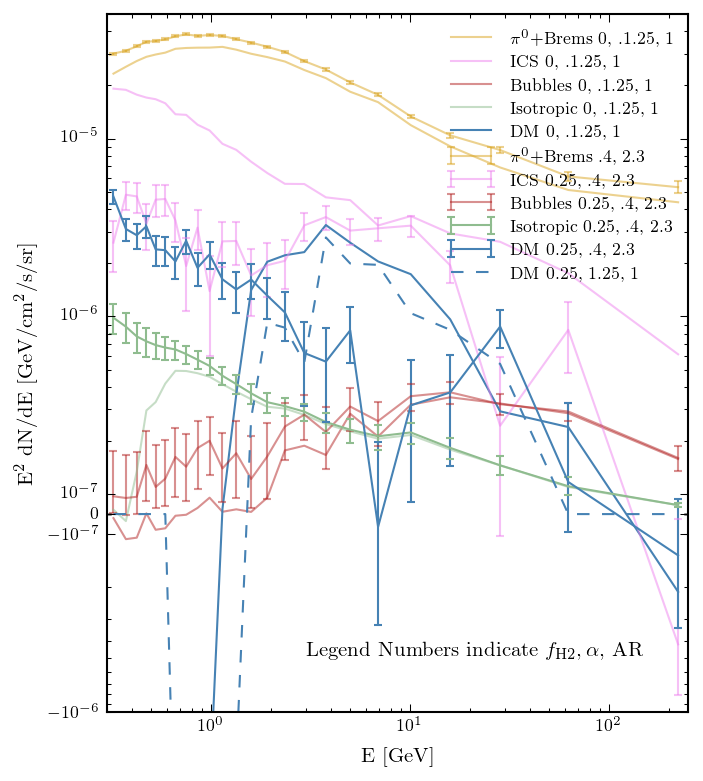

In [53]:
import Template
import Tools, healpy
reload(Tools)


#print np.array(A.m.matrix()).shape

#print A.templateList['DM'].valueError/A.templateList['DM'].value


def PlotComponent(A, name, color, mult=1, ls='-', err=True, label=None,**kwargs):
    E, flux, stat = A.GetSpectrum(name)
    #if stat

  
    if name is 'Data':
        plt.errorbar(E/1e3,E**2*flux/1e3,E**2*stat.T/1e3, label=name.replace('_','+'),
                     capthick=1, capsize=2, ls='-',c='k')
    elif err==True:
        plt.errorbar(E/1e3,E**2*flux*mult/1e3,E**2*stat.T/1e3*mult, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs)
    else: 
        plt.errorbar(E/1e3,E**2*flux*mult/1e3, label=label,capthick=1, capsize=2, ls=ls, color=color[name], **kwargs)
        
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')

    

plt.figure(figsize=(5,6))
#PlotComponent('Data')    
#PlotComponent('PSC')
#PlotComponent('Pi0_Brems')



faint_alpha = 0.5 

colors = {'ICS':'violet','Bubbles':'firebrick', 'Isotropic':'darkseagreen','DM':'steelblue','Pi0_Brems':'goldenrod'}
PlotComponent(A, 'Pi0_Brems', colors, err=False, label=r'$\pi^0$+Brems 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'ICS', colors, err=False, label=r'ICS 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Bubbles', colors, err=False, label=r'Bubbles 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'Isotropic', colors, err=False, label=r'Isotropic 0, .1.25, 1',alpha=faint_alpha)
PlotComponent(A, 'DM', colors, err=False, label=r'DM 0, .1.25, 1',alpha=1)
linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,1e-5)


#PlotComponent('AqRift',mult=10)


#plt.ylim(1e-8,4e-4)
plt.xlim(.3,500)


#plt.figure(figsize=(5,6))

PlotComponent(A2, 'Pi0_Brems', colors, err=True, label=r'$\pi^0$+Brems .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'ICS', colors,ls='-', err=True, label=r'ICS 0.25, .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'Bubbles', colors, ls='-', err=True, label=r'Bubbles 0.25, .4, 2.3',alpha=faint_alpha)
PlotComponent(A2, 'Isotropic', colors,ls='-', err=True, label=r'Isotropic 0.25, .4, 2.3',alpha=1)
PlotComponent(A2, 'DM', colors,ls='-', err=True, label=r'DM 0.25, .4, 2.3')

#PlotComponent(A3, 'Isotropic', colors,ls=':', err=False, label=r'Isotropic 0.25, 1.25, 1')
PlotComponent(A3, 'DM', colors,ls='--', err=False, label=r'DM 0.25, 1.25, 1')


plt.text(3,-5e-7, r'Legend Numbers indicate $f_{\rm H2},\alpha$, AR', fontsize=10)
#plt.text(3,-7e-7, 'With error bars NFW alpha=0.4, AR=2.4', fontsize=10)

#PlotComponent('AqRift',mult=10)
plt.legend(frameon=False, fontsize=8,ncol=1,handlelength=3)

linthresh=1e-7
plt.yscale('symlog', linthreshy=linthresh, subsy=np.arange(0,10),linscaley=0.1)
plt.ylim(-1e-6,5e-5)
#plt.legend(frameon=False, fontsize=8,ncol=2)
#plt.ylim(1e-8,4e-4)
plt.xlim(.3,250)


#plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/change_NFW_axis_mod_s_46.pdf', bbox_inches='tight')

#A.SaveSpectra('./mod_c/spec_mod_s_P8_PSF3.pickle') # 3FGL with ext XCO fitted 
#A.SaveSpectra('./mod_c/spec_mod_s_42_40x40_noDM.pickle') # 3FGL with ext XCO fitted 

